# Geopandas - Operazioni base

In [ ]:
!pip install geopandas

In [3]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, MultiPoint, MultiLineString, Point, MultiPolygon, shape

Il metodo `geopandas.read_file()`, crea un `GeoDataFrame` partendo da un file.

In [4]:
distrects = gpd.read_file('https://raw.githubusercontent.com/CappuCitti/Python-appunti-ed-esercizi/main/GeoPandas/Data/districtsOfMilan.zip')
distrects = distrects.set_geometry('geometry')    # Si imposta la colonna delle geometrie in modo tale che in seguito si possa richimare direttamente tutto il DataFrame invece che la colonna

distrects

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


Come mostrato nell'introduzione il *GeoDataFrame* è un unione di un *DataFrame* con colonne di tipo `geometry` che riportano informazioni sulle geometrie di una forma, una line o un punto

In [5]:
distrects.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID_NIL      88 non-null     int64   
 1   NIL         88 non-null     object  
 2   Valido_dal  88 non-null     object  
 3   Valido_al   88 non-null     object  
 4   Fonte       88 non-null     object  
 5   Shape_Leng  88 non-null     float64 
 6   Shape_Area  88 non-null     float64 
 7   OBJECTID    88 non-null     int64   
 8   geometry    88 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 6.3+ KB


Con la priprietà `.area` è possibile calcolare l'area dei poligoni (L'area viene espressa in ettari)

In [6]:
distrects.area 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0     0.000277
1     0.000056
2     0.000105
3     0.000182
4     0.000177
        ...   
83    0.000149
84    0.000189
85    0.000138
86    0.000280
87    0.000304
Length: 88, dtype: float64

Dopo aver importato i dati sulle geometrie è possibile creare un grafico con il metodo `.plot()`

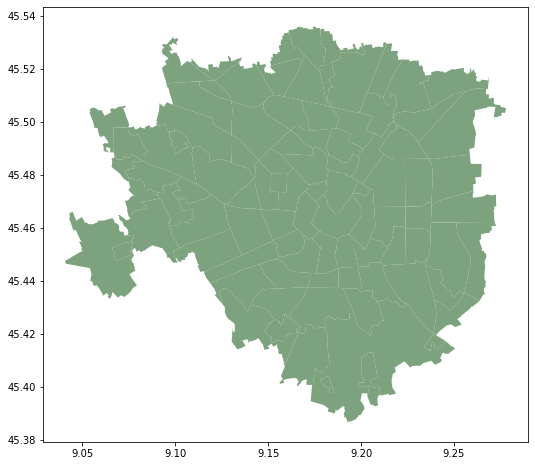

In [7]:
distrects.plot(figsize=(20,8), color='#7da27e')

Per ottenere il confine di ogni poligono (LineString), bisogna utilizzare la proprietà `geopandas.GeoDataFrame.boundary`.
In seguito con il metodo `geopandas.GeoDataFrame.boundary.plot()` è possibile creare una mappa con solo i confini dei poligoni.

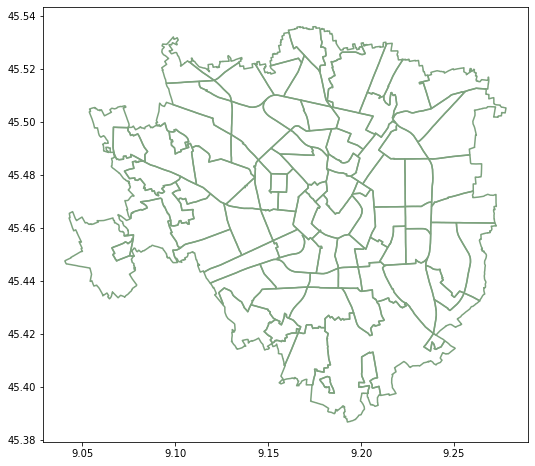

In [8]:
distrects.boundary.plot(figsize=(20,8), color='#7da27e')

Con la proprietà `geopandas.GeoSeries.centroid` è possibile raccogliere informazioni sui centri delle geometrie.

🔗 [Docs](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.centroid.html)

In [9]:
distrects['centers'] = distrects.centroid
distrects['centers']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0     POINT (9.13726 45.43846)
1     POINT (9.10167 45.49282)
2     POINT (9.15395 45.48449)
3     POINT (9.15673 45.51743)
4     POINT (9.18424 45.52351)
                ...           
83    POINT (9.16286 45.47354)
84    POINT (9.18816 45.47425)
85    POINT (9.24352 45.43667)
86    POINT (9.24836 45.51409)
87    POINT (9.11932 45.45135)
Name: centers, Length: 88, dtype: geometry

Dopo aver trovato i centri per ogni geometria è possibile raffigurarli sulla mappa originale

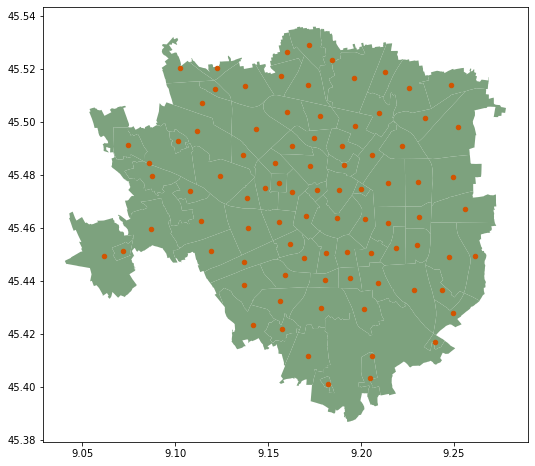

In [10]:
ax = distrects.plot(figsize=(20,8), color='#7da27e')                # Si imposta come base la mappa originale
distrects['centers'].plot(ax=ax, color='#d35400', markersize=20)    # Crea la cartiana basandosi sulla mappa originale

E' possibile estrarre una o più aree eseguendo operazioni di ricerca all'interno del GeoDataFrame

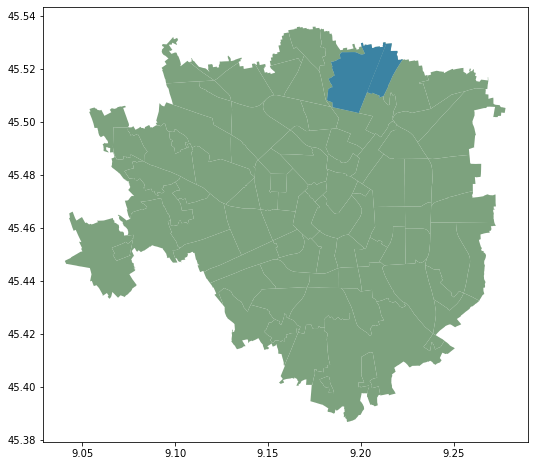

In [11]:
data = distrects[(distrects['NIL'] == 'NIGUARDA - CA\' GRANDA - PRATO CENTENARO - Q.RE FULVIO TESTI') | (distrects['NIL'] == 'BICOCCA')]

ax = distrects.plot(figsize=(20,8), color='#7da27e')
data.plot(ax=ax, alpha=0.7)    # Imposta un'opacita del 70% sulle figure che inserirà nella cartina

### ‍Creare linee, punti e poligoni utilizzando le coordinate

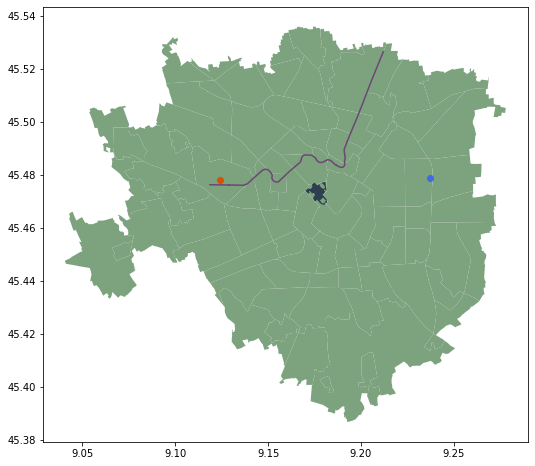

In [17]:
# Punto originale preso da Google Maps
# (45.47812572989568, 9.123965813080455)

# Si crea una GeoSeries contente un unico punto
san_siro_stadio = gpd.GeoSeries([Point((9.123965813080455, 45.47812572989568))], crs='epsg:4326')
zero_gravity = gpd.GeoSeries([Point((9.23688430903837, 45.47873209749087))], crs='epsg:4326')

# Si crera una GeoSeries contenente una linea
m5 = gpd.GeoSeries([LineString([ [ 9.21216389703706, 45.526753198173438 ], [ 9.209412200319788, 45.522040924335776 ], [ 9.209412200319788, 45.522040924335776 ], [ 9.205160311122341, 45.514710529990872 ], [ 9.205160311122341, 45.514710529990872 ], [ 9.201033147989628, 45.507205031996129 ], [ 9.201033147989628, 45.507205031996129 ], [ 9.197907593293383, 45.501619535677641 ], [ 9.197907593293383, 45.501619535677641 ], [ 9.19465904383544, 45.49620887497769 ], [ 9.19465904383544, 45.49620887497769 ], [ 9.192597444850289, 45.492674337427822 ], [ 9.192597452734773, 45.492674338456169 ], [ 9.191461248251125, 45.490535353360627 ], [ 9.19102863932892, 45.489724428395959 ], [ 9.190991021161773, 45.489618941363553 ], [ 9.190943998452825, 45.4894738963714 ], [ 9.190943998452809, 45.489309072063314 ], [ 9.190943998452777, 45.48911787526162 ], [ 9.190972212078107, 45.488913491755966 ], [ 9.191009830245228, 45.488768444947169 ], [ 9.191263752873262, 45.487608057030442 ], [ 9.191263760757611, 45.48760805805933 ], [ 9.191376607374607, 45.487087193317386 ], [ 9.19145184370883, 45.486652037661933 ], [ 9.191480057334159, 45.486447645208933 ], [ 9.191423630083408, 45.486164131868883 ], [ 9.191282561956584, 45.485775122870926 ], [ 9.191197921080498, 45.485610287739448 ], [ 9.191169707455122, 45.485432265255717 ], [ 9.191113280204394, 45.485267429121002 ], [ 9.191141493829722, 45.485076218600483 ], [ 9.191254348331011, 45.484133343439645 ], [ 9.191207325622045, 45.483849818452015 ], [ 9.191160302913106, 45.483684977686977 ], [ 9.191066257495237, 45.48350694911899 ], [ 9.190991021160947, 45.483414637788179 ], [ 9.190896975743083, 45.483309138939184 ], [ 9.190727693990942, 45.483177265100132 ], [ 9.190501984988083, 45.483038797236851 ], [ 9.190248062359888, 45.48293989141191 ], [ 9.189918903397407, 45.482867360363258 ], [ 9.189617958060294, 45.482840985413347 ], [ 9.189307608181398, 45.482847579152008 ], [ 9.188809167466811, 45.482926703955563 ], [ 9.188338940377591, 45.483045390952519 ], [ 9.187802881495886, 45.48324320205846 ], [ 9.186721359190694, 45.483645415831916 ], [ 9.186742407885646, 45.48363970102961 ], [ 9.185951311158698, 45.484036966980995 ], [ 9.185446907430011, 45.484293435243522 ], [ 9.18435088479462, 45.485018825368272 ], [ 9.183780953024208, 45.485342584047572 ], [ 9.183111648534835, 45.485621260914321 ], [ 9.182696621296863, 45.485654046337444 ], [ 9.181983475902047, 45.485697077176368 ], [ 9.181656130474916, 45.485668389954114 ], [ 9.181102617090181, 45.485404575560253 ], [ 9.180522112387996, 45.485186852257115 ], [ 9.179846642103442, 45.484941011930715 ], [ 9.179846642103442, 45.484941011930715 ], [ 9.179647114477032, 45.484868391813144 ], [ 9.179101667052338, 45.484736047278389 ], [ 9.178458667106176, 45.484654082349259 ], [ 9.177827358068141, 45.484727850790911 ], [ 9.17706978199999, 45.484918831237117 ], [ 9.176599812716448, 45.485170459412259 ], [ 9.176127518761668, 45.485579230109686 ], [ 9.175711303700066, 45.486080255101847 ], [ 9.175372267364882, 45.486531049323744 ], [ 9.174892940132317, 45.486670384989836 ], [ 9.174238249278099, 45.487088389920011 ], [ 9.173922594759095, 45.48721133195621 ], [ 9.173583558423877, 45.487383450356148 ], [ 9.171956563002542, 45.487479300007898 ], [ 9.171956563002542, 45.487479300007898 ], [ 9.170737961671374, 45.487508337393272 ], [ 9.170041611637481, 45.487522980570041 ], [ 9.169441900814498, 45.48751026345159 ], [ 9.168647613738141, 45.487116847685634 ], [ 9.168182063207759, 45.486682124258984 ], [ 9.167928574974825, 45.486002170682887 ], [ 9.167714464764234, 45.485553469567151 ], [ 9.16750039820511, 45.485118374469266 ], [ 9.1671316694365, 45.484710717916734 ], [ 9.166793057618884, 45.484508328929365 ], [ 9.166793057618884, 45.484508328929365 ], [ 9.162113163401385, 45.481710894126543 ], [ 9.162113163401385, 45.481710894126543 ], [ 9.1566728963962, 45.478138592411355 ], [ 9.1566728963962, 45.478138592411355 ], [ 9.155641161374671, 45.477461032505694 ], [ 9.155350788706098, 45.477366181173061 ], [ 9.15471235866074, 45.47729901309539 ], [ 9.154190159406641, 45.477299717640733 ], [ 9.153475142692669, 45.477518383045691 ], [ 9.152702464554709, 45.477873186250122 ], [ 9.152259013047644, 45.478390825222348 ], [ 9.152066478612891, 45.478717637941138 ], [ 9.152126146229737, 45.47932985263872 ], [ 9.152204608467427, 45.47973794429226 ], [ 9.1519930195143, 45.480173634381899 ], [ 9.151472539795042, 45.480827437617698 ], [ 9.151472539795042, 45.480827437617698 ], [ 9.15085497500414, 45.481345301107325 ], [ 9.150352983132978, 45.481686124647318 ], [ 9.150044156298437, 45.481931447282165 ], [ 9.149522201424618, 45.482040982369817 ], [ 9.148864740618986, 45.482109871770298 ], [ 9.148149001973271, 45.482083587136358 ], [ 9.147703914947797, 45.482002523064622 ], [ 9.146871489354274, 45.481731463440084 ], [ 9.146348370305093, 45.481391970150298 ], [ 9.143724987007568, 45.47973392009041 ], [ 9.143724987007568, 45.47973392009041 ], [ 9.138955088595011, 45.476725460942788 ], [ 9.138791415881428, 45.476618891360935 ], [ 9.138604361351634, 45.476561507656449 ], [ 9.138393925005611, 45.476487728521988 ], [ 9.138183488659587, 45.47644674007222 ], [ 9.137891215956781, 45.476364763083218 ], [ 9.137891223861194, 45.476364764116987 ], [ 9.137446961448516, 45.47624999509825 ], [ 9.137142997837598, 45.476184413287633 ], [ 9.136815652410455, 45.476086040428555 ], [ 9.136675361513108, 45.476077842682564 ], [ 9.129006125791722, 45.476200808748047 ], [ 9.129006133699709, 45.476200809782483 ], [ 9.118285563053124, 45.476282785976359 ] ])], crs='epsg:4326')

# Si crera una GeoSeries contenente un poligono
parco_sempione = gpd.GeoSeries([Polygon([ [ 9.171226964472234, 45.474752633717515 ], [ 9.17136566734284, 45.474842347469391 ], [ 9.17152142322557, 45.474944097022274 ], [ 9.171560889690651, 45.474921984872893 ], [ 9.171649031172809, 45.474876756566431 ], [ 9.171743836850444, 45.474835298666058 ], [ 9.171856047619062, 45.474795614737381 ], [ 9.171956008358366, 45.474766570527628 ], [ 9.1720508758011, 45.47474554494876 ], [ 9.172108547377031, 45.474735916822382 ], [ 9.172111872153977, 45.474735371742305 ], [ 9.172185022986916, 45.47472527019432 ], [ 9.172196533132581, 45.474723812655441 ], [ 9.17235424407362, 45.474711063166112 ], [ 9.172528633728517, 45.474713590268721 ], [ 9.172667364915679, 45.474728142576396 ], [ 9.172670308892755, 45.474728588185059 ], [ 9.172754791698377, 45.474742502282652 ], [ 9.172819308584964, 45.474754016208863 ], [ 9.172906764623882, 45.474777917001262 ], [ 9.173023317246125, 45.474819505974359 ], [ 9.173108894615229, 45.474856551174483 ], [ 9.173117990724096, 45.474860587918542 ], [ 9.173191018002431, 45.474893691558925 ], [ 9.173196389536237, 45.474893053332266 ], [ 9.173208047482881, 45.474898076314119 ], [ 9.173219449552317, 45.474903099682827 ], [ 9.173230852175342, 45.474908303073057 ], [ 9.173242255352058, 45.474913686484825 ], [ 9.173253402651598, 45.474919070283555 ], [ 9.173264550504928, 45.474924634103857 ], [ 9.173275442756909, 45.474930288322561 ], [ 9.173286335286933, 45.474936032551561 ], [ 9.173297100155335, 45.474941866984949 ], [ 9.173307737638023, 45.474947881634115 ], [ 9.17331824718322, 45.474953896476393 ], [ 9.173328629342764, 45.474960091534527 ], [ 9.173338883840756, 45.47496637679717 ], [ 9.173349010677205, 45.474972752264378 ], [ 9.173359009852112, 45.474979217936202 ], [ 9.17336888136548, 45.474985773812662 ], [ 9.173378625493335, 45.474992509905114 ], [ 9.173388241683657, 45.474999246190933 ], [ 9.173397730488499, 45.475006162692814 ], [ 9.173407091355777, 45.475013079388134 ], [ 9.17341619662162, 45.475020086482452 ], [ 9.173425302441906, 45.475027273598741 ], [ 9.173434152384637, 45.47503446110278 ], [ 9.173442874941909, 45.475041828823045 ], [ 9.173451597501458, 45.475049196542656 ], [ 9.173460064735607, 45.47505674467282 ], [ 9.173468276092017, 45.475064293190918 ], [ 9.173476487726795, 45.475071931719768 ], [ 9.173484443759909, 45.47507966064795 ], [ 9.17348843089164, 45.475086495485989 ], [ 9.173546437169477, 45.475144194920098 ], [ 9.173680472065904, 45.475295480987207 ], [ 9.17371095989909, 45.475349441679562 ], [ 9.173715590652394, 45.47535753569511 ], [ 9.173733213944979, 45.475388562947423 ], [ 9.173759490065942, 45.475445860466408 ], [ 9.173769821330428, 45.475477078828185 ], [ 9.173772533265048, 45.475485265771979 ], [ 9.173772792190091, 45.475486255507356 ], [ 9.173782233692155, 45.475519365468109 ], [ 9.173797984882544, 45.47560728298339 ], [ 9.173802830387523, 45.475685225785035 ], [ 9.173793564590143, 45.47579253388534 ], [ 9.173777413260408, 45.475865828018627 ], [ 9.173750914909341, 45.475944448580705 ], [ 9.17371786986207, 45.476016058175979 ], [ 9.173676761600476, 45.476086779903248 ], [ 9.173643519045186, 45.476135796828636 ], [ 9.173599418176032, 45.476190320962552 ], [ 9.173552614952683, 45.476239808527389 ], [ 9.173524294560398, 45.476266855073995 ], [ 9.173589932507332, 45.476309510920366 ], [ 9.173591855242393, 45.476310678151016 ], [ 9.173593777701159, 45.476311755370318 ], [ 9.173595827826453, 45.476312742383833 ], [ 9.173598005894641, 45.476313729202865 ], [ 9.173600183410141, 45.476314535999229 ], [ 9.173602360925706, 45.476315342795537 ], [ 9.173604666107774, 45.47631605938605 ], [ 9.173607098956341, 45.476316685770733 ], [ 9.173609403309333, 45.476317132327189 ], [ 9.173611835605195, 45.476317578689155 ], [ 9.173614267624691, 45.476317935039731 ], [ 9.173616827310646, 45.47631820118449 ], [ 9.173619258777375, 45.476318377512335 ], [ 9.173621817910542, 45.476318463634335 ], [ 9.173624248824455, 45.476318459939442 ], [ 9.17362680740478, 45.476318366038711 ], [ 9.173629237765832, 45.476318182321073 ], [ 9.173631795793273, 45.476317908397576 ], [ 9.173634225601415, 45.476317544657206 ], [ 9.173636655133084, 45.476317090905439 ], [ 9.173638956168993, 45.47631645732551 ], [ 9.173641385147684, 45.476315823551019 ], [ 9.173643557964207, 45.476315100154146 ], [ 9.173645858723502, 45.476314376562733 ], [ 9.173648030986993, 45.476313473143158 ], [ 9.173650075031134, 45.476312479906689 ], [ 9.173652119075198, 45.476311486670213 ], [ 9.173654034623439, 45.476310313605538 ], [ 9.173655950171597, 45.476309140540863 ], [ 9.173664660236557, 45.476312367721619 ], [ 9.173712478323258, 45.476343349061999 ], [ 9.173716067638448, 45.476345593896937 ], [ 9.173720817290452, 45.476350717342719 ], [ 9.173720182277656, 45.476352248507993 ], [ 9.173719547264826, 45.476353779673261 ], [ 9.17371904019488, 45.476355310643953 ], [ 9.173718533401482, 45.476356931625951 ], [ 9.173718154550984, 45.476358552413366 ], [ 9.173717775423892, 45.476360083189469 ], [ 9.173717396573347, 45.476361703976906 ], [ 9.173717145665721, 45.476363324569746 ], [ 9.173717022701023, 45.476364944968012 ], [ 9.173716899736318, 45.476366565366291 ], [ 9.173716776771606, 45.476368185764549 ], [ 9.173716781749839, 45.476369805968247 ], [ 9.173716786451504, 45.476371336160632 ], [ 9.1737169193727, 45.476372956169762 ], [ 9.173717052293904, 45.476374576178863 ], [ 9.173717313158081, 45.476376195993424 ], [ 9.173717574022275, 45.476377815807957 ], [ 9.173717962829459, 45.476379435427923 ], [ 9.173718351360094, 45.47638096503659 ], [ 9.173718740167319, 45.476382584656541 ], [ 9.173719256640981, 45.476384114070626 ], [ 9.173719901334236, 45.476385733301427 ], [ 9.173720417807958, 45.476387262715491 ], [ 9.173721190167702, 45.476388791740405 ], [ 9.173721834584486, 45.476390320959872 ], [ 9.173722734887315, 45.476391849790197 ], [ 9.173723507247185, 45.476393378815082 ], [ 9.173724407273525, 45.476394817634066 ], [ 9.173725435519504, 45.476396346269773 ], [ 9.173927602884595, 45.476526465627785 ], [ 9.174122338808205, 45.476652815460518 ], [ 9.174278612251443, 45.476753210257016 ], [ 9.174400145386871, 45.476831605009771 ], [ 9.174559497704509, 45.47693433502306 ], [ 9.174711160025861, 45.477032575987892 ], [ 9.174815516661251, 45.477100285169541 ], [ 9.17489871810931, 45.477153624772406 ], [ 9.174901025848097, 45.477155151438254 ], [ 9.174903461253267, 45.477156587896857 ], [ 9.174906024324821, 45.477157934148202 ], [ 9.174908714784282, 45.477159100180977 ], [ 9.174911533188585, 45.477160266017762 ], [ 9.17491435103604, 45.477161251831902 ], [ 9.174917296549845, 45.47716214743874 ], [ 9.174920241785252, 45.477162953034217 ], [ 9.174923314408487, 45.477163578411087 ], [ 9.17492638675329, 45.477164113776567 ], [ 9.174929458819642, 45.477164559130671 ], [ 9.174932658273763, 45.477164824266154 ], [ 9.174935857449396, 45.477164999390268 ], [ 9.174939056346528, 45.477165084502985 ], [ 9.174942254686613, 45.477164989593014 ], [ 9.174945452748155, 45.477164804671659 ], [ 9.174948522307858, 45.477164439923556 ], [ 9.174951719812265, 45.477164074979434 ], [ 9.174954788536246, 45.47716344019728 ], [ 9.174957729315416, 45.477162805611023 ], [ 9.174960797482148, 45.47716199080611 ], [ 9.174963609202194, 45.477160996370479 ], [ 9.174966548866877, 45.477160001738795 ], [ 9.174969232084853, 45.477158827476401 ], [ 9.174971915024143, 45.477157563202638 ], [ 9.174974469740015, 45.477156209113495 ], [ 9.174976896232454, 45.477154765208986 ], [ 9.174979194501468, 45.47715323148914 ], [ 9.174981364547053, 45.477151607953921 ], [ 9.174995020362246, 45.477140515592247 ], [ 9.175097518249602, 45.477062318356296 ], [ 9.175116920370131, 45.477047616702336 ], [ 9.175242777600619, 45.476951921246375 ], [ 9.175291789307609, 45.476913501048742 ], [ 9.175292427633062, 45.476913050010552 ], [ 9.17532714554387, 45.476886263244552 ], [ 9.175334038056103, 45.47688094197315 ], [ 9.175416112850415, 45.476818527846895 ], [ 9.175595196080423, 45.476682334981724 ], [ 9.175774661718101, 45.476545961220566 ], [ 9.175869881769307, 45.476473265198067 ], [ 9.176033005267291, 45.476348437688088 ], [ 9.176145583079466, 45.476262302933449 ], [ 9.176216933032842, 45.476207645772242 ], [ 9.176275646855395, 45.476162729334497 ], [ 9.17632517006902, 45.476124667945697 ], [ 9.176347641884224, 45.476109871330024 ], [ 9.176375998753272, 45.47609497561141 ], [ 9.176410502453853, 45.47608187062778 ], [ 9.176441817132821, 45.476071830958837 ], [ 9.176472243228796, 45.476064042947627 ], [ 9.176496281477831, 45.476059235185943 ], [ 9.176530556224563, 45.476054771646979 ], [ 9.176573792823985, 45.476052184491465 ], [ 9.176596948396794, 45.476051518613154 ], [ 9.176626506141178, 45.476052463042315 ], [ 9.176710604125333, 45.47606511464172 ], [ 9.176775791175709, 45.476085626468141 ], [ 9.176803591526324, 45.476097374980128 ], [ 9.176832937613083, 45.476112451526859 ], [ 9.176862677116169, 45.476130587856062 ], [ 9.177017932681478, 45.476231700584222 ], [ 9.177142034953631, 45.476312518762604 ], [ 9.177240368555898, 45.476376634608272 ], [ 9.177369214960796, 45.476460505575588 ], [ 9.177386136778924, 45.476471100683661 ], [ 9.177506778002259, 45.476549493520231 ], [ 9.177521608406483, 45.476545960015727 ], [ 9.177522375218549, 45.476545688788832 ], [ 9.177551141266042, 45.476538893199852 ], [ 9.177560218739162, 45.476536808820008 ], [ 9.177572619910316, 45.476533819155357 ], [ 9.177580802344215, 45.476531916188726 ], [ 9.177600363247697, 45.476527295178997 ], [ 9.177684999182496, 45.476507270963857 ], [ 9.177692286571915, 45.476505549404962 ], [ 9.177703537371825, 45.476502921562492 ], [ 9.177710441213378, 45.476501290610848 ], [ 9.177728467060012, 45.47649676197905 ], [ 9.177725891218602, 45.476491365282669 ], [ 9.177723571264059, 45.476485968188086 ], [ 9.177721123366785, 45.476480571292498 ], [ 9.17771893135631, 45.476475173998764 ], [ 9.177716739063317, 45.47646968669369 ], [ 9.177714674713888, 45.476464199189479 ], [ 9.177712738590921, 45.476458801497515 ], [ 9.177710801902467, 45.476453223782904 ], [ 9.177709121383529, 45.476447735681468 ], [ 9.177707312921825, 45.476442247779019 ], [ 9.177705760063715, 45.476436669467176 ], [ 9.17770433514897, 45.476431090956254 ], [ 9.177702910517429, 45.476425602456608 ], [ 9.17770161354629, 45.476420023746613 ], [ 9.177700444518436, 45.476414444837587 ], [ 9.177699275207905, 45.4764087759172 ], [ 9.177698362066518, 45.476403196610057 ], [ 9.177697448925318, 45.476397617302887 ], [ 9.177696663444367, 45.476391947785366 ], [ 9.177695878246478, 45.476386368279144 ], [ 9.177695220708797, 45.476380698562579 ], [ 9.177694819057121, 45.476375028447954 ], [ 9.177694417688432, 45.476369448344613 ], [ 9.177694016036924, 45.476363778229974 ], [ 9.177693870271295, 45.47635810771726 ], [ 9.177693724505698, 45.476352437204547 ], [ 9.177693706683005, 45.476346766492803 ], [ 9.177693817086078, 45.476341185593327 ], [ 9.177693927206231, 45.476335514682546 ], [ 9.177694401634716, 45.476323632395115 ], [ 9.177695004005804, 45.476311749908625 ], [ 9.177695862545086, 45.476299957035344 ], [ 9.177696976686596, 45.476288073752684 ], [ 9.177698346995975, 45.476276280083205 ], [ 9.177699844964573, 45.476264396203376 ], [ 9.177701727043438, 45.476252601737684 ], [ 9.17770373706416, 45.476240807072891 ], [ 9.177706003252185, 45.476229102021271 ], [ 9.177708397098938, 45.476217306759224 ], [ 9.177711175055284, 45.476205600911278 ], [ 9.177714080953017, 45.476193894864181 ], [ 9.177717243017492, 45.476182278430187 ], [ 9.177720660965624, 45.476170661597976 ], [ 9.177724334797256, 45.476159044367513 ], [ 9.177728136852762, 45.476147516949133 ], [ 9.177732194791513, 45.476135989132473 ], [ 9.177736508613359, 45.476124460917497 ], [ 9.17774107888409, 45.476113112326786 ], [ 9.177745776812326, 45.476101673525484 ], [ 9.177750730906245, 45.4760903243371 ], [ 9.17775594116571, 45.476079064761578 ], [ 9.177761407307591, 45.476067804787597 ], [ 9.177767001672528, 45.476056634625522 ], [ 9.17777285191965, 45.476045464064931 ], [ 9.177778958331826, 45.476034383117074 ], [ 9.177785192966796, 45.476023391981045 ], [ 9.177791683483582, 45.476012400446393 ], [ 9.177798430165096, 45.476001498524369 ], [ 9.177804158402777, 45.475992218398581 ], [ 9.177810014580629, 45.475982938073344 ], [ 9.177815998698593, 45.475973657548629 ], [ 9.177821982814594, 45.47596437702358 ], [ 9.177828095153732, 45.475955186310337 ], [ 9.177834207490886, 45.475945995596739 ], [ 9.177840447768, 45.475936804683634 ], [ 9.177846816268156, 45.475927703582286 ], [ 9.177853312708166, 45.47591860228134 ], [ 9.177859809146089, 45.475909500980045 ], [ 9.177866305581922, 45.475900399678345 ], [ 9.177873058182534, 45.475891387989122 ], [ 9.177879811064185, 45.475882466310793 ], [ 9.177886691602311, 45.47587345442151 ], [ 9.177893572421457, 45.475864532543106 ], [ 9.177900581180193, 45.475855610465018 ], [ 9.177907590219959, 45.475846778397788 ], [ 9.17791485514098, 45.475837945931566 ], [ 9.177921992118034, 45.475829113664169 ], [ 9.177929385259487, 45.475820371009036 ], [ 9.17793677839866, 45.475811628353412 ], [ 9.177944299760485, 45.475802975509289 ], [ 9.177951821120006, 45.475794322664669 ], [ 9.177959470418832, 45.47578566962023 ], [ 9.177967119715323, 45.475777016575265 ], [ 9.177974897234373, 45.475768453341736 ], [ 9.177982802975972, 45.475759979919623 ], [ 9.177990708715202, 45.475751506496962 ], [ 9.177998742393569, 45.475743032874369 ], [ 9.178007286701902, 45.475734198408482 ], [ 9.178015831290974, 45.475725453953252 ], [ 9.178024375593989, 45.47571661948605 ], [ 9.178033048119191, 45.475707874830114 ], [ 9.178041592983755, 45.475699220384236 ], [ 9.178050393445016, 45.475690475527543 ], [ 9.178059066245668, 45.475681820880901 ], [ 9.17806786698501, 45.475673166034163 ], [ 9.178076795662989, 45.475664510987265 ], [ 9.178085596680443, 45.475655946150454 ], [ 9.178094525636526, 45.475647381113468 ], [ 9.178103582531172, 45.47563881587628 ], [ 9.178112511481826, 45.475630250837874 ], [ 9.178121568654579, 45.475621775610556 ], [ 9.178130753482241, 45.475613210171701 ], [ 9.178139810649533, 45.47560473494292 ], [ 9.178148996038907, 45.475596349525183 ], [ 9.178158309083072, 45.475587873895869 ], [ 9.178167494466962, 45.475579488476619 ], [ 9.17817680778924, 45.475571102857074 ], [ 9.178186249333534, 45.475562807048483 ], [ 9.178195562650288, 45.475554421427397 ], [ 9.178205132130104, 45.475546125417651 ], [ 9.178214573666073, 45.475537829606694 ], [ 9.17822414342403, 45.475529623606647 ], [ 9.178233712895461, 45.475521327594485 ], [ 9.178243282647848, 45.475513121592819 ], [ 9.178252980622206, 45.475505005401985 ], [ 9.178262678309984, 45.475496799199036 ], [ 9.178269185985982, 45.475491298326268 ], [ 9.178241622216202, 45.475473429001468 ], [ 9.178317054166444, 45.475415883775071 ], [ 9.178270512903943, 45.475384632329202 ], [ 9.178428014771034, 45.475264940818043 ], [ 9.17847442467159, 45.475295112264583 ], [ 9.178551261216969, 45.475236844593063 ], [ 9.178578442569114, 45.475255164500517 ], [ 9.178587507572731, 45.475249209552594 ], [ 9.178595806353846, 45.475243705860706 ], [ 9.17860410513334, 45.475238202168221 ], [ 9.178612404195572, 45.475232788486444 ], [ 9.178620830912186, 45.475227284592684 ], [ 9.178629129686833, 45.475221780898366 ], [ 9.178637556684565, 45.475216367014667 ], [ 9.17864585574039, 45.475210953330446 ], [ 9.17865428245049, 45.475205449434213 ], [ 9.178662709443381, 45.47520003554866 ], [ 9.178671136434657, 45.475194621662482 ], [ 9.178679563424318, 45.475189207775685 ], [ 9.178687990696838, 45.475183883899561 ], [ 9.178696417683284, 45.475178470011492 ], [ 9.178704844668117, 45.475173056122827 ], [ 9.178713399876047, 45.475167732044682 ], [ 9.178721826857652, 45.47516231815473 ], [ 9.178730382062355, 45.475156994075299 ], [ 9.178738937265448, 45.475151669995242 ], [ 9.178747364526778, 45.475146346114713 ], [ 9.178755919726658, 45.475141022033377 ], [ 9.178764474924931, 45.475135697951373 ], [ 9.178773030121587, 45.47513037386873 ], [ 9.178781585316633, 45.475125049785447 ], [ 9.178790140794703, 45.47511981571283 ], [ 9.178798823926616, 45.475114491428002 ], [ 9.178807379401489, 45.475109257354084 ], [ 9.178816062814834, 45.475104023079261 ], [ 9.178824618001837, 45.475098698992738 ], [ 9.178833301411961, 45.475093464716593 ], [ 9.178840836207455, 45.475089132355677 ], [ 9.178848371001788, 45.475084799994264 ], [ 9.178856034019709, 45.475080557443356 ], [ 9.178863568811739, 45.475076225080933 ], [ 9.178871231827355, 45.475071982528988 ], [ 9.178878894557046, 45.475067649965219 ], [ 9.178886557570348, 45.47506340741225 ], [ 9.178894220582499, 45.475059164858749 ], [ 9.178901883593502, 45.475054922304743 ], [ 9.178909674828109, 45.47505076956115 ], [ 9.178917337836811, 45.4750465270061 ], [ 9.178925129069123, 45.475042374261449 ], [ 9.178932792360387, 45.475038221716687 ], [ 9.178940583590421, 45.475034068970956 ], [ 9.178948374819306, 45.475029916224713 ], [ 9.178956166331945, 45.475025853489264 ], [ 9.17896408549842, 45.475021700541504 ], [ 9.178971877008793, 45.475017637804967 ], [ 9.178979796457895, 45.475013574867447 ], [ 9.178987587966022, 45.47500951212983 ], [ 9.178995507412855, 45.475005449191208 ], [ 9.179003427143524, 45.475001476263351 ], [ 9.179011346588091, 45.474997413323628 ], [ 9.179019266316519, 45.474993440394648 ], [ 9.179027186043831, 45.47498946746515 ], [ 9.179035233709815, 45.474985494334561 ], [ 9.17904315343489, 45.474981521403947 ], [ 9.179051201383666, 45.474977638283534 ], [ 9.179059121106517, 45.474973665351811 ], [ 9.179068319370515, 45.474969420379971 ], [ 9.179077389408299, 45.474965085596637 ], [ 9.179086587669522, 45.474960840623332 ], [ 9.179095786214482, 45.474956685660587 ], [ 9.179104984472955, 45.474952440685804 ], [ 9.179114311240042, 45.474948375532271 ], [ 9.179123637720622, 45.474944220366666 ], [ 9.179132964485007, 45.474940155211627 ], [ 9.17914229124805, 45.474936090055799 ], [ 9.179151618294958, 45.474932114910551 ], [ 9.179161073280206, 45.474928139563865 ], [ 9.179170528264123, 45.474924164216375 ], [ 9.179179983246708, 45.474920188868126 ], [ 9.179189438798497, 45.474916393541704 ], [ 9.179199022003349, 45.474912508002483 ], [ 9.179208477552571, 45.474908712674498 ], [ 9.179218061040125, 45.47490491714499 ], [ 9.179227644526387, 45.474901121614685 ], [ 9.179237356236287, 45.474897415894127 ], [ 9.179246940290698, 45.474893800384827 ], [ 9.179256651998074, 45.474890094662619 ], [ 9.179266363989562, 45.474886478950914 ], [ 9.179276076265209, 45.474882953249697 ], [ 9.179285788539648, 45.474879427547634 ], [ 9.179295628752405, 45.474875901643955 ], [ 9.179305468963934, 45.474872375739423 ], [ 9.1793153094597, 45.474868939845351 ], [ 9.179325150239752, 45.474865593961745 ], [ 9.179334990733137, 45.474862158065974 ], [ 9.179343426174972, 45.474859444469438 ], [ 9.179351989269964, 45.474856640660086 ], [ 9.179360552935179, 45.474854016872733 ], [ 9.179369116314046, 45.474851303073407 ], [ 9.179377808202695, 45.474848769095168 ], [ 9.179386371865515, 45.474846145305875 ], [ 9.179395063752592, 45.474843611326314 ], [ 9.179403755924501, 45.474841167357418 ], [ 9.17941244809565, 45.474838723387833 ], [ 9.179421268491128, 45.47483636922798 ], [ 9.179429960946429, 45.474834015268407 ], [ 9.179438781626105, 45.474831751118487 ], [ 9.179447602305068, 45.474829486967899 ], [ 9.179456422983323, 45.474827222816629 ], [ 9.179465243946577, 45.474825048675996 ], [ 9.179474193134281, 45.474822964344966 ], [ 9.179483142321329, 45.474820880013247 ], [ 9.179491963854053, 45.474818885893164 ], [ 9.179500913325555, 45.474816891571358 ], [ 9.179509863082197, 45.474814987260181 ], [ 9.179518940777626, 45.474813082747218 ], [ 9.179527890533057, 45.474811178434628 ], [ 9.179536968513084, 45.474809363931534 ], [ 9.179545918838979, 45.474807639640147 ], [ 9.1795549971037, 45.474805915146952 ], [ 9.17956407565373, 45.474804280664344 ], [ 9.179573154203235, 45.474802646181011 ], [ 9.179582233038101, 45.47480110170828 ], [ 9.179591439811826, 45.474799557033684 ], [ 9.179593358044489, 45.474799283982492 ], [ 9.179595148337778, 45.47479901113244 ], [ 9.179597066570404, 45.474798738081205 ], [ 9.179598984803011, 45.474798465029934 ], [ 9.179600903035602, 45.474798191978635 ], [ 9.179602693042893, 45.474797829117151 ], [ 9.179604611275444, 45.474797556065795 ], [ 9.179606529793904, 45.474797373025694 ], [ 9.17960844802642, 45.474797099974275 ], [ 9.179610366258919, 45.474796826922827 ], [ 9.179612156552045, 45.474796554072505 ], [ 9.179614074784507, 45.474796281020986 ], [ 9.179615993016947, 45.474796007969417 ], [ 9.179617911249373, 45.474795734917841 ], [ 9.179619829767727, 45.474795551877527 ], [ 9.179621748000114, 45.47479527882588 ], [ 9.179623666232485, 45.474795005774205 ], [ 9.179625456525489, 45.474794732923662 ], [ 9.179627375043788, 45.474794549883242 ], [ 9.179629293276106, 45.474794276831453 ], [ 9.179631211794373, 45.474794093790948 ], [ 9.179633130026659, 45.474793820739116 ], [ 9.179635048544899, 45.474793637698539 ], [ 9.179636966777149, 45.474793364646629 ], [ 9.179638885295361, 45.474793181606017 ], [ 9.179640675588232, 45.474792908755241 ], [ 9.179642594106419, 45.474792725714565 ], [ 9.17964451262459, 45.474792542673839 ], [ 9.179646430856756, 45.474792269621766 ], [ 9.179655895794021, 45.474791444630057 ], [ 9.17966523307769, 45.474790709850112 ], [ 9.179674570647153, 45.47479006508069 ], [ 9.179684036155738, 45.474789420109275 ], [ 9.179693501950171, 45.474788865148383 ], [ 9.179702840091165, 45.474788400399291 ], [ 9.179712306171336, 45.474787935448155 ], [ 9.179721772537462, 45.474787560507536 ], [ 9.179731239189588, 45.474787275577455 ], [ 9.179740578188429, 45.474787080859215 ], [ 9.179750045126534, 45.474786885938883 ], [ 9.179759512350744, 45.474786781029081 ], [ 9.179768979861105, 45.474786766129817 ], [ 9.179778447371458, 45.47478675122975 ], [ 9.17978791545424, 45.47478691635154 ], [ 9.179797383250841, 45.474786991461222 ], [ 9.179806723680633, 45.474787246794136 ], [ 9.179816192336103, 45.474787591936185 ], [ 9.179825660991686, 45.474787937077473 ], [ 9.17983512964738, 45.474788282217965 ], [ 9.179844470936471, 45.47478880758171 ], [ 9.179853940165069, 45.474789332743271 ], [ 9.179863409680177, 45.47478994791534 ], [ 9.179872751542506, 45.474790653299408 ], [ 9.179882093405066, 45.474791358682729 ], [ 9.179891563779963, 45.474792243886412 ], [ 9.179900905929413, 45.474793039279483 ], [ 9.179910248651952, 45.474794014694417 ], [ 9.17991959137481, 45.474794990108585 ], [ 9.179929190836017, 45.47479623515288 ], [ 9.179938790297642, 45.474797480196358 ], [ 9.179948390332637, 45.47479890526165 ], [ 9.179957990368113, 45.474800330326126 ], [ 9.179967590690575, 45.474801845401124 ], [ 9.179977063074185, 45.474803360676894 ], [ 9.179986663970739, 45.474805055772883 ], [ 9.179996137215042, 45.474806841080998 ], [ 9.180005482520565, 45.474808626589933 ], [ 9.180014956052638, 45.474810501907783 ], [ 9.180024301932544, 45.474812467437786 ], [ 9.180033648099712, 45.474814522978356 ], [ 9.180042994267556, 45.474816578518137 ], [ 9.180052340722716, 45.474818724068477 ], [ 9.180061559812486, 45.474821049842333 ], [ 9.180070778903014, 45.474823375615436 ], [ 9.180079997994298, 45.474825701387822 ], [ 9.180089089720314, 45.474828207383759 ], [ 9.180098181447136, 45.474830713378985 ], [ 9.180107273748218, 45.474833399396097 ], [ 9.18011623811072, 45.474836085614221 ], [ 9.180125202474073, 45.474838771831649 ], [ 9.180134167411815, 45.474841638070977 ], [ 9.180143004411009, 45.474844504511374 ], [ 9.180151841697898, 45.474847460962387 ], [ 9.180160679272518, 45.474850507424023 ], [ 9.18016938919544, 45.474853644098076 ], [ 9.180178099119324, 45.474856780771454 ], [ 9.180186809617886, 45.474860097466795 ], [ 9.180190012121219, 45.474861352579694 ], [ 9.180193214624694, 45.474862607692501 ], [ 9.180196417128311, 45.474863862805229 ], [ 9.180199619918943, 45.474865207929163 ], [ 9.180202822422849, 45.474866463041714 ], [ 9.180206025213781, 45.474867808165463 ], [ 9.180209227717977, 45.474869063277836 ], [ 9.180212430509208, 45.474870408401422 ], [ 9.180215633300593, 45.474871753524901 ], [ 9.180218836092129, 45.474873098648303 ], [ 9.180222038596908, 45.474874353760306 ], [ 9.180225113449216, 45.474875699085374 ], [ 9.180228316241202, 45.474877044208505 ], [ 9.180231519033338, 45.474878389331543 ], [ 9.180234594173021, 45.474879824667674 ], [ 9.180237796965464, 45.474881169790528 ], [ 9.180240871818517, 45.474882515115191 ], [ 9.180244074611263, 45.474883860237881 ], [ 9.180247149751562, 45.474885295573664 ], [ 9.180250352544613, 45.474886640696177 ], [ 9.180253427685223, 45.474888076031789 ], [ 9.180256630478581, 45.474889421154117 ], [ 9.180259705619502, 45.474890856489559 ], [ 9.180262780760577, 45.474892291824929 ], [ 9.180265855901807, 45.4748937271602 ], [ 9.18026905869578, 45.474895072282187 ], [ 9.180272133837322, 45.474896507617295 ], [ 9.180275208979021, 45.474897942952317 ], [ 9.180278284407876, 45.474899468298581 ], [ 9.18029870537114, 45.474883954044962 ], [ 9.180301525781875, 45.47488574982841 ], [ 9.180315948216691, 45.474874835639604 ], [ 9.180446078301005, 45.474959691261439 ], [ 9.180430890242029, 45.474971236758186 ], [ 9.180433454207328, 45.474972852919883 ], [ 9.180413416781208, 45.474988276579808 ], [ 9.180421114710176, 45.474995015303321 ], [ 9.180428684701166, 45.475001754228387 ], [ 9.180436127041391, 45.475008583366339 ], [ 9.180443441730837, 45.475015502717199 ], [ 9.180450628769492, 45.475022512280994 ], [ 9.180457688157343, 45.47502961205776 ], [ 9.180464619607081, 45.4750367120362 ], [ 9.180471295466056, 45.475043902429775 ], [ 9.180477971326733, 45.475051092822952 ], [ 9.180484391883892, 45.47505846364264 ], [ 9.180490812442724, 45.475065834461951 ], [ 9.18049697712329, 45.475073205685213 ], [ 9.180503014440196, 45.475080757132901 ], [ 9.180508923818708, 45.475088308782446 ], [ 9.180514705258778, 45.475095860633857 ], [ 9.180520359047746, 45.475103502698452 ], [ 9.180525885185579, 45.475111234976254 ], [ 9.180531155444777, 45.475118967658169 ], [ 9.180536425992834, 45.475126790351162 ], [ 9.180541440662125, 45.475134613448297 ], [ 9.180546327680114, 45.475142526758717 ], [ 9.180551087046759, 45.475150530282455 ], [ 9.180555718187147, 45.475158443996918 ], [ 9.180560094023372, 45.475166538138232 ], [ 9.180564341920652, 45.475174632481618 ], [ 9.180568461878932, 45.475182727027068 ], [ 9.180572453898154, 45.475190821774603 ], [ 9.180576318265746, 45.475199006735544 ], [ 9.180579927041395, 45.475207282112144 ], [ 9.180582636498706, 45.475214388757543 ], [ 9.180585218303886, 45.475221585616417 ], [ 9.180587672169402, 45.47522878267749 ], [ 9.180589998095202, 45.475235979940777 ], [ 9.180592196081243, 45.475243177406277 ], [ 9.180594394355355, 45.475250464883011 ], [ 9.180596336461745, 45.475257662752945 ], [ 9.180598278856147, 45.475264950634156 ], [ 9.180599965370211, 45.475272238919857 ], [ 9.180601651884709, 45.475279527205544 ], [ 9.180603210459195, 45.475286815693458 ], [ 9.180604641381136, 45.475294194394941 ], [ 9.180605944075435, 45.475301483287367 ], [ 9.1806071191171, 45.475308862393376 ], [ 9.180608166218549, 45.475316241701641 ], [ 9.180609213032749, 45.475323530998587 ], [ 9.180610004253644, 45.475330910711392 ], [ 9.180610667534177, 45.475338290626482 ], [ 9.180611330814884, 45.47534567054155 ], [ 9.180611866155164, 45.475353050658903 ], [ 9.180612273554967, 45.475360430978526 ], [ 9.180612425073601, 45.475367811702732 ], [ 9.180612576592278, 45.475375192426931 ], [ 9.180612600170326, 45.475382573353407 ], [ 9.180612495807697, 45.475389954482175 ], [ 9.180612391732579, 45.475397425622226 ], [ 9.180612031488456, 45.47540480715557 ], [ 9.180611543303504, 45.475412188891184 ], [ 9.18061105511843, 45.475419570626784 ], [ 9.180610682510011, 45.475423081674272 ], [ 9.180610309901549, 45.475426592721767 ], [ 9.18060980935226, 45.47543010397154 ], [ 9.180609308802909, 45.475433615221327 ], [ 9.180608808253499, 45.475437126471085 ], [ 9.180608307704029, 45.475440637720844 ], [ 9.180607807154495, 45.475444148970617 ], [ 9.180607178664081, 45.475447660422645 ], [ 9.180606550173588, 45.475451171874681 ], [ 9.18060592168302, 45.475454683326724 ], [ 9.180605293192372, 45.475458194778739 ], [ 9.180604536760802, 45.475461706433073 ], [ 9.180603780041608, 45.475465128076074 ], [ 9.180603023609848, 45.475468639730366 ], [ 9.18060213923712, 45.475472151586928 ], [ 9.180601382805168, 45.475475663241205 ], [ 9.18060049814471, 45.475479085086462 ], [ 9.180599613771665, 45.475482596942996 ], [ 9.18059860117009, 45.475486018990516 ], [ 9.180597716796818, 45.475489530847042 ], [ 9.180596704195004, 45.475492952894555 ], [ 9.18059569188058, 45.475496464953324 ], [ 9.180594679278521, 45.475499887000801 ], [ 9.180593539022899, 45.475503399261839 ], [ 9.180592398479638, 45.475506821511551 ], [ 9.180591257936232, 45.475510243761271 ], [ 9.180590117392692, 45.475513666010961 ], [ 9.180588976849014, 45.475517088260638 ], [ 9.180587708364214, 45.47552051071257 ], [ 9.180585300772632, 45.47552780547062 ], [ 9.180582765239416, 45.475535100430868 ], [ 9.180580101764512, 45.475542395593301 ], [ 9.180577565942492, 45.475549600542102 ], [ 9.180574774237698, 45.47555680589538 ], [ 9.180571982819668, 45.475564101259842 ], [ 9.180569191113451, 45.475571306612956 ], [ 9.180566143524294, 45.475578512370454 ], [ 9.180563223588033, 45.475585627914349 ], [ 9.18056017599735, 45.475592833671691 ], [ 9.180557000177275, 45.475599949619863 ], [ 9.180553824643852, 45.475607155579247 ], [ 9.180550520880983, 45.475614271729469 ], [ 9.180547217117285, 45.475621387879585 ], [ 9.180543785124101, 45.475628414220523 ], [ 9.180540225476244, 45.475635530774852 ], [ 9.180536793481336, 45.47564255711557 ], [ 9.180533105890438, 45.475649673871864 ], [ 9.180529418011206, 45.475656700616746 ], [ 9.180525729843662, 45.475663637350209 ], [ 9.180521914021284, 45.475670664297034 ], [ 9.18051796996923, 45.475677601434626 ], [ 9.18051402591621, 45.475684538572061 ], [ 9.180509953920856, 45.475691475911553 ], [ 9.180505881924502, 45.475698413250861 ], [ 9.180501809927152, 45.475705350590047 ], [ 9.180497609700028, 45.475712198119936 ], [ 9.18049328153046, 45.475719045851839 ], [ 9.180488953359839, 45.475725893583558 ], [ 9.180484369305248, 45.475732741719412 ], [ 9.180479785249542, 45.475739589855081 ], [ 9.180475201480053, 45.475746528001842 ], [ 9.180470489193301, 45.475753286327972 ], [ 9.18046577719273, 45.475760134665201 ], [ 9.180461065191023, 45.475766983002217 ], [ 9.180456224959322, 45.475773741529849 ], [ 9.180451384726469, 45.475780500057283 ], [ 9.180446416550868, 45.475787258786625 ], [ 9.180441448374085, 45.475794017515732 ], [ 9.180436480196116, 45.475800776244625 ], [ 9.180431511729704, 45.475807444961987 ], [ 9.180426415320476, 45.475814113881228 ], [ 9.180421190968381, 45.475820783002305 ], [ 9.180416094556737, 45.47582745192107 ], [ 9.180410870202198, 45.475834121041679 ], [ 9.180405517617503, 45.475840700352805 ], [ 9.180400292973291, 45.475847279461611 ], [ 9.180394812444387, 45.475853858974283 ], [ 9.180389459855958, 45.475860438284634 ], [ 9.180383979324519, 45.47586701779678 ], [ 9.180378498504638, 45.475873507297351 ], [ 9.1803730176835, 45.475879996797666 ], [ 9.18036740891929, 45.475886486499725 ], [ 9.180361672211966, 45.475892976403536 ], [ 9.180356063445171, 45.475899466105027 ], [ 9.180350326448105, 45.475905865996957 ], [ 9.18034458944974, 45.475912265888589 ], [ 9.180338724508195, 45.475918665981915 ], [ 9.180336047777162, 45.475921820618836 ], [ 9.180333370758731, 45.47592488524441 ], [ 9.180330566085196, 45.475928040083197 ], [ 9.180327889066174, 45.475931104708636 ], [ 9.180325084392027, 45.475934259547294 ], [ 9.180322279430483, 45.475937324374584 ], [ 9.180319474468638, 45.475940389201796 ], [ 9.180316669793561, 45.475943544040227 ], [ 9.180313864831103, 45.475946608867297 ], [ 9.180311059868343, 45.475949673694302 ], [ 9.180308254905279, 45.475952738521244 ], [ 9.18030532199994, 45.475955803550065 ], [ 9.180302517036258, 45.47595886837685 ], [ 9.180299584130291, 45.475961933405515 ], [ 9.180296778878954, 45.475964908220874 ], [ 9.180293845972363, 45.475967973249389 ], [ 9.180290913065454, 45.475971038277827 ], [ 9.180287979871201, 45.475974013294902 ], [ 9.180285046963661, 45.47597707832319 ], [ 9.180282113768785, 45.475980053340109 ], [ 9.180279052918582, 45.475983118570163 ], [ 9.180276119723079, 45.475986093586933 ], [ 9.18027305858522, 45.475989068805532 ], [ 9.180270125389093, 45.475992043822139 ], [ 9.180267064250598, 45.475995019040582 ], [ 9.180264003111782, 45.47599799425894 ], [ 9.180260941972643, 45.476000969477219 ], [ 9.180257880833182, 45.476003944695407 ], [ 9.180254819693399, 45.476006919913523 ], [ 9.18024959013791, 45.476011968823357 ], [ 9.180244232639382, 45.476017017934844 ], [ 9.180239003082018, 45.476022066844187 ], [ 9.180233645581586, 45.476027115955183 ], [ 9.180228416022345, 45.47603216486403 ], [ 9.180223058520015, 45.476037213974507 ], [ 9.180217828958892, 45.476042262882892 ], [ 9.180212471454659, 45.476047311992865 ], [ 9.180207113949471, 45.476052361102589 ], [ 9.180201756156434, 45.476057320200773 ], [ 9.180196398649343, 45.476062369309972 ], [ 9.180191041141294, 45.476067418418936 ], [ 9.180185683345423, 45.476072377516353 ], [ 9.180180325835471, 45.476077426624791 ], [ 9.180174968324561, 45.476082475732994 ], [ 9.180169610525855, 45.476087434829637 ], [ 9.180164253013043, 45.476092483937336 ], [ 9.180158767270157, 45.476097443235261 ], [ 9.180153409468614, 45.476102402331151 ], [ 9.180148051952939, 45.476107451438061 ], [ 9.180142566207182, 45.476112410735205 ], [ 9.180137208402801, 45.47611736983032 ], [ 9.180131722655132, 45.476122329126945 ], [ 9.180126365135633, 45.476127378232825 ], [ 9.180120879386045, 45.476132337528931 ], [ 9.180115393635491, 45.47613729682476 ], [ 9.180109907883979, 45.476142256120305 ], [ 9.18010455007391, 45.476147215213864 ], [ 9.180099064320482, 45.476152174508904 ], [ 9.180092812631832, 45.476157675081701 ], [ 9.180086560655258, 45.476163085642845 ], [ 9.180080181021733, 45.476168586416634 ], [ 9.180073929042747, 45.476173996977103 ], [ 9.180067677349241, 45.476179497548493 ], [ 9.180061297425361, 45.476184908309953 ], [ 9.180054917500259, 45.476190319071023 ], [ 9.180048537573938, 45.476195729831737 ], [ 9.180042157359757, 45.476201050580833 ], [ 9.180035649488465, 45.476206461542475 ], [ 9.180029269271863, 45.476211782290825 ], [ 9.180022761111495, 45.476217103240451 ], [ 9.180016253236499, 45.476222514200991 ], [ 9.180009745073672, 45.476227835149878 ], [ 9.180003236623046, 45.476233066087083 ], [ 9.179996600515169, 45.476238387236833 ], [ 9.179990092348667, 45.476243708184569 ], [ 9.17998345595176, 45.476248939322254 ], [ 9.179976819553625, 45.476254170459548 ], [ 9.179970183154261, 45.476259401596451 ], [ 9.179963546753671, 45.476264632732956 ], [ 9.179956782409167, 45.476269864070645 ], [ 9.179950146006108, 45.47627509520639 ], [ 9.179943381372633, 45.476280236531977 ], [ 9.179936617024397, 45.476285467868465 ], [ 9.179929852388451, 45.476290609193256 ], [ 9.179923087751279, 45.476295750517657 ], [ 9.179916195170117, 45.476300892043149 ], [ 9.17990943053047, 45.476306033366733 ], [ 9.179903686854054, 45.476310362976285 ], [ 9.179897943463164, 45.476314782596859 ], [ 9.179892199784979, 45.476319112205843 ], [ 9.179886456105915, 45.476323441814543 ], [ 9.179880712712354, 45.476327861434228 ], [ 9.17987496903152, 45.476332191042339 ], [ 9.179869225349806, 45.476336520650179 ], [ 9.17986335372437, 45.476340850459167 ], [ 9.179857610040889, 45.476345180066403 ], [ 9.179851866356529, 45.476349509673348 ], [ 9.179845994728414, 45.47635383948144 ], [ 9.179840251042284, 45.476358169087803 ], [ 9.179834379126069, 45.476362408884007 ], [ 9.179828507495277, 45.476366738691183 ], [ 9.179822763806499, 45.476371068296665 ], [ 9.179816891887636, 45.476375308091953 ], [ 9.179811020254164, 45.476379637898233 ], [ 9.17980514833353, 45.476383877692939 ], [ 9.179799276698267, 45.476388207498623 ], [ 9.179793404775863, 45.476392447292703 ], [ 9.179787532852579, 45.476396687086485 ], [ 9.179781532985432, 45.476400927081322 ], [ 9.179775661060377, 45.476405166874507 ], [ 9.179769789134442, 45.476409406667365 ], [ 9.179763789264614, 45.476413646661271 ], [ 9.179757917336905, 45.476417886453518 ], [ 9.179751917465287, 45.476422126446799 ], [ 9.179746045535811, 45.476426366238442 ], [ 9.179740045662403, 45.476430606231091 ], [ 9.179728048774283, 45.476439986328316 ], [ 9.179715923652974, 45.476449276614261 ], [ 9.179703798241574, 45.476458476887629 ], [ 9.179691416653883, 45.476467587550971 ], [ 9.179679035062204, 45.476476698212934 ], [ 9.179666525237316, 45.476485719063497 ], [ 9.179653758950002, 45.476494560292579 ], [ 9.179640992658696, 45.476503401520212 ], [ 9.179628226363397, 45.476512242746431 ], [ 9.179615203605675, 45.476520904350984 ], [ 9.179602052614747, 45.476529476143924 ], [ 9.17958890161983, 45.476538047935342 ], [ 9.179575622105817, 45.476546439903821 ], [ 9.179562214644532, 45.476554832071869 ], [ 9.179548678950056, 45.476563134428169 ], [ 9.179535142679937, 45.476571256760252 ], [ 9.179521350519151, 45.476579379492904 ], [ 9.179507558068613, 45.476587412212595 ], [ 9.179493765328385, 45.476595354919326 ], [ 9.179479716411652, 45.476603208015163 ], [ 9.179465667205287, 45.476610971097983 ], [ 9.179451362108109, 45.476618734581074 ], [ 9.179437184379141, 45.4766263178388 ], [ 9.179422750473686, 45.476633811485421 ], [ 9.179408316278771, 45.476641215118939 ], [ 9.179393754136528, 45.476648618951536 ], [ 9.179379063475734, 45.476655842960632 ], [ 9.179364372525621, 45.476662976956561 ], [ 9.179349553342663, 45.476670021140194 ], [ 9.179338313436347, 45.476676069573436 ], [ 9.179327073242117, 45.476682027994293 ], [ 9.1793157048164, 45.476687896603607 ], [ 9.179304336388318, 45.476693765211763 ], [ 9.17929296767243, 45.476699543807513 ], [ 9.179281470725108, 45.476705232591669 ], [ 9.179269973775469, 45.476710921374654 ], [ 9.179258348594422, 45.476716520345974 ], [ 9.179246723411069, 45.476722119316108 ], [ 9.179235097940056, 45.476727628273757 ], [ 9.179223344523038, 45.476733137430998 ], [ 9.179211590818404, 45.476738556575725 ], [ 9.179199708882456, 45.476743885908668 ], [ 9.179187826944263, 45.476749215240389 ], [ 9.179175816774778, 45.476754454760254 ], [ 9.179163934261616, 45.476759604066928 ], [ 9.179151795858671, 45.476764753773672 ], [ 9.179139785112127, 45.476769813267182 ], [ 9.179127646419598, 45.476774872960078 ], [ 9.179115507439725, 45.476779842640404 ], [ 9.179103240228711, 45.476784722508739 ], [ 9.179090973015576, 45.476789602375781 ], [ 9.179078577571337, 45.47679439243079 ], [ 9.179066309783794, 45.476799092272607 ], [ 9.179053914050309, 45.476803792313646 ], [ 9.179041390085798, 45.476808402542609 ], [ 9.179028994063165, 45.476813012569679 ], [ 9.179016341580626, 45.476817442973839 ], [ 9.179003817325029, 45.47682196318739 ], [ 9.178997554626514, 45.47682404327108 ], [ 9.178991419871492, 45.476826123153948 ], [ 9.178985156887101, 45.476828113225679 ], [ 9.178978894187221, 45.476830193308359 ], [ 9.178972631201937, 45.476832183379393 ], [ 9.178966368216212, 45.476834173450086 ], [ 9.178960105230043, 45.476836163520453 ], [ 9.178953841958524, 45.47683806357918 ], [ 9.178947451027502, 45.47684005384928 ], [ 9.178941187755125, 45.476841953907318 ], [ 9.178934796538334, 45.476843854165438 ], [ 9.178928405036244, 45.476845664411911 ], [ 9.178922141762602, 45.476847564468905 ], [ 9.178915750259684, 45.476849374714661 ], [ 9.178909358756357, 45.476851184960061 ], [ 9.17890296725262, 45.476852995205114 ], [ 9.178896575463652, 45.47685471543852 ], [ 9.178890056015083, 45.476856525883214 ], [ 9.178883664225323, 45.476858246115903 ], [ 9.178877272150382, 45.476859876336938 ], [ 9.178870752415818, 45.476861596769261 ], [ 9.178864360340125, 45.476863226989579 ], [ 9.178857840320024, 45.476864857409872 ], [ 9.178851320299545, 45.47686648782981 ], [ 9.178844928222734, 45.476868118049026 ], [ 9.178838407916777, 45.476869658456941 ], [ 9.178831887895182, 45.476871288875756 ], [ 9.178825367588502, 45.476872829282911 ], [ 9.178818719052709, 45.476874279878707 ], [ 9.17881373293533, 45.476875457836584 ], [ 9.178808618873678, 45.476876635994522 ], [ 9.17880350481181, 45.476877814152225 ], [ 9.178798390465065, 45.476878902298424 ], [ 9.178793276118121, 45.476879990444381 ], [ 9.178788161770981, 45.476881078590111 ], [ 9.178783047423646, 45.476882166735635 ], [ 9.178777933076109, 45.47688325488091 ], [ 9.178772818443754, 45.476884253014674 ], [ 9.178767703811214, 45.476885251148211 ], [ 9.178762589178499, 45.476886249281527 ], [ 9.178757346601511, 45.476887247614826 ], [ 9.178752231968426, 45.476888245747659 ], [ 9.17874711705058, 45.476889153869003 ], [ 9.178741874473044, 45.476890152201584 ], [ 9.178736759554859, 45.476891060322465 ], [ 9.178731516692407, 45.476891968643294 ], [ 9.178726273545236, 45.476892786952604 ], [ 9.178721158626558, 45.476893695072775 ], [ 9.178715915479078, 45.476894513381595 ], [ 9.178710672331441, 45.476895331690187 ], [ 9.178705557127767, 45.476896149798371 ], [ 9.178700313979828, 45.476896968106487 ], [ 9.178695070831738, 45.476897786414369 ], [ 9.178689827399007, 45.476898514710726 ], [ 9.178684583966135, 45.476899243006827 ], [ 9.17867934053313, 45.4768999713027 ], [ 9.178674097099991, 45.476900699598325 ], [ 9.178668853666712, 45.476901427893715 ], [ 9.17866245816729, 45.476901977967337 ], [ 9.178656190896305, 45.476902617851771 ], [ 9.178649795396622, 45.476903167924682 ], [ 9.178643399896815, 45.476903717997232 ], [ 9.178637132341011, 45.476904267869337 ], [ 9.178630736556556, 45.476904727929913 ], [ 9.178624340771995, 45.476905187990099 ], [ 9.178617944987332, 45.47690564804995 ], [ 9.178611677146694, 45.47690610790935 ], [ 9.178605281077463, 45.476906477957208 ], [ 9.178598885008146, 45.476906848004703 ], [ 9.178592488938746, 45.476907218051842 ], [ 9.178586092584935, 45.476907498087336 ], [ 9.178579696515374, 45.47690786813375 ], [ 9.178573300161423, 45.476908148168526 ], [ 9.178566903523112, 45.476908338191649 ], [ 9.178560506884757, 45.476908528214437 ], [ 9.178554110530635, 45.476908808248133 ], [ 9.178547713607916, 45.476908908258913 ], [ 9.178541316969429, 45.476909098280608 ], [ 9.178534920046653, 45.476909198290656 ], [ 9.178528523123854, 45.47690929830037 ], [ 9.178522126201031, 45.476909398309715 ], [ 9.17851572899397, 45.476909408307407 ], [ 9.178509331786904, 45.476909418304743 ], [ 9.178502934579837, 45.476909428301724 ], [ 9.178496537088582, 45.476909348287066 ], [ 9.178490139881518, 45.476909358283329 ], [ 9.178483742390286, 45.476909278267939 ], [ 9.178478879944612, 45.476909105842026 ], [ 9.178473889554821, 45.476908933615803 ], [ 9.178469026825065, 45.47690867117818 ], [ 9.178464036435342, 45.476908498951509 ], [ 9.178459173705667, 45.476908236513481 ], [ 9.178454310976033, 45.476907974075225 ], [ 9.17844932030231, 45.476907711836652 ], [ 9.178444457572764, 45.476907449397977 ], [ 9.178439466615039, 45.476907097147667 ], [ 9.178434603601509, 45.476906744697295 ], [ 9.17842974058804, 45.476906392246711 ], [ 9.178424877574631, 45.476906039795921 ], [ 9.178419886617146, 45.476905687544765 ], [ 9.178415023319804, 45.476905245082278 ], [ 9.178410160306582, 45.476904892630856 ], [ 9.178405297009382, 45.47690445016795 ], [ 9.178400433428227, 45.476903917693541 ], [ 9.178395570131187, 45.47690347523023 ], [ 9.178390706550205, 45.476902942755395 ], [ 9.178385843253324, 45.476902500291665 ], [ 9.178380851728392, 45.476901968016229 ], [ 9.17837611580781, 45.476901345329715 ], [ 9.178371252227192, 45.476900812854062 ], [ 9.178366388362694, 45.476900190366926 ], [ 9.178361524782265, 45.476899657890868 ], [ 9.178356660917968, 45.476899035403314 ], [ 9.178351796769824, 45.476898322904269 ], [ 9.17834693290575, 45.476897700416302 ], [ 9.178342196701957, 45.476896987717076 ], [ 9.178320076377346, 45.476942028115182 ], [ 9.178404833676115, 45.476960348174963 ], [ 9.178514540167754, 45.476978629184337 ], [ 9.178599654972597, 45.476988577450101 ], [ 9.178684246366023, 45.476994835990332 ], [ 9.178694228015518, 45.476995450457999 ], [ 9.178712862363769, 45.476981019429296 ], [ 9.178714395988203, 45.476980476959532 ], [ 9.178716057556912, 45.476979934289588 ], [ 9.178717591465821, 45.476979481831044 ], [ 9.178719253319009, 45.476979029172327 ], [ 9.178720915172166, 45.476978576513581 ], [ 9.178722577309843, 45.476978213866097 ], [ 9.17872423916295, 45.476977761207301 ], [ 9.178726029529425, 45.476977488370864 ], [ 9.178727691667035, 45.476977125723295 ], [ 9.178729354089178, 45.476976853086995 ], [ 9.178731144740158, 45.476976670261749 ], [ 9.17873280716227, 45.476976397625393 ], [ 9.178734597813225, 45.476976214800104 ], [ 9.178736260804438, 45.476976122186272 ], [ 9.178738051739941, 45.476976029372196 ], [ 9.178739842675435, 45.476975936558112 ], [ 9.178741633610926, 45.476975843744 ], [ 9.178743296886696, 45.476975841141339 ], [ 9.178745088106757, 45.476975838338447 ], [ 9.178746879326814, 45.476975835535534 ], [ 9.178748542887169, 45.476975922944064 ], [ 9.17875033439182, 45.476976010152377 ], [ 9.178752126181065, 45.476976187371946 ], [ 9.178753790026034, 45.47697636479171 ], [ 9.178755581815302, 45.476976542011208 ], [ 9.17875724594489, 45.476976809442199 ], [ 9.178759037734183, 45.476976986661654 ], [ 9.178760702148406, 45.476977344103872 ], [ 9.17876236627804, 45.476977611534785 ], [ 9.178779912009052, 45.47698307479056 ], [ 9.178808087370358, 45.476991761827222 ], [ 9.178930895655244, 45.477026224037814 ], [ 9.1790685427982, 45.47705976273798 ], [ 9.179264544807001, 45.477096990200302 ], [ 9.179329955598105, 45.477106698807297 ], [ 9.179384998900266, 45.477115163494283 ], [ 9.17950698583414, 45.47713252414686 ], [ 9.17958890814508, 45.477144276926609 ], [ 9.179663535068107, 45.477155231016781 ], [ 9.179766450108566, 45.477170011047619 ], [ 9.179792562854363, 45.477173750442311 ], [ 9.179870900825998, 45.477184878579259 ], [ 9.18013650865257, 45.477222895035318 ], [ 9.180469448619506, 45.477271065851951 ], [ 9.180487972762966, 45.477262305447034 ], [ 9.180492827773385, 45.477260137494369 ], [ 9.180502920478316, 45.477255440936794 ], [ 9.180534603102384, 45.477240448921684 ], [ 9.180544566993115, 45.477235482528847 ], [ 9.180549037877023, 45.477233225169179 ], [ 9.180580227954414, 45.477264319922426 ], [ 9.180610620778157, 45.477286144720104 ], [ 9.180634698879489, 45.477293757643324 ], [ 9.180700624788249, 45.477304364767754 ], [ 9.180726095342479, 45.477307294859351 ], [ 9.180753599781927, 45.477306081187656 ], [ 9.18078899306016, 45.477291173242101 ], [ 9.180801240660609, 45.477280172427015 ], [ 9.180807475995612, 45.477269541174209 ], [ 9.180855821625086, 45.477143988296071 ], [ 9.180862150613212, 45.477122645496408 ], [ 9.180864588275979, 45.477084746700122 ], [ 9.180853713091658, 45.477044798712321 ], [ 9.18083210326588, 45.477008828233437 ], [ 9.180812844826994, 45.476987975998497 ], [ 9.180792575513221, 45.476971085876244 ], [ 9.180796276973691, 45.476968289654224 ], [ 9.180801638254824, 45.476964410664166 ], [ 9.18086048291482, 45.476921291903103 ], [ 9.180867504293404, 45.476916420152428 ], [ 9.180893144745855, 45.47689252644269 ], [ 9.180907259844984, 45.476865410558474 ], [ 9.180955372474394, 45.476587288111013 ], [ 9.180976224986555, 45.476466639350562 ], [ 9.181037528222426, 45.476112706063944 ], [ 9.181038658086599, 45.476105953392619 ], [ 9.181084506845641, 45.475840436085988 ], [ 9.181104731790768, 45.475723748798011 ], [ 9.181127344570006, 45.475593645967066 ], [ 9.181196560208255, 45.47519415404566 ], [ 9.181199698712527, 45.47517542662181 ], [ 9.181203845446749, 45.4751519269753 ], [ 9.18122771495627, 45.475014891212382 ], [ 9.181227835683281, 45.47501264072686 ], [ 9.181238524178545, 45.474954476172009 ], [ 9.181262636703979, 45.474813479493932 ], [ 9.181302702969743, 45.474580645486206 ], [ 9.181316523097729, 45.474501683230912 ], [ 9.181349300158836, 45.474309906131467 ], [ 9.181311223703458, 45.47428539336213 ], [ 9.181291865209847, 45.474273002463306 ], [ 9.181228405129135, 45.474232327830926 ], [ 9.181210200421976, 45.474220655181782 ], [ 9.181057256743898, 45.474122964898804 ], [ 9.180951453245559, 45.474203423054334 ], [ 9.180883046643249, 45.474256098272654 ], [ 9.180851138983906, 45.474280181937452 ], [ 9.180846672375827, 45.47428369946816 ], [ 9.180775457555232, 45.474338449337928 ], [ 9.180600609309405, 45.47447248340351 ], [ 9.180471324964916, 45.474572150737444 ], [ 9.180444715122771, 45.474572642834524 ], [ 9.180293686871103, 45.474473688344702 ], [ 9.180080093625664, 45.474333516901723 ], [ 9.179937399812818, 45.474239949503527 ], [ 9.179933630600548, 45.474221413015997 ], [ 9.180137714310453, 45.474067531274763 ], [ 9.180318823014234, 45.473930877684204 ], [ 9.180317797218697, 45.47393015920931 ], [ 9.180323795922741, 45.473925649150949 ], [ 9.180336942467493, 45.473915907124876 ], [ 9.180342813518243, 45.473911487278812 ], [ 9.180343710802225, 45.473912025932854 ], [ 9.180557236910236, 45.473751017595013 ], [ 9.180751489412087, 45.473604441238088 ], [ 9.180761955182263, 45.473596593651891 ], [ 9.180754648407126, 45.473592104625283 ], [ 9.180731336610148, 45.473583590392209 ], [ 9.180701276687014, 45.473585258160973 ], [ 9.180678411700267, 45.473596455790428 ], [ 9.180618539644136, 45.473557215327624 ], [ 9.180649898727376, 45.473521701095898 ], [ 9.180650468528023, 45.47349982733158 ], [ 9.180638623325118, 45.473476352988605 ], [ 9.180619250304602, 45.473459281384265 ], [ 9.180560404799174, 45.473420939384695 ], [ 9.18047104765366, 45.473362932983576 ], [ 9.180418523198352, 45.47334087305655 ], [ 9.180359390901504, 45.473332865377429 ], [ 9.180311046005983, 45.473337622313657 ], [ 9.180266691799137, 45.473350113945209 ], [ 9.180236133123865, 45.473315687652729 ], [ 9.180191835718025, 45.473265710986105 ], [ 9.180162819820515, 45.473233622546289 ], [ 9.180194490818709, 45.473215660244179 ], [ 9.180205461165883, 45.473205561617789 ], [ 9.180215374171151, 45.473184843267525 ], [ 9.180213890568236, 45.473160902472536 ], [ 9.180194734070085, 45.473131408826859 ], [ 9.18015840756147, 45.473093571162877 ], [ 9.180144293935816, 45.473080811747614 ], [ 9.180116073298271, 45.473057363172558 ], [ 9.180078499642955, 45.473029608769707 ], [ 9.179934017178709, 45.472935774130377 ], [ 9.179853246830696, 45.472882074280754 ], [ 9.179785043734082, 45.472837625809198 ], [ 9.179756710884108, 45.472819037957819 ], [ 9.179689789289453, 45.472775217494799 ], [ 9.179610048312302, 45.472723226076546 ], [ 9.179468129810992, 45.472630556964752 ], [ 9.179445705860923, 45.472619430730852 ], [ 9.179422792174449, 45.472615236170149 ], [ 9.179401555917762, 45.472615539560202 ], [ 9.17937995042049, 45.472620434127791 ], [ 9.179321041442341, 45.472642219464134 ], [ 9.179308861977647, 45.47263413752173 ], [ 9.179246555716304, 45.472593189930166 ], [ 9.179233479591105, 45.472584749339497 ], [ 9.179250185061672, 45.472567710896314 ], [ 9.179268417172391, 45.472547969700805 ], [ 9.179288144810414, 45.472515714515055 ], [ 9.179302114248856, 45.472483108317206 ], [ 9.179297807654589, 45.47245638157279 ], [ 9.179279442023015, 45.472433997460762 ], [ 9.179285821599729, 45.472428586739973 ], [ 9.17931006512185, 45.472408386043007 ], [ 9.179329589630877, 45.472392783351253 ], [ 9.179334183262004, 45.47238899564389 ], [ 9.179342477269058, 45.472382141725468 ], [ 9.179346942964573, 45.472378354218449 ], [ 9.179403340952357, 45.472331369507117 ], [ 9.17941125085571, 45.472324426175092 ], [ 9.179435325538856, 45.472331679315815 ], [ 9.179460415128331, 45.472336230502954 ], [ 9.179488824429031, 45.472338706196872 ], [ 9.179515814744233, 45.472337493629894 ], [ 9.179540496819904, 45.472334574460355 ], [ 9.179566065282534, 45.472328773514469 ], [ 9.179593537880253, 45.472318288955421 ], [ 9.179616015906081, 45.472306192031056 ], [ 9.17964039634203, 45.472288871425931 ], [ 9.179819839436409, 45.472152851285649 ], [ 9.180005663420701, 45.472012140191133 ], [ 9.180133288797316, 45.471915356333191 ], [ 9.180234750383196, 45.471838326202715 ], [ 9.180277760092082, 45.471805764068591 ], [ 9.180491916677759, 45.471644304738867 ], [ 9.180645450201231, 45.471528576881006 ], [ 9.180839694857077, 45.471382000328887 ], [ 9.180870580028412, 45.471358728380316 ], [ 9.180925074905282, 45.471317416667027 ], [ 9.181027556349624, 45.471239934149715 ], [ 9.181045168505285, 45.471226674499427 ], [ 9.181059570555323, 45.471209729450095 ], [ 9.18106500473208, 45.471188838094349 ], [ 9.181055581889694, 45.471162659590746 ], [ 9.181031984642882, 45.471144604614963 ], [ 9.181033388426782, 45.471143522248354 ], [ 9.181036442635147, 45.471138476745935 ], [ 9.181041281826012, 45.471131538166198 ], [ 9.181046630146158, 45.471123788672884 ], [ 9.181049686369612, 45.471119373249671 ], [ 9.181053634074926, 45.471113696247848 ], [ 9.181056818228289, 45.471109280621654 ], [ 9.181063822153448, 45.471099188195957 ], [ 9.181066497175285, 45.471095583482885 ], [ 9.181088918820288, 45.471106079322475 ], [ 9.181174350881275, 45.471137808037206 ], [ 9.181200115945257, 45.471113734012896 ], [ 9.181208658478509, 45.471104719279474 ], [ 9.181206736052406, 45.471103642187309 ], [ 9.181211459403212, 45.471100484280555 ], [ 9.181241428845201, 45.471071002867575 ], [ 9.181244869708795, 45.471066856864255 ], [ 9.181246917468741, 45.471067123650535 ], [ 9.181279954040537, 45.471036647230555 ], [ 9.181366644456087, 45.47094217722983 ], [ 9.181427936499908, 45.470866469964236 ], [ 9.181476833875264, 45.470795372960218 ], [ 9.181495036615132, 45.470766900302635 ], [ 9.181499116514928, 45.470762573252436 ], [ 9.181519348490445, 45.470728606645075 ], [ 9.181546088605693, 45.470649713788511 ], [ 9.181559103553278, 45.470599286478802 ], [ 9.181560238448991, 45.470594154000693 ], [ 9.181559084768548, 45.470593435739787 ], [ 9.181577636978353, 45.47051446587605 ], [ 9.181579042181317, 45.470513833559522 ], [ 9.181580557105063, 45.470507530323239 ], [ 9.181598139296835, 45.470445214185773 ], [ 9.18160277700798, 45.470415412896486 ], [ 9.181627467390161, 45.470335713168716 ], [ 9.181638588699281, 45.470293209899481 ], [ 9.181631421486735, 45.470292231165963 ], [ 9.181636840330981, 45.470266659188624 ], [ 9.181647332540217, 45.470267272587073 ], [ 9.181662859335759, 45.470202349362289 ], [ 9.18166828839589, 45.470140142549617 ], [ 9.181668014610079, 45.470134562251218 ], [ 9.181668669932945, 45.470019976140371 ], [ 9.181670992715341, 45.469986398030507 ], [ 9.181665863552382, 45.469942840457925 ], [ 9.181658630005005, 45.469881373875253 ], [ 9.18164446725128, 45.469813347446063 ], [ 9.181629891403349, 45.469776015709286 ], [ 9.181601367098361, 45.469737355969087 ], [ 9.181600589125095, 45.469734116779591 ], [ 9.181562002590354, 45.469629494344467 ], [ 9.181563002025177, 45.469622021772807 ], [ 9.181547020896112, 45.469625107576071 ], [ 9.1815328405018, 45.46959137567098 ], [ 9.181547412396238, 45.469587662026527 ], [ 9.181540549594439, 45.469561929545996 ], [ 9.181540544393233, 45.469560309341048 ], [ 9.181540539192026, 45.4695586891361 ], [ 9.181540406063338, 45.469557069134453 ], [ 9.181540272934656, 45.469555449132827 ], [ 9.181540012167458, 45.469553919345884 ], [ 9.181539879038795, 45.469552299344251 ], [ 9.18153961798267, 45.469550679545918 ], [ 9.181539228999094, 45.4695490599509 ], [ 9.181538840304492, 45.469547530367265 ], [ 9.181538451320959, 45.469545910772247 ], [ 9.181538062337449, 45.469544291177229 ], [ 9.181537545715459, 45.469542761796909 ], [ 9.181537028804549, 45.469541142405184 ], [ 9.181536384255169, 45.469539613228164 ], [ 9.181535739705831, 45.469538084051131 ], [ 9.181535095156523, 45.46953655487409 ], [ 9.18153445060725, 45.469535025697063 ], [ 9.181533678130581, 45.469533496723329 ], [ 9.181532905653954, 45.469531967749582 ], [ 9.181532005249945, 45.469530438979135 ], [ 9.181531233062346, 45.46952900001677 ], [ 9.181530332658427, 45.469527471246302 ], [ 9.181529304616085, 45.469526032690531 ], [ 9.181528276573792, 45.469524594134739 ], [ 9.181527248531552, 45.469523155578941 ], [ 9.181526220489367, 45.469521717023142 ], [ 9.18152506451983, 45.469520278670615 ], [ 9.181523908839278, 45.469518930329457 ], [ 9.18152275286986, 45.469517491976916 ], [ 9.181521980393748, 45.469515963003097 ], [ 9.181521079990288, 45.469514434232572 ], [ 9.181520179875802, 45.469512995473401 ], [ 9.181519279472441, 45.469511466702848 ], [ 9.181518379069129, 45.469509937932287 ], [ 9.181517478665862, 45.46950840916174 ], [ 9.181516450624194, 45.469506970605821 ], [ 9.181515550221029, 45.469505441835246 ], [ 9.181514521890549, 45.46950391326795 ], [ 9.181513621776398, 45.469502474508737 ], [ 9.181512593734933, 45.469501035952796 ], [ 9.181511565404612, 45.469499507385457 ], [ 9.181510537363256, 45.469498068829495 ], [ 9.181509509321952, 45.469496630273547 ], [ 9.181508480991793, 45.46949510170618 ], [ 9.181507325023253, 45.469493663353468 ], [ 9.181506296982112, 45.469492224797477 ], [ 9.181505141013687, 45.46949078644473 ], [ 9.18150411297265, 45.469489347888718 ], [ 9.181502957004342, 45.469487909535964 ], [ 9.18150180103609, 45.469486471183188 ], [ 9.181500645067898, 45.469485032830406 ], [ 9.181499489388653, 45.469483684489013 ], [ 9.181498333420576, 45.469482246136209 ], [ 9.181497049525246, 45.469480807986649 ], [ 9.181495893846172, 45.469479459645221 ], [ 9.181494609950967, 45.469478021495625 ], [ 9.181493454272012, 45.469476673154162 ], [ 9.181492170665809, 45.469475325015949 ], [ 9.181490117762639, 45.46947343802892 ], [ 9.181488065148473, 45.469471641053246 ], [ 9.181486012534444, 45.469469844077537 ], [ 9.18148383199326, 45.469468047305028 ], [ 9.181481651741072, 45.469466340543875 ], [ 9.181479343561744, 45.469464633985929 ], [ 9.181477035382555, 45.469462927427941 ], [ 9.181474727492354, 45.469461310881279 ], [ 9.181472419602283, 45.469459694334574 ], [ 9.181469983785085, 45.46945807799105 ], [ 9.181467548256865, 45.469456551658865 ], [ 9.181464984801524, 45.469455025529861 ], [ 9.181462421346318, 45.469453499400792 ], [ 9.181459858180078, 45.469452063283057 ], [ 9.181457295013967, 45.469450627165259 ], [ 9.181454603920747, 45.469449191250625 ], [ 9.181451913116478, 45.469447845347311 ], [ 9.181449222601143, 45.46944658945533 ], [ 9.18144640386989, 45.469445243755089 ], [ 9.181443713354803, 45.469443987862988 ], [ 9.181440895201405, 45.469442822185385 ], [ 9.181437949120896, 45.46944165671092 ], [ 9.181435130967733, 45.46944049103319 ], [ 9.181432185176249, 45.469439415569951 ], [ 9.181429239384876, 45.469438340106656 ], [ 9.181426293882387, 45.469437354654659 ], [ 9.181423220452789, 45.469436369405784 ], [ 9.181420274950508, 45.469435383953638 ], [ 9.181417201809881, 45.469434488715976 ], [ 9.181413870793666, 45.469432963804856 ], [ 9.181410412427923, 45.469431619119575 ], [ 9.181406826423888, 45.469430364648751 ], [ 9.18140324070875, 45.469429200189197 ], [ 9.181399527355293, 45.469428125944077 ], [ 9.181395686652234, 45.469427231924762 ], [ 9.181391846238016, 45.469426427916709 ], [ 9.181388006401328, 45.469425803931294 ], [ 9.18138416685343, 45.469425269957149 ], [ 9.181380199955818, 45.469424916208787 ], [ 9.181376233346946, 45.469424652471659 ], [ 9.1813722670268, 45.469424478745815 ], [ 9.18136817335685, 45.469424485245703 ], [ 9.18136420790276, 45.469424581553724 ], [ 9.181360243025988, 45.469424857884398 ], [ 9.181356278437844, 45.469425224226306 ], [ 9.181352442354143, 45.469425770387751 ], [ 9.181348606559018, 45.46942640656048 ], [ 9.18134477134109, 45.46942722275584 ], [ 9.181340936411688, 45.469428128962463 ], [ 9.181337229697995, 45.469429124977268 ], [ 9.181333651199992, 45.469430210800255 ], [ 9.181330073279089, 45.469431476645916 ], [ 9.181326623862459, 45.469432922311171 ], [ 9.181323174445653, 45.469434367976305 ], [ 9.18131985353309, 45.469435993461055 ], [ 9.181316788763365, 45.469437708550991 ], [ 9.181313724282049, 45.469439513652205 ], [ 9.181310788016351, 45.469441408561686 ], [ 9.18131002853346, 45.469443930098905 ], [ 9.181309269339089, 45.469446541647507 ], [ 9.181308638071892, 45.469449152993057 ], [ 9.181308006804636, 45.469451764338586 ], [ 9.181307503464575, 45.469454375481085 ], [ 9.181307000413053, 45.469457076634953 ], [ 9.181306624711583, 45.469459597562988 ], [ 9.18123886220461, 45.469471856697233 ], [ 9.181238092333061, 45.469471137823973 ], [ 9.181237198861318, 45.469471769324507 ], [ 9.18121169402705, 45.469457047845474 ], [ 9.181211052948594, 45.469456598803241 ], [ 9.181210156015631, 45.469456150166884 ], [ 9.181209386721514, 45.469455611316214 ], [ 9.181208489788579, 45.469455162679864 ], [ 9.181207592567235, 45.469454624032103 ], [ 9.181206951777263, 45.469454265001239 ], [ 9.18120618334847, 45.469453996184704 ], [ 9.181205286415587, 45.469453547548319 ], [ 9.181204389482717, 45.469453098911927 ], [ 9.181203492549862, 45.469452650275528 ], [ 9.181202724121109, 45.469452381458972 ], [ 9.181202083331193, 45.469452022428072 ], [ 9.181201058759539, 45.469451664005973 ], [ 9.181200161826732, 45.469451215369553 ], [ 9.181199137255108, 45.469450856947446 ], [ 9.181198368826395, 45.469450588130869 ], [ 9.181197472182037, 45.46945022950581 ], [ 9.181196319683202, 45.469449871286606 ], [ 9.181195295111625, 45.46944951286445 ], [ 9.181194270540059, 45.469449154442302 ], [ 9.181193246256912, 45.469448886031515 ], [ 9.181192221685372, 45.469448527609345 ], [ 9.181191069475, 45.469448259401474 ], [ 9.181190045191883, 45.469447990990673 ], [ 9.181189020908773, 45.469447722579858 ], [ 9.181187868698435, 45.469447454371945 ], [ 9.181186844415349, 45.46944718596113 ], [ 9.18118569220503, 45.469446917753196 ], [ 9.181184540283111, 45.469446739556645 ], [ 9.18118351628844, 45.469446561157177 ], [ 9.18118236407815, 45.469446292949208 ], [ 9.181181084517402, 45.469446204966928 ], [ 9.18118006023437, 45.469445936556042 ], [ 9.181178907735729, 45.469445578336661 ], [ 9.181177884317849, 45.46944557995991 ], [ 9.181176860899971, 45.469445581583159 ], [ 9.18117570926648, 45.469445493397899 ], [ 9.181175068765187, 45.469445224378262 ], [ 9.181174044193829, 45.469444865955928 ], [ 9.181173020487591, 45.469444777567745 ], [ 9.181171997934829, 45.469445049225122 ], [ 9.181170974805326, 45.469445140859712 ], [ 9.181169951099088, 45.469445052471507 ], [ 9.181168799753982, 45.469445054297573 ], [ 9.181167648120519, 45.469444966112235 ], [ 9.181166496775415, 45.469444967938287 ], [ 9.181162406852524, 45.469446144578882 ], [ 9.181158316641117, 45.469447231207937 ], [ 9.181154226717888, 45.469448407848233 ], [ 9.181150136506158, 45.469449494476997 ], [ 9.181145918078697, 45.469450491297103 ], [ 9.181141827866657, 45.469451577925554 ], [ 9.181137737366145, 45.469452574542487 ], [ 9.181133518938232, 45.469453571362116 ], [ 9.18112942843743, 45.469454567978765 ], [ 9.181125210009222, 45.469455564798068 ], [ 9.181121119508127, 45.469456561414418 ], [ 9.181116900791347, 45.469457468222053 ], [ 9.181112682074426, 45.469458375029532 ], [ 9.181108847427438, 45.469459371239758 ], [ 9.181107569019566, 45.469459643302208 ], [ 9.181106546466223, 45.469459914959003 ], [ 9.181104372567448, 45.46946018844119 ], [ 9.181100153561871, 45.469461005236823 ], [ 9.181095934556172, 45.469461822032308 ], [ 9.181095040218247, 45.469462183497548 ], [ 9.181094017376553, 45.469462365142839 ], [ 9.181093122462123, 45.469462546585312 ], [ 9.181091587623074, 45.469462639030432 ], [ 9.181089158734284, 45.469463182952126 ], [ 9.181088263243355, 45.469463184371769 ], [ 9.181087495967938, 45.469463275599999 ], [ 9.18108647370266, 45.469463637267992 ], [ 9.181085706715463, 45.469463818507599 ], [ 9.181083149611061, 45.469464272620584 ], [ 9.181082254696564, 45.469464454062951 ], [ 9.181081231566562, 45.469464545696738 ], [ 9.181080209013, 45.469464817353298 ], [ 9.181079186171207, 45.46946499899844 ], [ 9.181076373788567, 45.469465633539642 ], [ 9.181075350370321, 45.469465635161974 ], [ 9.181074455167566, 45.469465726592908 ], [ 9.181073560253019, 45.469465908035232 ], [ 9.181072665914886, 45.469466269500302 ], [ 9.181070363800215, 45.469466453173254 ], [ 9.181069597101134, 45.469466724424137 ], [ 9.181068445755582, 45.469466726249202 ], [ 9.181067678768285, 45.46946690748868 ], [ 9.181066911780981, 45.469467088728152 ], [ 9.181066017730988, 45.469467540204583 ], [ 9.181063331834384, 45.469467724485739 ], [ 9.181062308416099, 45.469467726107958 ], [ 9.181061413213291, 45.469467817538778 ], [ 9.181060390659573, 45.469468089195153 ], [ 9.181059751887705, 45.469468360243191 ], [ 9.181057577412009, 45.46946845370173 ], [ 9.181056043725476, 45.469468906191928 ], [ 9.181055276449927, 45.469468997419938 ], [ 9.181054125968869, 45.469469269279017 ], [ 9.181053230189663, 45.469469180687 ], [ 9.181049010318155, 45.469469727446572 ], [ 9.181044662807434, 45.469470364420147 ], [ 9.181040698790337, 45.469470910773893 ], [ 9.181037374697791, 45.469471546125149 ], [ 9.181036351279435, 45.469471547747133 ], [ 9.181035328149227, 45.469471639380501 ], [ 9.181034689089051, 45.469471820417027 ], [ 9.181032514613177, 45.469471913875068 ], [ 9.181031108565502, 45.469472276150796 ], [ 9.181030084858989, 45.46947218776134 ], [ 9.18102906172876, 45.469472279394658 ], [ 9.181028039174805, 45.469472551050728 ], [ 9.181025353565971, 45.469472825342393 ], [ 9.181024329859456, 45.469472736952874 ], [ 9.181023306441078, 45.469472738574758 ], [ 9.181022027744362, 45.46947292062486 ], [ 9.181020364977615, 45.469473013271752 ], [ 9.18101793551144, 45.469473377169159 ], [ 9.18101691209305, 45.46947337879098 ], [ 9.181016144529256, 45.469473380007337 ], [ 9.1810153775417, 45.46947356124646 ], [ 9.181012179359213, 45.46947356631452 ], [ 9.181008086261846, 45.469473752824292 ], [ 9.181004888943654, 45.469474027926339 ], [ 9.181003737597949, 45.469474029750749 ], [ 9.181002714467642, 45.469474121383826 ], [ 9.18099989977893, 45.469474035832022 ], [ 9.18099874900941, 45.469474217679178 ], [ 9.180997853230213, 45.469474129086706 ], [ 9.180996829523716, 45.469474040696966 ], [ 9.180995294972282, 45.469474223152183 ], [ 9.180992992280862, 45.469474226800791 ], [ 9.180991968286291, 45.469474048399597 ], [ 9.180990689013283, 45.469474050426577 ], [ 9.180989665882954, 45.469474142059532 ], [ 9.180987618758065, 45.469474055291258 ], [ 9.180986084494673, 45.469474327757744 ], [ 9.180985444570096, 45.469474238759808 ], [ 9.180984676430148, 45.469474059953164 ], [ 9.180983908866342, 45.469474061169308 ], [ 9.180982757808701, 45.469474153004889 ], [ 9.180979431410817, 45.469474068263345 ], [ 9.180978151273626, 45.469473800256004 ], [ 9.180976999639865, 45.469473712068762 ], [ 9.180975720942978, 45.469473894118359 ], [ 9.180971626405213, 45.469473630569865 ], [ 9.180970730626065, 45.469473541977202 ], [ 9.180969835134968, 45.469473543395928 ], [ 9.180968684077316, 45.469473635231367 ], [ 9.180967147797546, 45.469473277617865 ], [ 9.180965612669956, 45.469473280049904 ], [ 9.180964716602785, 45.4694731014458 ], [ 9.180963692896357, 45.469473013055747 ], [ 9.180962541838708, 45.469473104891122 ], [ 9.180959214864849, 45.469472840126208 ], [ 9.180958318509676, 45.469472571510664 ], [ 9.18095716687597, 45.469472483323223 ], [ 9.180955887602998, 45.469472485349819 ], [ 9.18095499153587, 45.469472306745608 ], [ 9.180952560629207, 45.469472220584692 ], [ 9.180951664274076, 45.469471951969098 ], [ 9.180950640567691, 45.469471863578917 ], [ 9.180949617149322, 45.469471865200134 ], [ 9.180946929236054, 45.469471419398822 ], [ 9.180945649963103, 45.469471421425297 ], [ 9.180944754184029, 45.469471332832434 ], [ 9.180943858404962, 45.469471244239557 ], [ 9.180942834122591, 45.469470975826525 ], [ 9.180940146785417, 45.469470710047837 ], [ 9.180939378357662, 45.469470441229497 ], [ 9.180938610217909, 45.469470262422554 ], [ 9.180937714438869, 45.469470173829627 ], [ 9.180936946875114, 45.469470175045444 ], [ 9.18093477095918, 45.469469818444701 ], [ 9.180932979113136, 45.469469551247386 ], [ 9.180932082758138, 45.469469282631636 ], [ 9.180931058763848, 45.469469104229901 ], [ 9.180930035345527, 45.469469105850941 ], [ 9.180929267781787, 45.469469107066708 ], [ 9.180927347720523, 45.469468750060557 ], [ 9.180926322574344, 45.469468211613204 ], [ 9.180925554434664, 45.469468032806176 ], [ 9.180924786582965, 45.469467944010518 ], [ 9.180923634949405, 45.469467855822728 ], [ 9.180920945884655, 45.46946704997525 ], [ 9.180920178032975, 45.469466961179577 ], [ 9.180919409317399, 45.469466602349712 ], [ 9.180918641177763, 45.469466423542627 ], [ 9.180917745110849, 45.469466244938161 ], [ 9.180915951537228, 45.469465437672241 ], [ 9.180913518327264, 45.469464631419356 ], [ 9.180910957478043, 45.469463915380409 ], [ 9.180908396628887, 45.469463199341398 ], [ 9.180905836067739, 45.469462573313727 ], [ 9.180903275218704, 45.469461857274617 ], [ 9.180902123873244, 45.469461859097997 ], [ 9.18090135515785, 45.469461500268004 ], [ 9.180900587018339, 45.46946132146082 ], [ 9.180899563024287, 45.469461143058794 ], [ 9.180898026457362, 45.469460695432964 ], [ 9.180896107260367, 45.469460608460459 ], [ 9.180895338545028, 45.46946024963043 ], [ 9.18089418604789, 45.469459891408171 ], [ 9.180893034414545, 45.469459803220083 ], [ 9.180890089783993, 45.469459087788422 ], [ 9.180887401871798, 45.469458641985703 ], [ 9.180884713959646, 45.46945819618292 ], [ 9.180882026047534, 45.469457750380073 ], [ 9.180879338423368, 45.469457394588567 ], [ 9.180876650799235, 45.469457038796982 ], [ 9.180873963175133, 45.469456683005333 ], [ 9.180871275838959, 45.469456417225032 ], [ 9.180868588502806, 45.469456151444632 ], [ 9.18086577323942, 45.469455885866758 ], [ 9.180863086191197, 45.469455710097641 ], [ 9.18086039914299, 45.469455534328453 ], [ 9.180857584455406, 45.469455448773154 ], [ 9.180854897407226, 45.469455273003831 ], [ 9.180852210646924, 45.469455187245849 ], [ 9.180849396247226, 45.469455191701734 ], [ 9.180846709486936, 45.469455105943624 ], [ 9.180841853720111, 45.469456823856312 ], [ 9.180836997952987, 45.46945854176878 ], [ 9.180832398327938, 45.469460349287395 ], [ 9.180827671063142, 45.469462247019742 ], [ 9.180823072013117, 45.469464234560768 ], [ 9.180818472962773, 45.469466222101609 ], [ 9.180814002127189, 45.469468299451158 ], [ 9.180809531579071, 45.46947046681192 ], [ 9.180805189245689, 45.469472723981411 ], [ 9.180800846911962, 45.469474981150732 ], [ 9.180796632792971, 45.469477328128797 ], [ 9.180792546888707, 45.46947976491564 ], [ 9.18078846098409, 45.46948220170232 ], [ 9.180784375366876, 45.469484728500255 ], [ 9.180780417676624, 45.469487255095572 ], [ 9.180776588488838, 45.46948996151108 ], [ 9.180772759300682, 45.469492667926453 ], [ 9.180769058039512, 45.469495374139257 ], [ 9.180765484993065, 45.46949817016089 ], [ 9.180761912233987, 45.469501056193785 ], [ 9.180758467401908, 45.469503942024133 ], [ 9.180755022857184, 45.469506917865786 ], [ 9.180751834166866, 45.469509893302465 ], [ 9.180748645763906, 45.469512958750428 ], [ 9.180745457360599, 45.46951602419832 ], [ 9.180742525099443, 45.469519179252671 ], [ 9.180739592837959, 45.469522334306951 ], [ 9.180736788791243, 45.469525579170131 ], [ 9.180733984744206, 45.469528824033226 ], [ 9.180732071873853, 45.469530717308551 ], [ 9.180730414570576, 45.469532520167661 ], [ 9.180728757842521, 45.469534503049509 ], [ 9.180727356969237, 45.469536485526532 ], [ 9.180726084310963, 45.469538557812513 ], [ 9.180724939867705, 45.469540719907506 ], [ 9.180723923351819, 45.469542881800059 ], [ 9.180723162690784, 45.469545043287809 ], [ 9.180722529957157, 45.469547204573161 ], [ 9.180722025438607, 45.469549455667504 ], [ 9.180721648847497, 45.469551706559457 ], [ 9.180721528111322, 45.469553957046607 ], [ 9.180721535302627, 45.469556207331358 ], [ 9.180721670421427, 45.469558457413711 ], [ 9.180722061395237, 45.469560707091283 ], [ 9.180722580008927, 45.469562866555052 ], [ 9.18072322683782, 45.46956511582782 ], [ 9.180724129234134, 45.469567274684394 ], [ 9.180725159558037, 45.469569433338549 ], [ 9.180726317521883, 45.469571501778923 ], [ 9.18072760341334, 45.46957357001687 ], [ 9.180729144872293, 45.469575547838609 ], [ 9.180730686331351, 45.46957752566032 ], [ 9.180732483357934, 45.469579413065802 ], [ 9.180734408024504, 45.469581210257473 ], [ 9.180736460331074, 45.469582917235272 ], [ 9.180738640565316, 45.46958462401065 ], [ 9.180740948151882, 45.469586150560794 ], [ 9.180743255738571, 45.469587677110859 ], [ 9.180744024742371, 45.46958812595328 ], [ 9.180743387693752, 45.469588937067897 ], [ 9.180707541582203, 45.469620767962837 ], [ 9.180704083509315, 45.469619513267602 ], [ 9.180650122516786, 45.469667304896248 ], [ 9.180582873320507, 45.469720248182107 ], [ 9.180569091026088, 45.469730891367114 ], [ 9.180488056480378, 45.469793577666202 ], [ 9.180643173438625, 45.469894775809905 ], [ 9.180822002908448, 45.470010068065534 ], [ 9.180996737369878, 45.470124736444738 ], [ 9.181094038813137, 45.470188130583139 ], [ 9.181110631519445, 45.470176222714031 ], [ 9.181129789427077, 45.470166381047122 ], [ 9.181151129903613, 45.470158966235289 ], [ 9.181173757737445, 45.470154069709054 ], [ 9.181197289721599, 45.470151872099152 ], [ 9.181221086503616, 45.47015246443123 ], [ 9.181244252585136, 45.470155848125984 ], [ 9.181266403605868, 45.470161843770072 ], [ 9.181286899635632, 45.470170362367838 ], [ 9.181305099877589, 45.470181044889912 ], [ 9.181320492328211, 45.470193802138255 ], [ 9.181332691468635, 45.470208094655021 ], [ 9.181341312644514, 45.470223653016333 ], [ 9.181346226481187, 45.470240027369229 ], [ 9.181347175385575, 45.470256678052124 ], [ 9.181344286128697, 45.470273244816504 ], [ 9.181337429334848, 45.47028927780832 ], [ 9.181326987056638, 45.470304236349385 ], [ 9.181313086355207, 45.470317850201518 ], [ 9.181296365143776, 45.470329578280051 ], [ 9.18127695077442, 45.47033924035793 ], [ 9.181255609957988, 45.470346565181728 ], [ 9.181232853548087, 45.47035128190435 ], [ 9.181209192687787, 45.470353209690437 ], [ 9.181185523173893, 45.470352437130366 ], [ 9.18116235643855, 45.470348873401171 ], [ 9.181140332708077, 45.47034269751159 ], [ 9.181119964278716, 45.470334088673646 ], [ 9.181102019015944, 45.470323135682612 ], [ 9.181074061890119, 45.470341722441212 ], [ 9.181073802861164, 45.47034073272166 ], [ 9.181028871460985, 45.470371948031989 ], [ 9.181042399713649, 45.470401810519853 ], [ 9.180924714040639, 45.470484897878315 ], [ 9.180842638678607, 45.470542365383011 ], [ 9.180690486124089, 45.470648910135189 ], [ 9.180512038564576, 45.470774038675316 ], [ 9.180446811546224, 45.470819687717238 ], [ 9.180437241183121, 45.470827353840342 ], [ 9.180366293059253, 45.470884263350975 ], [ 9.180326353286206, 45.4709164606301 ], [ 9.180129054607377, 45.471068081799281 ], [ 9.179955231489684, 45.47119995305416 ], [ 9.179875596825724, 45.471261196507967 ], [ 9.179820460146241, 45.471302058672194 ], [ 9.179779742734718, 45.47133128659204 ], [ 9.179812306604331, 45.471353018195934 ], [ 9.179769806693876, 45.471384949272355 ], [ 9.179667577408107, 45.471461890191684 ], [ 9.17958985246705, 45.471520430085221 ], [ 9.17937999357892, 45.471383851862427 ], [ 9.179409347315659, 45.471361572843875 ], [ 9.179326531387316, 45.471307425760827 ], [ 9.179055393437388, 45.471130077755852 ], [ 9.178805663162359, 45.470965837319746 ], [ 9.178718874293956, 45.470909085668445 ], [ 9.178384027685864, 45.470690250253149 ], [ 9.178110203456949, 45.470511103944041 ], [ 9.178027005662338, 45.470456776482607 ], [ 9.177997778361437, 45.470478604893295 ], [ 9.177791508920695, 45.470341928122295 ], [ 9.177983455900861, 45.470195900044068 ], [ 9.178014989327531, 45.470215833533487 ], [ 9.178425691560491, 45.469906722183673 ], [ 9.178595941114732, 45.469777649180799 ], [ 9.178721140077068, 45.469683030940438 ], [ 9.178697803461667, 45.469666055212159 ], [ 9.178577326747035, 45.469757155582997 ], [ 9.178427434184103, 45.469648115440748 ], [ 9.178545220168484, 45.469555669254383 ], [ 9.178518045266237, 45.46953851946472 ], [ 9.178436875677596, 45.46959958430854 ], [ 9.178431868324566, 45.469593831372428 ], [ 9.178426348410252, 45.469587809201201 ], [ 9.178421982685098, 45.469582685345316 ], [ 9.178420313662979, 45.469580797703536 ], [ 9.178410941726035, 45.469570280955978 ], [ 9.178367554587771, 45.469523542553922 ], [ 9.178315685717997, 45.469464575764633 ], [ 9.178349909484275, 45.469445259799272 ], [ 9.178382999769777, 45.469431616340039 ], [ 9.178398602063762, 45.4694300617724 ], [ 9.178417465865641, 45.469448574750267 ], [ 9.178451542629636, 45.469423228190237 ], [ 9.178494555512307, 45.469391926874614 ], [ 9.178565180639614, 45.469435292215032 ], [ 9.178609278863467, 45.469464117073436 ], [ 9.178519690421984, 45.469532846147366 ], [ 9.178555197376861, 45.469555293611592 ], [ 9.178654439615038, 45.469626787866467 ], [ 9.178698551117838, 45.469659753213477 ], [ 9.178726503656446, 45.469680052157621 ], [ 9.17878586002564, 45.469638823857942 ], [ 9.178828997113785, 45.469606352069185 ], [ 9.178865370789886, 45.469579201553572 ], [ 9.178908507217377, 45.469546549711772 ], [ 9.17894437280988, 45.469520570120494 ], [ 9.178991982900477, 45.469486741084516 ], [ 9.179024780441482, 45.469461486369987 ], [ 9.17911079959455, 45.469396993052612 ], [ 9.17915635666022, 45.469361276917709 ], [ 9.179225396604815, 45.469307971611279 ], [ 9.179296606038296, 45.469253042644034 ], [ 9.179298265091488, 45.469251779874014 ], [ 9.179344584058516, 45.469214352242041 ], [ 9.179346370750768, 45.469212999259057 ], [ 9.179363991521742, 45.469202530217096 ], [ 9.179357817639303, 45.469192008524786 ], [ 9.179359445571958, 45.469180934510966 ], [ 9.179357265394859, 45.469179227709063 ], [ 9.179355085217892, 45.469177520907124 ], [ 9.179353032682226, 45.469175723892867 ], [ 9.179350980146685, 45.469173926878575 ], [ 9.179349055252445, 45.469172039652001 ], [ 9.179347130643794, 45.469170242436775 ], [ 9.179345333390968, 45.469168264997862 ], [ 9.179343536423726, 45.469166377570318 ], [ 9.17934186709776, 45.469164399930506 ], [ 9.179340325413072, 45.469162332078426 ], [ 9.17933878401394, 45.469160354237708 ], [ 9.179337242329476, 45.469158286385564 ], [ 9.179335828286272, 45.469156128321174 ], [ 9.179334542455207, 45.469154060067304 ], [ 9.179333256338797, 45.469151901802022 ], [ 9.179332098149063, 45.469149743335905 ], [ 9.179331067885995, 45.46914758466891 ], [ 9.179330037623002, 45.469145426001923 ], [ 9.179329135001222, 45.469143177122682 ], [ 9.179328232379511, 45.469140928243434 ], [ 9.179327457684431, 45.469138679163343 ], [ 9.17932681091596, 45.469136429882411 ], [ 9.17932616414754, 45.469134180601486 ], [ 9.179325645305708, 45.469131931119712 ], [ 9.179325254105027, 45.469129591425713 ], [ 9.179324863189807, 45.469127341743103 ], [ 9.179324599915713, 45.469125001848262 ], [ 9.179324464853584, 45.469122751763997 ], [ 9.179324329506041, 45.469120411668321 ], [ 9.17932479811296, 45.469106819142986 ], [ 9.179327953745993, 45.469093402422956 ], [ 9.179333669047709, 45.469080341731647 ], [ 9.179341945158249, 45.469067997114344 ], [ 9.179352527079919, 45.469056639006375 ], [ 9.179365158959186, 45.469046267808892 ], [ 9.179379714296816, 45.469037333779127 ], [ 9.179395809314084, 45.469029837519074 ], [ 9.179413316656433, 45.469023959251849 ], [ 9.179431724905381, 45.469019789791972 ], [ 9.179450778495465, 45.469017419552401 ], [ 9.179470222147176, 45.469017028957566 ], [ 9.179489415374084, 45.469018348978167 ], [ 9.179508231108773, 45.46902164984953 ], [ 9.179526284717021, 45.469026662140799 ], [ 9.17954306449502, 45.469033386656655 ], [ 9.179558441945908, 45.469041643575899 ], [ 9.179572160931805, 45.469051343289927 ], [ 9.179583708889883, 45.46906221656959 ], [ 9.179593213174313, 45.469074083191586 ], [ 9.179600161506846, 45.469086763938193 ], [ 9.179604553314334, 45.469100078787051 ], [ 9.179606387451622, 45.469113667692845 ], [ 9.179605663059288, 45.469127260621512 ], [ 9.179602123710632, 45.469140677952446 ], [ 9.179596152040016, 45.469153559036421 ], [ 9.179587619833487, 45.469165814062755 ], [ 9.179576910012104, 45.469177172393366 ], [ 9.179563893505168, 45.469187274183099 ], [ 9.179896305994109, 45.469406380066353 ], [ 9.180167568802355, 45.469584536038361 ], [ 9.180292760685672, 45.469488655917388 ], [ 9.18038785236088, 45.469421356951251 ], [ 9.180398697170828, 45.46941224862811 ], [ 9.180433397437518, 45.469382129864002 ], [ 9.180434290629652, 45.469381408358345 ], [ 9.180436597912513, 45.469382844903301 ], [ 9.180439032835391, 45.469384191234738 ], [ 9.180441595685494, 45.469385537364047 ], [ 9.180444285888406, 45.469386703268434 ], [ 9.180446975804212, 45.469387779161359 ], [ 9.180449793647236, 45.469388854852127 ], [ 9.180452610915919, 45.46938975052003 ], [ 9.180455555824583, 45.469390555974378 ], [ 9.180458500446095, 45.469391271417251 ], [ 9.180461444780448, 45.469391896848663 ], [ 9.180464516467502, 45.469392342055102 ], [ 9.180467588154604, 45.469392787261448 ], [ 9.180470659267254, 45.469393052444936 ], [ 9.180473858019795, 45.469393227414834 ], [ 9.180476928557972, 45.469393312575349 ], [ 9.180480126736015, 45.469393307522282 ], [ 9.180483196412391, 45.469393122648434 ], [ 9.180486394015869, 45.469392937572415 ], [ 9.180489463117642, 45.469392572675638 ], [ 9.18049253193209, 45.46939211776737 ], [ 9.180495472244788, 45.469391483038379 ], [ 9.180498540484535, 45.469390848107174 ], [ 9.1805014805098, 45.469390123366644 ], [ 9.180504292033266, 45.469389218805397 ], [ 9.180507103269333, 45.469388224232695 ], [ 9.180509914217987, 45.469387139648525 ], [ 9.180512469312324, 45.469386055468604 ], [ 9.180515151759023, 45.469384791063675 ], [ 9.180517578064075, 45.469383437051626 ], [ 9.180553579073733, 45.46936006708389 ], [ 9.180570040850553, 45.469347259380029 ], [ 9.180574507086915, 45.469343741857692 ], [ 9.18057540113889, 45.469343290385105 ], [ 9.18057629461601, 45.469342658889722 ], [ 9.180576804312098, 45.469342028001016 ], [ 9.180595310897882, 45.469328586978008 ], [ 9.180600796522523, 45.469323807677057 ], [ 9.180601817926012, 45.469323175979213 ], [ 9.180602456123523, 45.469322724910924 ], [ 9.180602966394064, 45.469322274044906 ], [ 9.180603604016628, 45.469321642953844 ], [ 9.180605517746633, 45.469320019714779 ], [ 9.180606411510519, 45.469319478230553 ], [ 9.180606922068465, 45.469319117375917 ], [ 9.180607560265887, 45.469318666307601 ], [ 9.180608070823816, 45.469318305452951 ], [ 9.180608580806799, 45.469317764575514 ], [ 9.180609218429254, 45.469317133484417 ], [ 9.18060960077274, 45.469316682820626 ], [ 9.180613939652245, 45.46931334552179 ], [ 9.180614578137025, 45.469312984464828 ], [ 9.180615216621797, 45.46931262340788 ], [ 9.180615982458537, 45.46931208212586 ], [ 9.180616620655808, 45.469311631057494 ], [ 9.180617258565585, 45.469311089977737 ], [ 9.180617895900379, 45.469310368875199 ], [ 9.180618277381294, 45.469309648177195 ], [ 9.180618658287228, 45.469308747456417 ], [ 9.18061903919315, 45.469307846735624 ], [ 9.180620061458619, 45.469307485071809 ], [ 9.18062108314909, 45.469306943385185 ], [ 9.18062172105877, 45.469306402305406 ], [ 9.180622103114594, 45.469305861630183 ], [ 9.180622229316567, 45.469305321359528 ], [ 9.180622354943553, 45.469304601066099 ], [ 9.180622225004193, 45.469303971188616 ], [ 9.180621711284081, 45.469303341917978 ], [ 9.180621197851472, 45.469302802658746 ], [ 9.180620684706366, 45.469302353410903 ], [ 9.180621322615997, 45.469301812331118 ], [ 9.180621960238128, 45.469301181239956 ], [ 9.180622342293914, 45.469300640564711 ], [ 9.180622595560306, 45.469299830057601 ], [ 9.18062259326037, 45.46929910996645 ], [ 9.180622334819127, 45.469298300268463 ], [ 9.180621820811576, 45.469297580986435 ], [ 9.180621179164627, 45.469296951918082 ], [ 9.180621688859802, 45.469296321029198 ], [ 9.18062232676936, 45.469295779949405 ], [ 9.180622709112598, 45.469295329285579 ], [ 9.180623090880845, 45.469294698598965 ], [ 9.180623344722187, 45.469294068114628 ], [ 9.180623342997226, 45.469293528046265 ], [ 9.180623213632867, 45.469293078191583 ], [ 9.180622956054123, 45.469292538527775 ], [ 9.180622570260999, 45.469291909054867 ], [ 9.180622056828486, 45.469291369795627 ], [ 9.180621287829695, 45.469290920952361 ], [ 9.180620774109713, 45.469290291681723 ], [ 9.180621411731721, 45.469289660590547 ], [ 9.180621793499945, 45.469289029903926 ], [ 9.180621919126901, 45.469288309610484 ], [ 9.180622044753854, 45.469287589317048 ], [ 9.180621915102027, 45.469287049450962 ], [ 9.180621657523323, 45.46928650978716 ], [ 9.180621271730256, 45.469285880314239 ], [ 9.18062075829781, 45.469285341054999 ], [ 9.180620372792252, 45.469284801593467 ], [ 9.180620626058602, 45.469283991086357 ], [ 9.180620751973048, 45.469283360804305 ], [ 9.180620750248115, 45.469282820735941 ], [ 9.180620492094466, 45.469282101049345 ], [ 9.180619849872732, 45.469281291958204 ], [ 9.180619080586609, 45.469280753103497 ], [ 9.18061856715423, 45.469280213844243 ], [ 9.180618692493724, 45.469279403539424 ], [ 9.180618818408185, 45.469278773257372 ], [ 9.180618688468922, 45.469278143379888 ], [ 9.180618686744008, 45.469277603311525 ], [ 9.180618428877892, 45.469276973636312 ], [ 9.180618043372412, 45.469276434174773 ], [ 9.180617657579454, 45.469275804701844 ], [ 9.180617144147137, 45.46927526544259 ], [ 9.180616631002309, 45.469274816194719 ], [ 9.180615989643156, 45.469274277137735 ], [ 9.180615987918269, 45.469273737069365 ], [ 9.180615986193379, 45.469273197000994 ], [ 9.18061585596668, 45.469272477112106 ], [ 9.180615469598814, 45.469271667616376 ], [ 9.180614955591592, 45.469270948334319 ], [ 9.18061431451998, 45.469270499288726 ], [ 9.180613673735856, 45.469270140254537 ], [ 9.180613033239215, 45.469269871231695 ], [ 9.180612008674581, 45.469269512804289 ], [ 9.180612006374782, 45.469268792713137 ], [ 9.180612132001819, 45.469268072419695 ], [ 9.180612001487706, 45.469267262519423 ], [ 9.18061148748057, 45.469266543237339 ], [ 9.180610717907257, 45.469265914371206 ], [ 9.180609821557013, 45.46926564575292 ], [ 9.180609819257242, 45.46926492566174 ], [ 9.180609816382526, 45.469264025547794 ], [ 9.180609686155929, 45.469263305658899 ], [ 9.180609427427566, 45.469262405949465 ], [ 9.180608913133037, 45.469261596655997 ], [ 9.180608271486639, 45.469260967587559 ], [ 9.180607501625971, 45.469260248710007 ], [ 9.180606604413434, 45.4692597100575 ], [ 9.18060583512773, 45.469259171202729 ], [ 9.180606088394176, 45.469258360695633 ], [ 9.180606342523012, 45.46925782022273 ], [ 9.18060646872503, 45.469257279952096 ], [ 9.180606467000233, 45.469256739883718 ], [ 9.180606337348626, 45.469256200017618 ], [ 9.180606079770213, 45.469255660353774 ], [ 9.180605822191803, 45.469255120689944 ], [ 9.180605564613398, 45.469254581026092 ], [ 9.180605179395656, 45.469254131575909 ], [ 9.180604538324314, 45.469253682530244 ], [ 9.18060364111191, 45.469253143877715 ], [ 9.18060261568526, 45.469252515416045 ], [ 9.18060248517132, 45.469251705515745 ], [ 9.180602482009263, 45.469250715390395 ], [ 9.180602352070247, 45.469250085512883 ], [ 9.180602222706154, 45.469249635658166 ], [ 9.180601708699303, 45.469248916376038 ], [ 9.180601194692469, 45.469248197093911 ], [ 9.180600425119518, 45.469247568227722 ], [ 9.180599655834039, 45.469247029372887 ], [ 9.180599909100518, 45.469246218865813 ], [ 9.180600035015116, 45.469245588583782 ], [ 9.180600032715471, 45.469244868492602 ], [ 9.180599902489041, 45.469244148603721 ], [ 9.180599516696507, 45.469243519130714 ], [ 9.180599002402293, 45.469242709837182 ], [ 9.180598361043673, 45.469242170780092 ], [ 9.180597847899298, 45.469241721532143 ], [ 9.180597078901375, 45.469241272688699 ], [ 9.180596821035666, 45.469240643013421 ], [ 9.18059707430216, 45.469239832506375 ], [ 9.1805970717151, 45.469239022403798 ], [ 9.180596941201271, 45.469238212503491 ], [ 9.18059655483391, 45.469237403007696 ], [ 9.180596169616358, 45.46923695355747 ], [ 9.180595527970382, 45.469236324488982 ], [ 9.180594758685107, 45.469235785634126 ], [ 9.180593989399842, 45.469235246779256 ], [ 9.180594242953797, 45.469234526283593 ], [ 9.180594496507748, 45.469233805787908 ], [ 9.18059436656886, 45.469233175910389 ], [ 9.180594109278113, 45.469232726257921 ], [ 9.180593724060611, 45.469232276807688 ], [ 9.180592954775404, 45.469231737952825 ], [ 9.180591929924146, 45.46923128951385 ], [ 9.180592056413687, 45.469230839254621 ], [ 9.180592438181844, 45.469230208568099 ], [ 9.180592691448352, 45.469229398061032 ], [ 9.180592561222053, 45.469228678172115 ], [ 9.180592303643895, 45.469228138508242 ], [ 9.18059178992481, 45.469227509237463 ], [ 9.180591148566435, 45.469226970180337 ], [ 9.180590379856206, 45.46922661134824 ], [ 9.180590121990639, 45.469225981672963 ], [ 9.180590119403682, 45.4692251715704 ], [ 9.180589988889984, 45.469224361670086 ], [ 9.180589858663732, 45.46922364178117 ], [ 9.180589600510746, 45.469222922094488 ], [ 9.18058921471847, 45.46922229262146 ], [ 9.180588957427812, 45.46922184296897 ], [ 9.180588572210427, 45.46922139351873 ], [ 9.180588058204011, 45.469220674236539 ], [ 9.180588438822394, 45.469219683504441 ], [ 9.180588691801473, 45.46921878298599 ], [ 9.180588689214536, 45.46921797288342 ], [ 9.180588558700878, 45.469217162983114 ], [ 9.180588300547942, 45.469216443296418 ], [ 9.180587914755725, 45.469215813823389 ], [ 9.180587528676083, 45.469215094338956 ], [ 9.1805880383709, 45.469214463450186 ], [ 9.180588420426426, 45.46921392277509 ], [ 9.180588673980356, 45.46921320227942 ], [ 9.180588671968296, 45.469212572199652 ], [ 9.180588541742086, 45.469211852310735 ], [ 9.180588284451483, 45.469211402658239 ], [ 9.18058789894674, 45.469210863196601 ], [ 9.180587513729437, 45.469210413746353 ], [ 9.180587000872871, 45.469210054509738 ], [ 9.180586360089602, 45.469209695475364 ], [ 9.180586870646687, 45.469209334620807 ], [ 9.180587508555599, 45.469208793541206 ], [ 9.180587890036222, 45.469208072843301 ], [ 9.180588015950871, 45.469207442561292 ], [ 9.180587885437244, 45.469206632660956 ], [ 9.180587499932535, 45.469206093199311 ], [ 9.180586986501138, 45.469205553939922 ], [ 9.180586089289667, 45.469205015287244 ], [ 9.180586343705889, 45.469204564825787 ], [ 9.180586853688059, 45.469204023948429 ], [ 9.180587363957654, 45.469203573082453 ], [ 9.180587618086424, 45.469203032609606 ], [ 9.180587744001064, 45.469202402327568 ], [ 9.180587869628265, 45.469201682034161 ], [ 9.180587739689528, 45.469201052156635 ], [ 9.18058748182411, 45.46920042248135 ], [ 9.18058722424613, 45.469199882817449 ], [ 9.180586711102228, 45.46919943356945 ], [ 9.180586197958331, 45.469198984321444 ], [ 9.180585685101876, 45.469198625084822 ], [ 9.180585044318748, 45.469198266050441 ], [ 9.180585810441661, 45.46919781478001 ], [ 9.18058632071121, 45.46919736391407 ], [ 9.180586702766639, 45.469196823238953 ], [ 9.180586956895386, 45.469196282766077 ], [ 9.180587083097453, 45.469195742495458 ], [ 9.180586953158739, 45.469195112617939 ], [ 9.180586695005919, 45.469194392931243 ], [ 9.180586053360534, 45.469193763862684 ], [ 9.180585284075926, 45.469193225007764 ], [ 9.180585666131337, 45.469192684332654 ], [ 9.18058643196674, 45.469192143050819 ], [ 9.180587069588027, 45.469191511959814 ], [ 9.180587451355976, 45.469190881273313 ], [ 9.18058757669572, 45.469190070968502 ], [ 9.180587574108801, 45.469189260865939 ], [ 9.180587188029346, 45.469188541381484 ], [ 9.180586802524767, 45.469188001919846 ], [ 9.180586289380974, 45.469187552671833 ], [ 9.180586031515634, 45.469186922996542 ], [ 9.180586668849433, 45.469186201894153 ], [ 9.180587178544, 45.469185571005404 ], [ 9.180587432385256, 45.469184940521131 ], [ 9.180587558299861, 45.469184310239115 ], [ 9.180587428361166, 45.469183680361581 ], [ 9.180587298135041, 45.469182960472644 ], [ 9.180586784128987, 45.469182241190452 ], [ 9.180586398624456, 45.469181701728793 ], [ 9.180586141334008, 45.469181252076311 ], [ 9.180586778955176, 45.469180620985306 ], [ 9.180587288937126, 45.469180080107954 ], [ 9.180587670992429, 45.469179539432837 ], [ 9.180587924833654, 45.469178908948578 ], [ 9.18058804988593, 45.469178008632362 ], [ 9.180588047873879, 45.46917737855258 ], [ 9.180587917935195, 45.469176748675054 ], [ 9.180587531568387, 45.469175939179216 ], [ 9.180587017274959, 45.469175129885613 ], [ 9.180587399042798, 45.469174499199106 ], [ 9.180587781098062, 45.469173958523989 ], [ 9.180588162865885, 45.469173327837488 ], [ 9.180588289355327, 45.469172877578245 ], [ 9.180588415557327, 45.469172337307626 ], [ 9.180588541184454, 45.469171617014204 ], [ 9.180588411533217, 45.469171077148069 ], [ 9.180588281881983, 45.469170537281933 ], [ 9.180588152518185, 45.469170087427194 ], [ 9.180587895227776, 45.469169637774698 ], [ 9.180587637649934, 45.469169098110797 ], [ 9.180587252720354, 45.469168738671961 ], [ 9.18058686721591, 45.469168199210301 ], [ 9.18058737719775, 45.469167658332935 ], [ 9.180588015106187, 45.469167117253335 ], [ 9.180588396873956, 45.46916648656682 ], [ 9.180588522788508, 45.469165856284796 ], [ 9.180588649277931, 45.469165406025567 ], [ 9.180588519626705, 45.469164866159424 ], [ 9.180588389975481, 45.469164326293303 ], [ 9.180588004471062, 45.46916378683165 ], [ 9.180587362538574, 45.469163067751687 ], [ 9.18058774344402, 45.469162167030994 ], [ 9.180588125211765, 45.46916153634448 ], [ 9.180588379340337, 45.469160995871604 ], [ 9.180588505254876, 45.46916036558958 ], [ 9.180588503530258, 45.469159825521196 ], [ 9.180588373016738, 45.469159015620875 ], [ 9.180587858723458, 45.469158206327272 ], [ 9.180587600858233, 45.469157576651988 ], [ 9.18058811083997, 45.469157035774622 ], [ 9.180588620534257, 45.469156404885858 ], [ 9.180588873225616, 45.469155414356003 ], [ 9.180588742424666, 45.469154514444277 ], [ 9.180588356057998, 45.469153704948432 ], [ 9.180587714125624, 45.469152985868476 ], [ 9.180587328621286, 45.469152446406824 ], [ 9.180587967104422, 45.469152085350018 ], [ 9.180588605012677, 45.469151544270417 ], [ 9.180588858566329, 45.469150823774747 ], [ 9.180588728052827, 45.469150013874412 ], [ 9.180588214047058, 45.469149294592214 ], [ 9.180587700903606, 45.469148845344193 ], [ 9.180587955319565, 45.469148394882737 ], [ 9.18058833708721, 45.469147764196222 ], [ 9.180588590928286, 45.469147133711949 ], [ 9.180588716842793, 45.469146503429918 ], [ 9.180588715118171, 45.469145963361541 ], [ 9.180588585466991, 45.469145423495398 ], [ 9.180588455528378, 45.469144793617865 ], [ 9.180588069449216, 45.469144074133425 ], [ 9.180588707069944, 45.469143443042412 ], [ 9.18058921733898, 45.46914299217643 ], [ 9.180589471754899, 45.469142541714966 ], [ 9.180589725883378, 45.469142001242076 ], [ 9.180589724158748, 45.469141461173699 ], [ 9.18058972214668, 45.46914083109391 ], [ 9.180589336067529, 45.469140111609477 ], [ 9.180588822636714, 45.469139572350095 ], [ 9.180589076765186, 45.469139031877198 ], [ 9.180589458820196, 45.469138491202081 ], [ 9.180589712373779, 45.469137770706411 ], [ 9.180589838575692, 45.46913723043577 ], [ 9.180589836563621, 45.469136600355981 ], [ 9.180589833976676, 45.469135790253425 ], [ 9.180589447610121, 45.469134980757573 ], [ 9.180589190032423, 45.469134441093686 ], [ 9.180589060668702, 45.469133991238948 ], [ 9.180589314797146, 45.469133450766073 ], [ 9.180589568063271, 45.469132640259005 ], [ 9.180589565476328, 45.469131830156414 ], [ 9.180589562889388, 45.469131020053844 ], [ 9.180589176810306, 45.469130300569404 ], [ 9.180588662517275, 45.469129491275808 ], [ 9.180588277013086, 45.469128951814156 ], [ 9.180588787281994, 45.469128500948187 ], [ 9.180589425189979, 45.469127959868572 ], [ 9.180589934883992, 45.469127328979795 ], [ 9.180590060798441, 45.469126698697764 ], [ 9.180589930572415, 45.469125978808833 ], [ 9.180589544205926, 45.469125169312996 ], [ 9.180589029912936, 45.469124360019393 ], [ 9.180589923386455, 45.469123728523897 ], [ 9.180590432218105, 45.46912282760092 ], [ 9.18059055813254, 45.469122197318896 ], [ 9.18059042790652, 45.469121477429958 ], [ 9.180589914188426, 45.469120848159164 ], [ 9.180589144904776, 45.469120309304259 ], [ 9.180588504122513, 45.469119950269899 ], [ 9.180589013816464, 45.469119319381129 ], [ 9.180589395583906, 45.469118688694607 ], [ 9.180589777063899, 45.469117967996695 ], [ 9.180589645975584, 45.469116978073551 ], [ 9.180589387823092, 45.469116258386869 ], [ 9.180589002318989, 45.469115718925224 ], [ 9.180588872667876, 45.469115179059081 ], [ 9.180589766141251, 45.469114547563571 ], [ 9.180590275547702, 45.469113826663396 ], [ 9.180590401462117, 45.469113196381372 ], [ 9.180590399450043, 45.46911256630159 ], [ 9.180590013658518, 45.46911193682854 ], [ 9.180589628154436, 45.469111397366902 ], [ 9.180590265774782, 45.469110766275868 ], [ 9.180590775181191, 45.4691100453757 ], [ 9.180591029309511, 45.469109504902825 ], [ 9.180591027584871, 45.46910896483444 ], [ 9.180590897358874, 45.469108244945502 ], [ 9.180590511567372, 45.469107615472446 ], [ 9.180589998136844, 45.469107076213049 ], [ 9.180589484706324, 45.46910653695366 ], [ 9.180590378179557, 45.469105905458143 ], [ 9.1805908881608, 45.469105364580749 ], [ 9.180591141426778, 45.469104554073681 ], [ 9.180591139127257, 45.469103833982494 ], [ 9.180590881837126, 45.469103384330005 ], [ 9.180590496620535, 45.469102934879757 ], [ 9.180589855551025, 45.469102485834014 ], [ 9.180589086267624, 45.469101946979094 ], [ 9.180589980028227, 45.469101405494975 ], [ 9.180590617935897, 45.469100864415367 ], [ 9.180590999703194, 45.469100233728831 ], [ 9.18059086918978, 45.46909942382851 ], [ 9.180590354897005, 45.4690986145349 ], [ 9.180589585613653, 45.469098075680002 ], [ 9.180588945119077, 45.469097806657025 ], [ 9.180589839741931, 45.469097535207126 ], [ 9.180590733789897, 45.469097083734383 ], [ 9.180591499049074, 45.46909636242971 ], [ 9.180591752889885, 45.469095731945437 ], [ 9.180591751165238, 45.469095191877052 ], [ 9.180591493012821, 45.469094472190356 ], [ 9.180590723154639, 45.469093753312663 ], [ 9.180589953871349, 45.46909321445775 ], [ 9.180590848781565, 45.469093033019242 ], [ 9.18059174311689, 45.469092671557902 ], [ 9.180592253672886, 45.46909231070331 ], [ 9.180592763941434, 45.469091859837313 ], [ 9.180593146283535, 45.469091409173579 ], [ 9.180593272772755, 45.469090958914343 ], [ 9.180593398974532, 45.469090418643702 ], [ 9.180593268748547, 45.469089698754765 ], [ 9.180593011171021, 45.469089159090878 ], [ 9.18059262595451, 45.46908870964063 ], [ 9.180592113099015, 45.469088350404043 ], [ 9.180591472317097, 45.469087991369683 ], [ 9.180591855234066, 45.469087720728751 ], [ 9.180592749569303, 45.469087359267405 ], [ 9.180593643617087, 45.469086907794662 ], [ 9.180594025671702, 45.46908636711953 ], [ 9.180594407726312, 45.469085826444378 ], [ 9.180594533640617, 45.469085196162347 ], [ 9.180594403702079, 45.469084566284806 ], [ 9.180594146124564, 45.469084026620926 ], [ 9.180593632406772, 45.469083397350126 ], [ 9.180592734909736, 45.4690827686861 ], [ 9.180593501031028, 45.469082317415605 ], [ 9.180594394791278, 45.469081775931471 ], [ 9.180594777420742, 45.469081415279121 ], [ 9.180595031548897, 45.46908087480621 ], [ 9.180595029249327, 45.46908015471503 ], [ 9.180594771096937, 45.469079435028348 ], [ 9.180594385593036, 45.46907889556671 ], [ 9.180593872737621, 45.469078536330116 ], [ 9.180593359594766, 45.469078087082131 ], [ 9.180593998364474, 45.46907781603668 ], [ 9.18059463713417, 45.469077544991229 ], [ 9.180595402967931, 45.469077003709323 ], [ 9.180596040587824, 45.469076372618268 ], [ 9.180596422067451, 45.469075651920328 ], [ 9.180596547406816, 45.469074841615495 ], [ 9.180596417468278, 45.469074211737947 ], [ 9.180596159890792, 45.469073672074074 ], [ 9.180595774099467, 45.469073042601032 ], [ 9.180595260956649, 45.469072593353054 ], [ 9.18059500366663, 45.469072143700579 ], [ 9.180596153854388, 45.4690717818347 ], [ 9.18059679233656, 45.469071420777837 ], [ 9.180597302604884, 45.46907096991184 ], [ 9.180597684659354, 45.469070429236673 ], [ 9.180597938499981, 45.469069798752379 ], [ 9.180597935625475, 45.46906889863839 ], [ 9.180597677473099, 45.469068178951701 ], [ 9.180597291681798, 45.46906754947868 ], [ 9.180598186591581, 45.469067368040101 ], [ 9.180599336491769, 45.469066916162795 ], [ 9.180600229676815, 45.469066194655802 ], [ 9.180600739082697, 45.469065473755578 ], [ 9.180600864421978, 45.469064663450744 ], [ 9.180600605694675, 45.469063763741275 ], [ 9.18060021990337, 45.469063134268261 ], [ 9.180599706473153, 45.469062595008886 ], [ 9.180600473169026, 45.469062323761158 ], [ 9.18060123986489, 45.469062052513401 ], [ 9.180602006273292, 45.469061691254247 ], [ 9.180602900033135, 45.469061149770042 ], [ 9.180603410301318, 45.469060698903995 ], [ 9.180603792355663, 45.469060158228821 ], [ 9.180604046483634, 45.469059617755903 ], [ 9.180604172397777, 45.469058987473851 ], [ 9.180604170673014, 45.469058447405445 ], [ 9.180604040734428, 45.469057817527926 ], [ 9.180603782582029, 45.469057097841258 ], [ 9.180603268864374, 45.469056468570521 ], [ 9.180602883648007, 45.469056019120302 ], [ 9.180603650918693, 45.469055927895354 ], [ 9.180604418189377, 45.469055836670364 ], [ 9.18060544073785, 45.469055565018074 ], [ 9.1806062074336, 45.469055293770289 ], [ 9.180606717989168, 45.469054932915625 ], [ 9.18060722825726, 45.469054482049565 ], [ 9.180607609736596, 45.469053761351589 ], [ 9.180607735650685, 45.469053131069522 ], [ 9.180607733638423, 45.469052500989733 ], [ 9.180607475198533, 45.469051691291682 ], [ 9.180606961480891, 45.469051062020959 ], [ 9.180606448338184, 45.469050612773025 ], [ 9.180607215321324, 45.469050431536637 ], [ 9.180607982304462, 45.469050250300235 ], [ 9.180608749000127, 45.469049979052443 ], [ 9.180609387194504, 45.469049527984112 ], [ 9.180610024813934, 45.469048896892964 ], [ 9.180610406293194, 45.469048176194974 ], [ 9.18061066013358, 45.469047545710637 ], [ 9.180610529620006, 45.469046735810323 ], [ 9.180610271755047, 45.469046106135067 ], [ 9.180610014465026, 45.469045656482606 ], [ 9.180609501322346, 45.469045207234686 ], [ 9.180608859965872, 45.469044668177638 ], [ 9.180610138366784, 45.469044396120765 ], [ 9.180611032988688, 45.469044124670674 ], [ 9.180611671757926, 45.469043853625124 ], [ 9.180612310239685, 45.469043492568169 ], [ 9.180613075785342, 45.469042861274758 ], [ 9.180613585190848, 45.469042140374469 ], [ 9.180613839031173, 45.469041509890133 ], [ 9.18061396465769, 45.469040789596669 ], [ 9.180613962357883, 45.469040069505468 ], [ 9.180613575991641, 45.469039260009701 ], [ 9.180613190200361, 45.469038630536737 ], [ 9.180614085397112, 45.46903853910942 ], [ 9.180614980593862, 45.469038447682095 ], [ 9.180615747289336, 45.469038176434239 ], [ 9.180616385771005, 45.469037815377277 ], [ 9.180617023390219, 45.469037184286094 ], [ 9.18061753308311, 45.469036553397189 ], [ 9.180617658997052, 45.469035923115115 ], [ 9.180617656697198, 45.469035203023935 ], [ 9.180617526758517, 45.46903457314643 ], [ 9.180617140679743, 45.469033853662069 ], [ 9.180617779161354, 45.469033492605085 ], [ 9.180618545569262, 45.469033131345824 ], [ 9.180619310827224, 45.469032410040946 ], [ 9.180619819945077, 45.469031599129245 ], [ 9.180619817645196, 45.469030879038066 ], [ 9.180619687419016, 45.469030159149135 ], [ 9.180619813332919, 45.469029528867068 ], [ 9.180620835880839, 45.469029257214629 ], [ 9.180621730214968, 45.469028895753056 ], [ 9.180622496047812, 45.469028354470964 ], [ 9.180622878101756, 45.469027813795719 ], [ 9.1806231322294, 45.469027273322766 ], [ 9.180623258430749, 45.469026733052083 ], [ 9.180623256418317, 45.469026102972293 ], [ 9.180623125904614, 45.469025293071986 ], [ 9.180623507958533, 45.469024752396734 ], [ 9.18062414644, 45.469024391339737 ], [ 9.180625040199043, 45.469023849855333 ], [ 9.180625677818009, 45.469023218764107 ], [ 9.180626059871891, 45.469022678088841 ], [ 9.180626441638266, 45.469022047402198 ], [ 9.180626694903363, 45.469021236895031 ], [ 9.180626821104667, 45.469020696624348 ], [ 9.180626819092193, 45.469020066544545 ], [ 9.18062681707972, 45.469019436464755 ], [ 9.180627455848605, 45.469019165419112 ], [ 9.180628350182531, 45.469018803957496 ], [ 9.180629116015174, 45.469018262675355 ], [ 9.180629625707756, 45.469017631786407 ], [ 9.180629879547793, 45.469017001302028 ], [ 9.180630004886551, 45.469016190997152 ], [ 9.180629746446508, 45.469015381299137 ], [ 9.180629360942714, 45.469014841837613 ], [ 9.180628847225162, 45.469014212566975 ], [ 9.180629741846497, 45.469013941116749 ], [ 9.18063089203285, 45.469013579250522 ], [ 9.180631785791659, 45.469013037766082 ], [ 9.180632551336686, 45.469012406472523 ], [ 9.180632932815413, 45.469011685774447 ], [ 9.180633058154118, 45.469010875469571 ], [ 9.180632799714056, 45.469010065771556 ], [ 9.180632285421501, 45.469009256478138 ], [ 9.180633179467732, 45.469008805005075 ], [ 9.180634202015215, 45.469008533352515 ], [ 9.180635095773912, 45.469007991868047 ], [ 9.180635733392586, 45.46900736077675 ], [ 9.180636242797487, 45.469006639876376 ], [ 9.180636368711154, 45.469006009594295 ], [ 9.180636238484821, 45.469005289705393 ], [ 9.18063585183099, 45.469004390198286 ], [ 9.180635466327212, 45.469003850736804 ], [ 9.180636105095877, 45.469003579691098 ], [ 9.180636744152046, 45.46900339865681 ], [ 9.180637511134453, 45.469003217420216 ], [ 9.180638149615588, 45.469002856363119 ], [ 9.180638915735438, 45.469002405092318 ], [ 9.180639553354002, 45.469001774001015 ], [ 9.180639807481374, 45.469001233528004 ], [ 9.180640061608738, 45.469000693055015 ], [ 9.180640187234832, 45.468999972761523 ], [ 9.180640057295983, 45.468999342884018 ], [ 9.180639671504681, 45.468998713411139 ], [ 9.180639413639613, 45.468998083735947 ], [ 9.180640435899356, 45.468997722071926 ], [ 9.180641585510271, 45.468997180182789 ], [ 9.180642478981195, 45.468996548686874 ], [ 9.180643116024614, 45.46899573757274 ], [ 9.180643498078144, 45.468995196897424 ], [ 9.180643623991704, 45.468994566615329 ], [ 9.180643621691525, 45.468993846524114 ], [ 9.180643491465128, 45.46899312663524 ], [ 9.180643233600044, 45.468992496960063 ], [ 9.180644128220971, 45.468992225509709 ], [ 9.18064502284189, 45.468991954059355 ], [ 9.18064591660022, 45.468991412574809 ], [ 9.18064642686743, 45.46899096170857 ], [ 9.180646681282214, 45.468990511246965 ], [ 9.180646935409467, 45.468989970773933 ], [ 9.180647061035449, 45.468989250480426 ], [ 9.180646931096549, 45.468988620602936 ], [ 9.180646673518973, 45.468988080939162 ], [ 9.18064641622893, 45.468987631286801 ], [ 9.180645903086488, 45.468987182039029 ], [ 9.180645517870254, 45.468986732588952 ], [ 9.180646540704807, 45.46898655094769 ], [ 9.180647435613153, 45.468986369508713 ], [ 9.180648329946434, 45.46898600804694 ], [ 9.180649606620635, 45.468985195921206 ], [ 9.18065037245262, 45.468984654638938 ], [ 9.180650754218473, 45.468984023952189 ], [ 9.180651135984315, 45.468983393265461 ], [ 9.180651261897767, 45.468982762983337 ], [ 9.180651259597489, 45.468982042892144 ], [ 9.180651129658557, 45.468981413014667 ], [ 9.180650743004652, 45.46898051350761 ], [ 9.180650612778198, 45.468979793618722 ], [ 9.180651890889903, 45.468979431549982 ], [ 9.180653040500337, 45.46897888966074 ], [ 9.180653678406022, 45.468978348580741 ], [ 9.180654060459334, 45.468977807905404 ], [ 9.180654186085201, 45.468977087611883 ], [ 9.180654184072425, 45.468976457532094 ], [ 9.18065392591976, 45.468975737845525 ], [ 9.180653283701041, 45.468974928754513 ], [ 9.180653794543121, 45.468974657911048 ], [ 9.180654561525081, 45.468974476674333 ], [ 9.180655200580864, 45.468974295639939 ], [ 9.18065583906156, 45.468973934582742 ], [ 9.180656605180877, 45.468973483311814 ], [ 9.180656987234126, 45.468972942636462 ], [ 9.180657241361201, 45.468972402163409 ], [ 9.180657367849649, 45.468971951904095 ], [ 9.180657366124382, 45.468971411835703 ], [ 9.180657236472953, 45.468970871969624 ], [ 9.18065697889536, 45.468970332305865 ], [ 9.180656593679155, 45.468969882855838 ], [ 9.180656080536792, 45.468969433608116 ], [ 9.18065671901743, 45.468969072550912 ], [ 9.180657613062833, 45.468968621077657 ], [ 9.180658250968353, 45.468968079997659 ], [ 9.180658632734005, 45.468967449310874 ], [ 9.180658886573495, 45.468966818826431 ], [ 9.180658756346968, 45.468966098937557 ], [ 9.180658370268139, 45.468965379453344 ], [ 9.18065760041087, 45.468964660576077 ], [ 9.180656447350255, 45.468964122328565 ], [ 9.180657341395582, 45.468963670855317 ], [ 9.180658234865801, 45.468963039359259 ], [ 9.180658872196165, 45.468962318256438 ], [ 9.180659126323174, 45.468961777783399 ], [ 9.180659124597893, 45.468961237714993 ], [ 9.180658994371376, 45.46896051782614 ], [ 9.180658480653989, 45.468959888555624 ], [ 9.180658095150298, 45.468959349094185 ], [ 9.180658477203437, 45.468958808418819 ], [ 9.180658859256573, 45.468958267743453 ], [ 9.180658984882335, 45.468957547449932 ], [ 9.180658854655828, 45.468956827561051 ], [ 9.180658340363385, 45.46895601826774 ], [ 9.180657699007464, 45.468955479210962 ], [ 9.18065718557768, 45.468954939951836 ], [ 9.180657822620422, 45.468954128837638 ], [ 9.180658331737016, 45.468953317925738 ], [ 9.18065832886156, 45.468952417811742 ], [ 9.180658070421408, 45.468951608113798 ], [ 9.180657812843899, 45.468951068450032 ], [ 9.180657427340273, 45.4689505289886 ], [ 9.180657936744391, 45.468949808088112 ], [ 9.18065831850992, 45.468949177401342 ], [ 9.180658571486692, 45.468948276882685 ], [ 9.18065856889878, 45.468947466780094 ], [ 9.180658438672301, 45.46894674689122 ], [ 9.180657924667504, 45.468946027609306 ], [ 9.180657539163912, 45.46894548814786 ], [ 9.180658049430614, 45.468945037281586 ], [ 9.180658431196113, 45.468944406594815 ], [ 9.180658685035501, 45.468943776110365 ], [ 9.180658682735132, 45.468943056019164 ], [ 9.180658424870108, 45.468942426344007 ], [ 9.180658039078994, 45.468941796871171 ], [ 9.180657653862974, 45.468941347421136 ], [ 9.180656884581127, 45.468940808566671 ], [ 9.180657265771524, 45.468939997857099 ], [ 9.180657519610905, 45.468939367372656 ], [ 9.180657645811733, 45.46893882710193 ], [ 9.180657388521828, 45.468938377449582 ], [ 9.180657003018293, 45.468937837988136 ], [ 9.18065648987622, 45.468937388740422 ], [ 9.180655976734156, 45.4689369394927 ], [ 9.180656230573536, 45.468936309008264 ], [ 9.180656355911744, 45.468935498703338 ], [ 9.180656225685322, 45.468934778814457 ], [ 9.180656095458904, 45.468934058925569 ], [ 9.180655837881492, 45.46893351926181 ], [ 9.180655452378005, 45.468932979800371 ], [ 9.180654682521215, 45.468932260923076 ], [ 9.180654296730211, 45.468931631450232 ], [ 9.180654038865288, 45.468931001775069 ], [ 9.1806536530743, 45.468930372302211 ], [ 9.18065326699578, 45.468929652817955 ], [ 9.180652752703665, 45.46892884352463 ], [ 9.180651721531666, 45.468926414835344 ], [ 9.180651591305324, 45.468925694946456 ], [ 9.180651205226868, 45.468924975462201 ], [ 9.18065081943595, 45.468924345989322 ], [ 9.18064991619017, 45.468921917097717 ], [ 9.180649529536694, 45.468921017590652 ], [ 9.180649144033355, 45.468920478129192 ], [ 9.180648112574138, 45.468917959428467 ], [ 9.180647854709347, 45.468917329753275 ], [ 9.18064759713209, 45.468916790089494 ], [ 9.18064656538548, 45.468914181377357 ], [ 9.180646306370621, 45.468913191656569 ], [ 9.180644757457078, 45.468908873537046 ], [ 9.180642317949495, 45.468906087027428 ], [ 9.180641804232792, 45.468905457756847 ], [ 9.180641290516098, 45.468904828486252 ], [ 9.180638850146321, 45.468901771942363 ], [ 9.180638464643218, 45.46890123248086 ], [ 9.180638079140119, 45.468900693019357 ], [ 9.180635508832133, 45.468897006597878 ], [ 9.180634099633613, 45.468896378743331 ], [ 9.180633458566103, 45.468895929697808 ], [ 9.180632817498603, 45.468895480652272 ], [ 9.180628972818813, 45.468893326447407 ], [ 9.180628202962897, 45.468892607569934 ], [ 9.180627561895477, 45.468892158524369 ], [ 9.180627049041547, 45.468891799287917 ], [ 9.180623459639207, 45.468889464655483 ], [ 9.180622562144928, 45.468888835991663 ], [ 9.180621665225637, 45.468888387350624 ], [ 9.180621024733288, 45.46888811832784 ], [ 9.180618845391949, 45.468886681584166 ], [ 9.180618460176619, 45.46888623213399 ], [ 9.180617947322801, 45.468885872897502 ], [ 9.18061730596806, 45.468885333840475 ], [ 9.180616536974837, 45.468884884997138 ], [ 9.180615768269107, 45.468884526165176 ], [ 9.180612948435789, 45.468882820398562 ], [ 9.180612435294567, 45.468882371150649 ], [ 9.180611665726481, 45.468881742284452 ], [ 9.180610768807389, 45.468881293643335 ], [ 9.18060756519651, 45.468879588483404 ], [ 9.180606923841937, 45.46887904942632 ], [ 9.180606155136347, 45.468878690594302 ], [ 9.180603462079732, 45.468876624579579 ], [ 9.180581044858823, 45.468867208775919 ], [ 9.180578483753447, 45.468866402718 ], [ 9.180575793859976, 45.468865326828031 ], [ 9.180534562057547, 45.468852970365219 ], [ 9.180496790304655, 45.468842498669154 ], [ 9.180493204645478, 45.46884133418083 ], [ 9.180489619273724, 45.468840259703796 ], [ 9.180486034189373, 45.468839275238054 ], [ 9.180482448817884, 45.468838200760779 ], [ 9.180478736095186, 45.468837306508334 ], [ 9.180475023085354, 45.468836322244371 ], [ 9.180471438288755, 45.468835427789564 ], [ 9.180467725853651, 45.468834623548162 ], [ 9.180464013418653, 45.468833819306639 ], [ 9.180460173057908, 45.468833015267087 ], [ 9.180456460910344, 45.46883230103672 ], [ 9.180452748762878, 45.468831586806225 ], [ 9.180448908689653, 45.468830872777701 ], [ 9.18044506890373, 45.468830248760462 ], [ 9.180441357043737, 45.468829624541009 ], [ 9.180437517545172, 45.468829090534904 ], [ 9.180433678046684, 45.468828556528678 ], [ 9.180429838835446, 45.468828112533721 ], [ 9.180425999624267, 45.468827668538644 ], [ 9.180422160700317, 45.468827314554822 ], [ 9.180418193850574, 45.468826960772937 ], [ 9.180414354926722, 45.468826606788859 ], [ 9.180410516290065, 45.468826342816079 ], [ 9.180406677653444, 45.468826078843151 ], [ 9.180402711378157, 45.468825905083541 ], [ 9.180398873028732, 45.468825731121754 ], [ 9.180394906753495, 45.46882555736186 ], [ 9.180391068691238, 45.468825473411208 ], [ 9.180387102990265, 45.46882547967386 ], [ 9.180369828408782, 45.468824066762636 ], [ 9.180369441760433, 45.468823167254591 ], [ 9.180189095315681, 45.468792397794211 ], [ 9.180093717526287, 45.468769595184682 ], [ 9.179974977255453, 45.46876186128749 ], [ 9.179913950684377, 45.468760067174294 ], [ 9.179828886108796, 45.468762091372078 ], [ 9.179828118268384, 45.468762002569015 ], [ 9.179827350427972, 45.468761913765981 ], [ 9.179826454661866, 45.4687618251643 ], [ 9.179825559181984, 45.468761826574038 ], [ 9.179824919267277, 45.468761737569565 ], [ 9.17982415171309, 45.4687617387779 ], [ 9.179823383872689, 45.468761649974823 ], [ 9.1798227442442, 45.468761650981762 ], [ 9.17982184847811, 45.468761562380053 ], [ 9.179820825072531, 45.468761563991123 ], [ 9.179819801666952, 45.468761565602186 ], [ 9.179818906187073, 45.468761567011875 ], [ 9.179816987301612, 45.468761570032598 ], [ 9.179815452193246, 45.468761572449139 ], [ 9.179814045296775, 45.468761664675704 ], [ 9.179812510474603, 45.468761757103607 ], [ 9.179810975652424, 45.468761849531511 ], [ 9.179809568755941, 45.468761941758025 ], [ 9.179808034219942, 45.468762124197291 ], [ 9.179806627609635, 45.468762306435153 ], [ 9.179805093359802, 45.468762578885787 ], [ 9.179803686749473, 45.468762761123628 ], [ 9.179802152499615, 45.468763033574213 ], [ 9.179800746175442, 45.46876330582343 ], [ 9.179799339851259, 45.468763578072625 ], [ 9.179797805887532, 45.468763940534572 ], [ 9.17979639984949, 45.46876430279513 ], [ 9.179794993811425, 45.468764665055687 ], [ 9.179793587773348, 45.468765027316202 ], [ 9.179792309947121, 45.468765479386768 ], [ 9.179790904195166, 45.468765931658673 ], [ 9.179789498443192, 45.468766383930557 ], [ 9.179788220616901, 45.468766836001087 ], [ 9.179786943076749, 45.468767378082994 ], [ 9.179785537324703, 45.468767830354828 ], [ 9.179784259784505, 45.46876837243672 ], [ 9.179783110456141, 45.468769004328642 ], [ 9.179781832915889, 45.468769546410513 ], [ 9.179780555661763, 45.468770178503753 ], [ 9.179779661326323, 45.468770539958761 ], [ 9.179676702857618, 45.468777542856607 ], [ 9.179675293100729, 45.468776734967349 ], [ 9.179671961598176, 45.468775029982332 ], [ 9.179668630667763, 45.468773505020003 ], [ 9.179665172097771, 45.468772070270205 ], [ 9.179661585888191, 45.468770725732902 ], [ 9.179657872324968, 45.468769561419528 ], [ 9.179654159047844, 45.468768487117423 ], [ 9.179649678216595, 45.468767414022352 ], [ 9.179574698315097, 45.468762671280594 ], [ 9.17953300796672, 45.468766967370598 ], [ 9.179495669372038, 45.468771976702058 ], [ 9.179470095082195, 45.468775437336767 ], [ 9.179436597104557, 45.468781340733216 ], [ 9.179432763901707, 45.468782786944303 ], [ 9.17934428210166, 45.468796427678619 ], [ 9.179343639903699, 45.468795618580174 ], [ 9.179257601206093, 45.468813215933174 ], [ 9.179153325516488, 45.468848664172988 ], [ 9.179064266617358, 45.468882108203644 ], [ 9.179018129220099, 45.468896042345321 ], [ 9.179014296568594, 45.468897668565198 ], [ 9.179013529582388, 45.468897849790892 ], [ 9.179012635240012, 45.468898211239896 ], [ 9.179011613541459, 45.468898752912182 ], [ 9.179008163527961, 45.468900018484774 ], [ 9.179007140974583, 45.468900290122789 ], [ 9.17900637427323, 45.46890056135986 ], [ 9.179002157273201, 45.46890200815794 ], [ 9.179000878867715, 45.468902280196815 ], [ 9.178999984525188, 45.46890264164572 ], [ 9.178999218108672, 45.468903002894145 ], [ 9.178997557064688, 45.468903635580034 ], [ 9.178996533371592, 45.468903547172324 ], [ 9.178995509963398, 45.468903548776019 ], [ 9.178994359198974, 45.468903730602968 ], [ 9.178993337215251, 45.468904182263685 ], [ 9.178992316086193, 45.468904903958617 ], [ 9.178991806661225, 45.468905624851722 ], [ 9.178990782968103, 45.468905536443948 ], [ 9.178990015127042, 45.468905447635279 ], [ 9.178989119359953, 45.468905359027033 ], [ 9.178988224447529, 45.468905540453029 ], [ 9.178987201893955, 45.468905812090881 ], [ 9.178986307836167, 45.468906263551069 ], [ 9.178985542559046, 45.468906984845034 ], [ 9.178985160775126, 45.468907615526248 ], [ 9.178984009440823, 45.468907617330281 ], [ 9.17898285810652, 45.468907619134306 ], [ 9.178982091120075, 45.468907800359808 ], [ 9.178981452344535, 45.46890807139625 ], [ 9.178980558286666, 45.46890852285641 ], [ 9.178980048291766, 45.468909063726642 ], [ 9.17897966650777, 45.468909694407827 ], [ 9.17897915622798, 45.468910145266641 ], [ 9.178977621115511, 45.468910147671934 ], [ 9.178976725918103, 45.468910239086426 ], [ 9.178975831290428, 45.468910510523727 ], [ 9.178975065443385, 45.468911051794812 ], [ 9.178974428092099, 45.468911772888276 ], [ 9.178973790740795, 45.468912493981719 ], [ 9.178972510625762, 45.468912225951854 ], [ 9.178971231365324, 45.468912227956196 ], [ 9.178970464378777, 45.468912409181605 ], [ 9.178969570035894, 45.468912770630261 ], [ 9.178968932399664, 45.468913401712278 ], [ 9.178968550615512, 45.46891403239345 ], [ 9.178968424968309, 45.468914752685137 ], [ 9.178967656842302, 45.468914573864907 ], [ 9.178967016642346, 45.468914394844226 ], [ 9.178966248801201, 45.468914306035394 ], [ 9.178965609170959, 45.468914307037529 ], [ 9.178964713973468, 45.468914398451908 ], [ 9.178963691419618, 45.468914670089546 ], [ 9.178962797646353, 45.468915211560976 ], [ 9.178962160010016, 45.46891584264295 ], [ 9.178961650014877, 45.468916383513111 ], [ 9.17896075367797, 45.468916114881829 ], [ 9.178959857341074, 45.468915846250546 ], [ 9.178958578080554, 45.468915848254746 ], [ 9.178957810809077, 45.468915939468665 ], [ 9.178957043822436, 45.468916120693997 ], [ 9.178956149764247, 45.468916572153972 ], [ 9.178955511842988, 45.468917113224492 ], [ 9.178954745995657, 45.468917654495435 ], [ 9.178953466735093, 45.468917656499578 ], [ 9.178952188329021, 45.468917928537934 ], [ 9.178951166344703, 45.468918380198275 ], [ 9.178950400212488, 45.468918831457778 ], [ 9.178949890502036, 45.468919462339279 ], [ 9.17894963692852, 45.468920182831376 ], [ 9.17894938307017, 45.468920813312053 ], [ 9.178948487587727, 45.46892081471492 ], [ 9.17894746446404, 45.468920906329586 ], [ 9.178946569551236, 45.468921087755234 ], [ 9.178945675492882, 45.468921539215124 ], [ 9.178944909930216, 45.468922170497407 ], [ 9.178944399934853, 45.46892271136749 ], [ 9.178884725370761, 45.468943957621342 ], [ 9.178778414622213, 45.46898327921474 ], [ 9.178673250796468, 45.469021248737128 ], [ 9.178562464605445, 45.469061297224144 ], [ 9.17848681599253, 45.469087968950461 ], [ 9.178352281474533, 45.469142726270455 ], [ 9.178302072741067, 45.469163867427156 ], [ 9.178236587097752, 45.469208615505103 ], [ 9.178231602494655, 45.469210063472367 ], [ 9.178226362888886, 45.469211781872836 ], [ 9.178221251493197, 45.469213590084891 ], [ 9.178216140380838, 45.469215488308123 ], [ 9.178211157478533, 45.469217476342948 ], [ 9.178206174859518, 45.469219554388964 ], [ 9.178201448377276, 45.469221722047031 ], [ 9.17819672246193, 45.469224069727709 ], [ 9.178191996829817, 45.469226507419606 ], [ 9.178187527050826, 45.469228944712178 ], [ 9.178183185765441, 45.469231561827861 ], [ 9.178178844763252, 45.469234268954771 ], [ 9.178129670922635, 45.469259098906896 ], [ 9.178072605535657, 45.469296632811101 ], [ 9.178023985238751, 45.469334783608126 ], [ 9.177969365333297, 45.469377084276893 ], [ 9.177904788262214, 45.469426151316 ], [ 9.177903130588565, 45.469427864122821 ], [ 9.177830296999952, 45.469495666442107 ], [ 9.177832737809943, 45.469498903068676 ], [ 9.177780520493894, 45.469532378744624 ], [ 9.177713110571945, 45.46957568932487 ], [ 9.177605781880626, 45.469658127079313 ], [ 9.177469350561152, 45.46976140268594 ], [ 9.177346576857575, 45.469855025657282 ], [ 9.177204913909518, 45.469962899670548 ], [ 9.177161138510959, 45.469996181940424 ], [ 9.17708366855538, 45.470054629736403 ], [ 9.176989990644204, 45.470125614238917 ], [ 9.176863383397958, 45.470221132873171 ], [ 9.176828544058676, 45.470248460396654 ], [ 9.176730270461873, 45.470322782235705 ], [ 9.176618723996011, 45.470407385861243 ], [ 9.176613112530056, 45.47041297527106 ], [ 9.176608013061974, 45.470418653900843 ], [ 9.176603426154115, 45.470424601773438 ], [ 9.176599223595973, 45.470430729075311 ], [ 9.176595405387639, 45.470437035806441 ], [ 9.17659375242328, 45.470440278787812 ], [ 9.176592103112874, 45.470444691917315 ], [ 9.176590837871915, 45.470449194464869 ], [ 9.176589956700477, 45.470453786430475 ], [ 9.176589331388017, 45.470458378000536 ], [ 9.176589089583079, 45.470462878965883 ], [ 9.17658923184792, 45.470467469349323 ], [ 9.176589629971968, 45.470472059337204 ], [ 9.176590411884877, 45.470476648731754 ], [ 9.176591577305656, 45.470481147521589 ], [ 9.176592998585862, 45.470485645915865 ], [ 9.176594803374092, 45.470490053705383 ], [ 9.176596863740789, 45.470494371087923 ], [ 9.176599307615648, 45.470498597865671 ], [ 9.176600850642313, 45.470501115811352 ], [ 9.176596383223835, 45.470504363143931 ], [ 9.176579916555358, 45.470516000126239 ], [ 9.176560386311868, 45.470529802125426 ], [ 9.176555535942711, 45.470533320083803 ], [ 9.176546472884192, 45.470539724931577 ], [ 9.176541494583565, 45.470543243087072 ], [ 9.176520432535611, 45.470558127588724 ], [ 9.176506646742807, 45.470567960180908 ], [ 9.176496818060835, 45.470574996290544 ], [ 9.17649476725059, 45.470573739293691 ], [ 9.176492716440434, 45.470572482296781 ], [ 9.176490537981485, 45.470571315508906 ], [ 9.176488359522624, 45.470570148720988 ], [ 9.176486181344776, 45.470569071944418 ], [ 9.176483875237199, 45.470567995365464 ], [ 9.176481697059518, 45.470566918588801 ], [ 9.176479391233029, 45.470565932021152 ], [ 9.176476957476817, 45.470564945651091 ], [ 9.176474651931393, 45.470564049094747 ], [ 9.176472218456245, 45.470563152735984 ], [ 9.176469784981174, 45.470562256377171 ], [ 9.176467351787069, 45.470561450029706 ], [ 9.176464918593036, 45.470560643682184 ], [ 9.176462357750166, 45.470559927543626 ], [ 9.176459796907359, 45.470559211405025 ], [ 9.176457236345493, 45.470558585277757 ], [ 9.176454675783681, 45.470557959150412 ], [ 9.176452115502796, 45.470557423034435 ], [ 9.176449555221957, 45.470556886918374 ], [ 9.176446867292245, 45.47055644101129 ], [ 9.176444179362575, 45.470555995104121 ], [ 9.176441619362723, 45.4705555489993 ], [ 9.176438931713982, 45.470555193103415 ], [ 9.176436244346116, 45.470554927218849 ], [ 9.176433556978274, 45.470554661334234 ], [ 9.176430869610456, 45.470554395449547 ], [ 9.176428182523495, 45.470554219576179 ], [ 9.176425495436545, 45.470554043702784 ], [ 9.176422553613342, 45.470554228270046 ], [ 9.176419612070935, 45.47055450284865 ], [ 9.176416670247686, 45.47055468741577 ], [ 9.176413856635005, 45.47055496179663 ], [ 9.176410915373317, 45.470555326386396 ], [ 9.176407973830795, 45.470555600964694 ], [ 9.176405160498813, 45.470555965356752 ], [ 9.176402219517804, 45.470556419957674 ], [ 9.176399406185748, 45.47055678434959 ], [ 9.176396593134431, 45.470557238752811 ], [ 9.176393652434056, 45.470557783364931 ], [ 9.176390839382643, 45.470558237768017 ], [ 9.176388026611951, 45.47055878218243 ], [ 9.176385213841202, 45.470559326596785 ], [ 9.176382401351155, 45.470559961022452 ], [ 9.176379588861046, 45.470560595448056 ], [ 9.176376904300666, 45.470561229676065 ], [ 9.176374092091173, 45.470561954112931 ], [ 9.1763714078114, 45.470562678352202 ], [ 9.176368595601765, 45.470563402788919 ], [ 9.176365911321858, 45.470564127028069 ], [ 9.176363227322604, 45.470564941278553 ], [ 9.176360543323273, 45.470565755528952 ], [ 9.176357859604584, 45.470566659790691 ], [ 9.176355175885805, 45.470567564052381 ], [ 9.176352620096752, 45.470568468116475 ], [ 9.176350064307615, 45.470569372180528 ], [ 9.176347380869286, 45.470570366453437 ], [ 9.176344825360676, 45.470571360528766 ], [ 9.176342397501099, 45.470572264395145 ], [ 9.176340097851956, 45.470573258075369 ], [ 9.176337670272908, 45.470574251953046 ], [ 9.176335370623601, 45.470575245633185 ], [ 9.176332943044384, 45.47057623951077 ], [ 9.176330643394913, 45.470577233190809 ], [ 9.176328344026029, 45.470578316882211 ], [ 9.17632604465706, 45.470579400573563 ], [ 9.176323873217832, 45.470580484067369 ], [ 9.176321573848687, 45.470581567758643 ], [ 9.176319402689952, 45.470582741263762 ], [ 9.176317103601278, 45.470583914966333 ], [ 9.176314932442358, 45.470585088471388 ], [ 9.17631276128335, 45.470586261976401 ], [ 9.176310718054099, 45.470587435283903 ], [ 9.17630854717555, 45.470588698800242 ], [ 9.176306504226764, 45.470589962119064 ], [ 9.176304333348019, 45.470591225635296 ], [ 9.176302290399045, 45.470592488954068 ], [ 9.176300247449982, 45.470593752272784 ], [ 9.176298204781444, 45.470595105602861 ], [ 9.176296290042686, 45.47059645873545 ], [ 9.176294247373958, 45.470597812065456 ], [ 9.176292332635009, 45.470599165197989 ], [ 9.176290417895972, 45.470600518330485 ], [ 9.176288503437448, 45.470601961474344 ], [ 9.176286716908715, 45.47060340442075 ], [ 9.176284802169402, 45.47060475755314 ], [ 9.176283015640484, 45.470606200499475 ], [ 9.176271225888476, 45.470599737841816 ], [ 9.176264818452285, 45.470596237267983 ], [ 9.176209447286656, 45.470562478249938 ], [ 9.176205987292185, 45.470560593338895 ], [ 9.176120633826429, 45.470511848548234 ], [ 9.176122932635922, 45.470510584838216 ], [ 9.176125103515634, 45.470509321325387 ], [ 9.176127402044578, 45.470507967603886 ], [ 9.17612944471407, 45.470506614276843 ], [ 9.176131487103106, 45.470505170938353 ], [ 9.176133529211683, 45.470503637588443 ], [ 9.176135443390484, 45.470502104435759 ], [ 9.176137229639529, 45.470500571480315 ], [ 9.176139015608106, 45.470498948513431 ], [ 9.176140673366561, 45.470497235732395 ], [ 9.176142331124918, 45.470495522951339 ], [ 9.176143860953532, 45.470493810367529 ], [ 9.176145262572039, 45.470492007969561 ], [ 9.176146664190458, 45.470490205571579 ], [ 9.176147937879156, 45.470488403370865 ], [ 9.176149083357767, 45.470486511356022 ], [ 9.17615010090668, 45.470484619538432 ], [ 9.176151118455524, 45.470482727720828 ], [ 9.1761520077943, 45.470480746089116 ], [ 9.176152897133015, 45.47047876445739 ], [ 9.176153530612462, 45.470476783220228 ], [ 9.176154164091864, 45.470474801983038 ], [ 9.176154669641628, 45.470472820943158 ], [ 9.17615517519136, 45.470470839903264 ], [ 9.17615542460149, 45.470468769246537 ], [ 9.176155674011603, 45.47046669858981 ], [ 9.176155795772518, 45.470464718141763 ], [ 9.176155789323458, 45.470462647879607 ], [ 9.1761557828744, 45.470460577617445 ], [ 9.176155778388097, 45.470459137435078 ], [ 9.176155773621403, 45.470457607241308 ], [ 9.176155641205547, 45.470456167256216 ], [ 9.176155508509302, 45.470454637259742 ], [ 9.176155247883516, 45.470453107460528 ], [ 9.176154859608591, 45.470451667870016 ], [ 9.176154471333687, 45.470450228279496 ], [ 9.176153954848871, 45.470448698874854 ], [ 9.176153438644473, 45.47044725948161 ], [ 9.176152922440105, 45.470445820088358 ], [ 9.17615227830623, 45.470444380892395 ], [ 9.176151506523249, 45.470443031905113 ], [ 9.17615073445992, 45.470441592906411 ], [ 9.176149834747497, 45.470440244116382 ], [ 9.176148935035112, 45.470438895326353 ], [ 9.176147907393259, 45.470437546733599 ], [ 9.176146880031832, 45.470436288152221 ], [ 9.176145852670455, 45.470435029570837 ], [ 9.176144697379614, 45.470433771186727 ], [ 9.176143414159325, 45.470432512999864 ], [ 9.176142131219462, 45.470431344824377 ], [ 9.176140848279653, 45.47043017664889 ], [ 9.176139437410406, 45.470429008670649 ], [ 9.176138026821576, 45.470427930703799 ], [ 9.176136488303316, 45.470426852934182 ], [ 9.17613494978511, 45.470425775164564 ], [ 9.176133411547324, 45.470424787406294 ], [ 9.176131745380106, 45.470423799845285 ], [ 9.1761300794933, 45.470422902295645 ], [ 9.175443767726726, 45.469980020100493 ], [ 9.175403579197669, 45.46997396101434 ], [ 9.175365146697633, 45.469997873160224 ], [ 9.175359911676527, 45.470001121623184 ], [ 9.175108622993307, 45.470196112708734 ], [ 9.174914124744129, 45.470346910489596 ], [ 9.174817807189603, 45.470434099378487 ], [ 9.174802498496639, 45.470447984628265 ], [ 9.174770612919632, 45.470479357535126 ], [ 9.174642687302315, 45.470605119693353 ], [ 9.174590295974669, 45.470666047777726 ], [ 9.174481710898997, 45.470799521206061 ], [ 9.174386179233828, 45.470934594813613 ], [ 9.174359060170836, 45.470976851756518 ], [ 9.17421493473099, 45.4712017411644 ], [ 9.174185218133289, 45.471272985830979 ], [ 9.174186253784365, 45.471276944771688 ], [ 9.174187545021191, 45.471280813310827 ], [ 9.174189220052524, 45.471284681264713 ], [ 9.174191150669721, 45.471288458816971 ], [ 9.17419359245846, 45.47129205556606 ], [ 9.174196161901698, 45.471295562108608 ], [ 9.174199242793872, 45.471298977859306 ], [ 9.174202578994802, 45.471302213196928 ], [ 9.174206170504497, 45.471305268121455 ], [ 9.174210017600272, 45.471308232644255 ], [ 9.174214247659027, 45.471310926547396 ], [ 9.174218605095051, 45.471313440232478 ], [ 9.174223217839845, 45.471315773504351 ], [ 9.17422808589339, 45.471317926362993 ], [ 9.174233081046804, 45.471319808992121 ], [ 9.174238203300025, 45.471321421391686 ], [ 9.174243580861884, 45.471322853377956 ], [ 9.174248957591912, 45.471324015329785 ], [ 9.174254589353104, 45.47132490685685 ], [ 9.17426009235078, 45.471325528544639 ], [ 9.17426585037947, 45.47132587980763 ], [ 9.174271479921888, 45.47132605124272 ], [ 9.174277108354692, 45.471325862631964 ], [ 9.17428286416415, 45.471325493802951 ], [ 9.174288363278174, 45.471324855329868 ], [ 9.174293989491291, 45.471323946627138 ], [ 9.174299359008822, 45.471322768280352 ], [ 9.174304727971219, 45.471321409910544 ], [ 9.174309839960456, 45.471319691885341 ], [ 9.174318913941754, 45.471316707648299 ], [ 9.174327403762918, 45.471331726665433 ], [ 9.174328432210201, 45.471333345308565 ], [ 9.174367025393609, 45.471402595501786 ], [ 9.17436792646672, 45.471404394362636 ], [ 9.174375001570551, 45.471416985216514 ], [ 9.174339734314083, 45.471430630832415 ], [ 9.17433705218698, 45.471432075114997 ], [ 9.174334626478307, 45.471433699029824 ], [ 9.174332200769497, 45.471435322944572 ], [ 9.174329775338043, 45.471437036870668 ], [ 9.174327478115725, 45.471438840612848 ], [ 9.174325436756856, 45.47144064396452 ], [ 9.174323267743542, 45.47144253752279 ], [ 9.174321354593689, 45.471444430690532 ], [ 9.174319441721192, 45.471446413869636 ], [ 9.174317656780371, 45.471448396853496 ], [ 9.174316000048721, 45.471450469653469 ], [ 9.174314471526243, 45.471452632269596 ], [ 9.174313070658007, 45.47145470467909 ], [ 9.174311670344604, 45.471456957111336 ], [ 9.174310525617303, 45.471459119141734 ], [ 9.174309381167374, 45.471461371183501 ], [ 9.174308364649203, 45.471463623030054 ], [ 9.174307604272123, 45.471465964497533 ], [ 9.174306843894977, 45.471468305965026 ], [ 9.174306211449633, 45.471470647237282 ], [ 9.174305706936105, 45.471472988314318 ], [ 9.174305330354411, 45.471475329196139 ], [ 9.174305081704565, 45.471477669882745 ], [ 9.174304961264044, 45.471480100385513 ], [ 9.174304840546052, 45.471482440876891 ], [ 9.174304975691845, 45.471484780977839 ], [ 9.174305239047008, 45.471487210894949 ], [ 9.174305630056642, 45.471489550605462 ], [ 9.174306148998221, 45.471491890120774 ], [ 9.174337356891899, 45.471530907622132 ], [ 9.174549560737546, 45.471726359246318 ], [ 9.174559035240501, 45.47172877508703 ], [ 9.174874866629057, 45.471965563136663 ], [ 9.174877174433409, 45.471967179816076 ], [ 9.174879482794648, 45.471968976518227 ], [ 9.174881790877656, 45.47197068320893 ], [ 9.174884098960799, 45.471972389899577 ], [ 9.174886407044083, 45.471974096590195 ], [ 9.174888587472894, 45.471975893488015 ], [ 9.174890895834853, 45.47197769018991 ], [ 9.174893075985548, 45.471979397076268 ], [ 9.174895256414775, 45.471981193973953 ], [ 9.174897436844144, 45.471982990871595 ], [ 9.174899617552059, 45.471984877780585 ], [ 9.174901797981708, 45.471986674678135 ], [ 9.174903850478463, 45.471988471771546 ], [ 9.174906031186802, 45.471990358680394 ], [ 9.174908083683825, 45.471992155773712 ], [ 9.174910136459406, 45.471994042878386 ], [ 9.174912189235124, 45.471995929983024 ], [ 9.174914242010978, 45.471997817087605 ], [ 9.17491629478697, 45.471999704192172 ], [ 9.174918219630037, 45.472001591492607 ], [ 9.174920144751677, 45.472003568804368 ], [ 9.174922197528073, 45.472005455908821 ], [ 9.17492412264998, 45.472007433220526 ], [ 9.174926047493575, 45.472009320520812 ], [ 9.174927844682667, 45.472011298028356 ], [ 9.174929769804974, 45.472013275339954 ], [ 9.174931566994323, 45.472015252847456 ], [ 9.174933492116891, 45.472017230158997 ], [ 9.174935289306498, 45.472019207666428 ], [ 9.17515247144734, 45.472251105309873 ], [ 9.175159713434427, 45.472441379151874 ], [ 9.175137604261577, 45.472448974043495 ], [ 9.175139114411717, 45.472482186081862 ], [ 9.175159996118127, 45.472491335266774 ], [ 9.175158956894172, 45.472610152433035 ], [ 9.175152159125098, 45.472645897539749 ], [ 9.17510549313055, 45.472655690359588 ], [ 9.175100604028355, 45.472688102100626 ], [ 9.175134048768602, 45.472705423104735 ], [ 9.175133160474525, 45.472707764773318 ], [ 9.175132399836249, 45.472710016234387 ], [ 9.175131511542032, 45.472712357902978 ], [ 9.175130623247741, 45.47271469957154 ], [ 9.175129606739919, 45.472716951424879 ], [ 9.175128590510793, 45.472719293289586 ], [ 9.175127701937495, 45.472721544946765 ], [ 9.175126557494739, 45.472723796996213 ], [ 9.17512554098659, 45.472726048849516 ], [ 9.175124396822429, 45.472728390910326 ], [ 9.175123252379406, 45.472730642959739 ], [ 9.175122107657515, 45.472732804997776 ], [ 9.17512096321431, 45.472735057047174 ], [ 9.17511969083629, 45.472737309292675 ], [ 9.175118418458167, 45.472739561538177 ], [ 9.175117145801183, 45.472741723772288 ], [ 9.175115873422858, 45.47274397601776 ], [ 9.175114472830934, 45.472746138447974 ], [ 9.175113072238899, 45.472748300878173 ], [ 9.175111671646757, 45.472750463308358 ], [ 9.175110271054512, 45.472752625738515 ], [ 9.175108742527392, 45.472754788364782 ], [ 9.175107214000159, 45.472756950991027 ], [ 9.175105685472806, 45.472759113617244 ], [ 9.175104156666597, 45.472761186232077 ], [ 9.175102500204231, 45.472763349054361 ], [ 9.175100971397791, 45.472765421669166 ], [ 9.175099314656443, 45.472767494480038 ], [ 9.17509752998018, 45.472769567486992 ], [ 9.175096129386919, 45.472771729916971 ], [ 9.175094728514827, 45.472773802335574 ], [ 9.17509332764263, 45.472775874754156 ], [ 9.175091798835515, 45.472777947368819 ], [ 9.175090397963107, 45.472780019787351 ], [ 9.175088869155775, 45.472782092401992 ], [ 9.175087340348327, 45.472784165016584 ], [ 9.17508581154077, 45.472786237631169 ], [ 9.175084282733099, 45.472788310245726 ], [ 9.175082753925315, 45.472790382860268 ], [ 9.175081225117424, 45.472792455474774 ], [ 9.175079568095859, 45.472794438274001 ], [ 9.17507803928774, 45.472796510888472 ], [ 9.175076382265944, 45.472798493687648 ], [ 9.175074725522734, 45.472800566498158 ], [ 9.175073068500707, 45.472802549297278 ], [ 9.175071539692127, 45.472804621911656 ], [ 9.17506975473499, 45.472806604906815 ], [ 9.175068097712609, 45.47280858770587 ], [ 9.175066440690115, 45.47281057050489 ], [ 9.175064783946182, 45.472812643315244 ], [ 9.175062998988555, 45.472814626310289 ], [ 9.175061341965701, 45.472816609109245 ], [ 9.175059557007829, 45.472818592104225 ], [ 9.175057771771158, 45.472820485087823 ], [ 9.175055986813037, 45.472822468082747 ], [ 9.175054201854788, 45.472824451077656 ], [ 9.175052416617756, 45.472826344061168 ], [ 9.175050631659264, 45.472828327056021 ], [ 9.174800926371335, 45.473043297558043 ], [ 9.174798885248075, 45.473045190929106 ], [ 9.174796716189254, 45.473047084495875 ], [ 9.174794674787467, 45.473048887855484 ], [ 9.174792505728362, 45.473050781422188 ], [ 9.174790464604554, 45.473052674793095 ], [ 9.174788295266922, 45.473054478348359 ], [ 9.174786125929149, 45.473056281903588 ], [ 9.174783828655791, 45.473058085654515 ], [ 9.174781659317739, 45.47305988920963 ], [ 9.174779362044088, 45.473061692960485 ], [ 9.174777192705754, 45.473063496515529 ], [ 9.174774895153595, 45.473065210254923 ], [ 9.174772597879514, 45.473067014005622 ], [ 9.17477030032707, 45.473068727744931 ], [ 9.174767874839009, 45.473070441679909 ], [ 9.174765577286284, 45.473072155419125 ], [ 9.174763151797933, 45.473073869354018 ], [ 9.174760854244923, 45.473075583093113 ], [ 9.174758428756281, 45.473077297027906 ], [ 9.174756002989303, 45.473078920951259 ], [ 9.17475357750037, 45.47308063488596 ], [ 9.174751151733107, 45.473082258809221 ], [ 9.174748598030192, 45.473083882928158 ], [ 9.174746172262648, 45.473085506851334 ], [ 9.174743618559445, 45.473087130970157 ], [ 9.17474106457793, 45.473088665077547 ], [ 9.174738638809961, 45.473090289000559 ], [ 9.174736084828165, 45.473091823107843 ], [ 9.1747334029107, 45.473093357410782 ], [ 9.174730977142312, 45.473094981333617 ], [ 9.174728423438244, 45.473096605452092 ], [ 9.174725997391429, 45.473098139363458 ], [ 9.174723443408936, 45.473099673470472 ], [ 9.174720889704441, 45.473101297588798 ], [ 9.174718335721668, 45.47310283169567 ], [ 9.174715781738755, 45.47310436580252 ], [ 9.174713227755701, 45.473105899909307 ], [ 9.174710673772513, 45.473107434016022 ], [ 9.174708119789184, 45.473108968122673 ], [ 9.174705565805716, 45.473110502229282 ], [ 9.174702883886537, 45.473112036531496 ], [ 9.174700329902786, 45.473113570637985 ], [ 9.174697775640801, 45.473115014733061 ], [ 9.174695093721196, 45.47311654903509 ], [ 9.174692539458944, 45.473117993130046 ], [ 9.174689857539054, 45.473119527431955 ], [ 9.174687303276528, 45.473120971526789 ], [ 9.174684621078278, 45.473122415817208 ], [ 9.174681939157963, 45.473123950118939 ], [ 9.174679256959434, 45.473125394409223 ], [ 9.174676574760769, 45.473126838699457 ], [ 9.174674020497577, 45.473128282794001 ], [ 9.174671338298635, 45.473129727084107 ], [ 9.17466852788589, 45.473131081558428 ], [ 9.174665845686681, 45.473132525848406 ], [ 9.174663163487333, 45.473133970138321 ], [ 9.174660481009809, 45.473135324416802 ], [ 9.174657798810191, 45.47313676870661 ], [ 9.174654988396771, 45.473138123180576 ], [ 9.174652177983214, 45.473139477654492 ], [ 9.174649367569524, 45.47314083212833 ], [ 9.1746465571557, 45.47314218660209 ], [ 9.174643746741742, 45.4731435410758 ], [ 9.174640808391999, 45.47314489574503 ], [ 9.174637997977767, 45.473146250218605 ], [ 9.1746351872854, 45.473147514680718 ], [ 9.174632248935245, 45.473148869349721 ], [ 9.17462943824262, 45.473150133811714 ], [ 9.174626499614202, 45.473151398469213 ], [ 9.174623560985655, 45.473152663126633 ], [ 9.174620750292647, 45.473153927588406 ], [ 9.17461781166384, 45.473155192245677 ], [ 9.174614873034901, 45.473156456902892 ], [ 9.174611934127867, 45.473157631548645 ], [ 9.174608995498669, 45.473158896205689 ], [ 9.174606056591388, 45.473160070851307 ], [ 9.174603117961933, 45.473161335508202 ], [ 9.174600051118711, 45.473162510349198 ], [ 9.174597112211055, 45.473163684994574 ], [ 9.174594173303277, 45.473164859639894 ], [ 9.174591106459678, 45.473166034480663 ], [ 9.174588167273726, 45.473167119114443 ], [ 9.174585100429878, 45.473168293955048 ], [ 9.174582161521611, 45.473169468600048 ], [ 9.174579094399601, 45.473170553429135 ], [ 9.174576027277475, 45.473171638258144 ], [ 9.174573088090941, 45.473172722891519 ], [ 9.174570149182193, 45.473173897536206 ], [ 9.174567082337603, 45.473175072376343 ], [ 9.174564143150722, 45.473176157009519 ], [ 9.174561204241607, 45.473177331653957 ], [ 9.174558265054495, 45.473178416286977 ], [ 9.174555325867269, 45.473179500919905 ], [ 9.174552259022066, 45.473180675759643 ], [ 9.174549319834609, 45.473181760392421 ], [ 9.174546380647037, 45.473182845025143 ], [ 9.174543313523612, 45.473183929853263 ], [ 9.174540374335809, 45.473185014485821 ], [ 9.174537435147897, 45.473186099118294 ], [ 9.174534368024124, 45.473187183946166 ], [ 9.174531428835984, 45.473188268578504 ], [ 9.174528361711978, 45.473189353406219 ], [ 9.174525422523608, 45.473190438038401 ], [ 9.17452235512155, 45.473191432854584 ], [ 9.174519287997198, 45.473192517682065 ], [ 9.174516348808488, 45.473193602314005 ], [ 9.174513281406098, 45.473194597129954 ], [ 9.174510214281401, 45.473195681957179 ], [ 9.174507274814557, 45.47319667657753 ], [ 9.174504207411839, 45.473197671393244 ], [ 9.174501140286798, 45.473198756220228 ], [ 9.174498072883861, 45.473199751035771 ], [ 9.174495005480813, 45.473200745851237 ], [ 9.174492066013437, 45.473201740471183 ], [ 9.174488998610176, 45.473202735286485 ], [ 9.174485931206805, 45.473203730101709 ], [ 9.174483758520552, 45.473204453514803 ], [ 9.174481586112002, 45.473205266939217 ], [ 9.174479413147884, 45.473205900340865 ], [ 9.17447724046146, 45.473206623753846 ], [ 9.174475067774987, 45.473207347166785 ], [ 9.174472894810716, 45.473207980568304 ], [ 9.174470593910597, 45.473208614165202 ], [ 9.174468420668491, 45.473209157555289 ], [ 9.17446611976828, 45.47320979115208 ], [ 9.174463946526084, 45.473210334542081 ], [ 9.174461645348048, 45.473210878127432 ], [ 9.174459344169966, 45.473211421712747 ], [ 9.174457042714126, 45.473211875286637 ], [ 9.174454741535957, 45.473212418871839 ], [ 9.174452439802328, 45.473212782434281 ], [ 9.174450138346378, 45.473213236008036 ], [ 9.174447836890385, 45.47321368958174 ], [ 9.174445407220853, 45.473214053339426 ], [ 9.174443105487098, 45.473214416901676 ], [ 9.174440803475624, 45.473214690452522 ], [ 9.174438373806, 45.473215054210051 ], [ 9.174436071794476, 45.473215327760791 ], [ 9.174433641847118, 45.473215601506865 ], [ 9.174431339835547, 45.473215875057519 ], [ 9.174428909610468, 45.473216058792119 ], [ 9.174426607321188, 45.473216242331318 ], [ 9.17442417709608, 45.473216426065811 ], [ 9.174421746593294, 45.473216519788906 ], [ 9.17441944430397, 45.473216703327942 ], [ 9.174415990314653, 45.473216798613713 ], [ 9.174412536047679, 45.473216803888008 ], [ 9.174409209994161, 45.473216898978215 ], [ 9.174405755727182, 45.473216904252311 ], [ 9.1744023014602, 45.473216909526286 ], [ 9.174398974851407, 45.473216824593479 ], [ 9.174395520306811, 45.473216739855886 ], [ 9.174392065762223, 45.473216655118215 ], [ 9.174388739153461, 45.473216570185102 ], [ 9.174385284331292, 45.473216395435834 ], [ 9.174381829786741, 45.47321631069785 ], [ 9.17437850262283, 45.473216045741708 ], [ 9.174375047800723, 45.473215870992142 ], [ 9.174371592701055, 45.473215606231108 ], [ 9.174368265537234, 45.473215341274674 ], [ 9.174364810437631, 45.473215076513426 ], [ 9.17436148327387, 45.473214811556808 ], [ 9.174358155832582, 45.473214456588721 ], [ 9.174354700455529, 45.473214101815813 ], [ 9.174351373014325, 45.473213746847527 ], [ 9.17434791735981, 45.473213302063037 ], [ 9.174344589641157, 45.47321285708319 ], [ 9.174341261922555, 45.473212412103237 ], [ 9.174337934204006, 45.473211967123198 ], [ 9.174334606207987, 45.473211432131706 ], [ 9.17433127821203, 45.473210897140099 ], [ 9.174327950216137, 45.473210362148414 ], [ 9.1743246219428, 45.47320973714524 ], [ 9.174321293669538, 45.473209112141994 ], [ 9.174296358952279, 45.473213290733803 ], [ 9.174272032839131, 45.473207387071518 ], [ 9.174257150954737, 45.473193998018758 ], [ 9.173937044898876, 45.473107804545627 ], [ 9.173935380352034, 45.473107357021298 ], [ 9.173933843740787, 45.473106909302139 ], [ 9.173932179193999, 45.473106461777768 ], [ 9.1739306425828, 45.473106014058565 ], [ 9.173928977759187, 45.473105476522775 ], [ 9.17392744114804, 45.473105028803531 ], [ 9.173925904260049, 45.473104491072903 ], [ 9.173924239713394, 45.473104043548432 ], [ 9.173922702825458, 45.473103505817747 ], [ 9.173921165937555, 45.473102968087055 ], [ 9.173919629049678, 45.47310243035632 ], [ 9.173918092161832, 45.4731018926256 ], [ 9.173916555274015, 45.473101354894837 ], [ 9.173915018386229, 45.473100817164067 ], [ 9.17391348122162, 45.473100189421892 ], [ 9.173911944333893, 45.473099651691093 ], [ 9.173910407446193, 45.473099113960245 ], [ 9.173908998217234, 45.473098486023247 ], [ 9.173907461052753, 45.473097858280994 ], [ 9.173905923888309, 45.473097230538727 ], [ 9.173904514936279, 45.473096692613026 ], [ 9.173902977771901, 45.473096064870724 ], [ 9.173901568543096, 45.47309543693364 ], [ 9.173900031101955, 45.473094719179905 ], [ 9.173898621873215, 45.473094091242771 ], [ 9.173897084708969, 45.473093463500383 ], [ 9.173895675480297, 45.473092835563222 ], [ 9.173894265974836, 45.473092117614677 ], [ 9.173892856469411, 45.473091399666089 ], [ 9.173856453587991, 45.473068952130156 ], [ 9.173803120373899, 45.47303257851658 ], [ 9.173799403330566, 45.473030333877418 ], [ 9.173795814499581, 45.473028179054836 ], [ 9.173792097456829, 45.473025934415432 ], [ 9.173788508626401, 45.473023779592623 ], [ 9.173784791860873, 45.473021624964353 ], [ 9.173781075095627, 45.473019470335963 ], [ 9.173777358607296, 45.473017405718785 ], [ 9.173773513907248, 45.473015251284771 ], [ 9.173769797419469, 45.47301318666738 ], [ 9.173765952996611, 45.473011122244465 ], [ 9.173762236509383, 45.473009057626811 ], [ 9.173758392087079, 45.473006993203647 ], [ 9.173754547665057, 45.473004928780355 ], [ 9.173750703519906, 45.473002954368297 ], [ 9.173746859375022, 45.473000979956112 ], [ 9.173742887295083, 45.472999005738394 ], [ 9.173739043150741, 45.472997031325939 ], [ 9.173735071071349, 45.472995057107923 ], [ 9.173731226927549, 45.472993082695211 ], [ 9.173727255125261, 45.472991198488309 ], [ 9.173723283323239, 45.472989314281278 ], [ 9.173719311521479, 45.472987430074099 ], [ 9.173715339719985, 45.472985545866777 ], [ 9.173711239983461, 45.472983661853874 ], [ 9.173707268459024, 45.472981867657637 ], [ 9.173703168999552, 45.472980073655812 ], [ 9.17369919719911, 45.472978189447922 ], [ 9.173695098016664, 45.472976485457188 ], [ 9.173690998557968, 45.472974691454908 ], [ 9.173690229840366, 45.472974332576634 ], [ 9.173689334016982, 45.472974243926984 ], [ 9.173688693234672, 45.47297388485417 ], [ 9.173687924517095, 45.47297352597586 ], [ 9.173687155799531, 45.472973167097557 ], [ 9.173686387358462, 45.472972898230616 ], [ 9.173685490429166, 45.472972449535462 ], [ 9.173684721711631, 45.472972090657144 ], [ 9.173683696847093, 45.472971642156494 ], [ 9.173682544047308, 45.472971193850348 ], [ 9.173681775329811, 45.472970834972024 ], [ 9.173681134547582, 45.472970475899153 ], [ 9.173680237894841, 45.472970117215333 ], [ 9.173679469177371, 45.472969758336966 ], [ 9.173678316377661, 45.472969310030784 ], [ 9.173677547660214, 45.472968951152417 ], [ 9.173676778942777, 45.472968592274036 ], [ 9.173675754078369, 45.472968143773329 ], [ 9.17367011718617, 45.472965632013548 ], [ 9.173664736717868, 45.472963299887191 ], [ 9.173659228591216, 45.472961057966458 ], [ 9.173653720464994, 45.472958816045448 ], [ 9.173651927160243, 45.47295809867736 ], [ 9.173650133855537, 45.472957381309229 ], [ 9.173648212339215, 45.472956574124197 ], [ 9.173646546969833, 45.472955856561519 ], [ 9.173644625730034, 45.472955139387778 ], [ 9.173642704490288, 45.472954422214038 ], [ 9.173640911185812, 45.472953704845764 ], [ 9.173639117881383, 45.472952987477456 ], [ 9.173637451959403, 45.472952089891905 ], [ 9.173635658655067, 45.472951372523553 ], [ 9.173633865350778, 45.472950655155167 ], [ 9.173632071770133, 45.472949847775396 ], [ 9.173630278465939, 45.472949130406953 ], [ 9.173628485161787, 45.472948413038473 ], [ 9.173626563922474, 45.472947695864455 ], [ 9.173624770342027, 45.472946888484557 ], [ 9.173622977038018, 45.472946171116 ], [ 9.173621183734056, 45.472945453747414 ], [ 9.173619390430137, 45.472944736378807 ], [ 9.173617469191063, 45.472944019204618 ], [ 9.173615675610861, 45.472943211824578 ], [ 9.173613882307086, 45.472942494455864 ], [ 9.173612089003353, 45.472941777087136 ], [ 9.173610167764473, 45.472941059912827 ], [ 9.173608374460834, 45.472940342544049 ], [ 9.173606581157239, 45.472939625175236 ], [ 9.173604787853691, 45.47293890780638 ], [ 9.173602866338644, 45.472938100620581 ], [ 9.173601073035192, 45.472937383251683 ], [ 9.173599279731782, 45.472936665882742 ], [ 9.173596855319182, 45.472938739838455 ], [ 9.173540451341267, 45.472985541663178 ], [ 9.173527690407335, 45.472996182440681 ], [ 9.173576870618307, 45.473096740899642 ], [ 9.173553256692172, 45.473114419090592 ], [ 9.173412723419622, 45.473220216350924 ], [ 9.173341001741218, 45.473278472824795 ], [ 9.173316626671108, 45.473298312404125 ], [ 9.173263792729802, 45.473341328177504 ], [ 9.17316070317923, 45.473433836589834 ], [ 9.173065440286292, 45.473533804027724 ], [ 9.172944648153607, 45.473694748014097 ], [ 9.172943883285297, 45.473695649289901 ], [ 9.172943118141655, 45.473696460554351 ], [ 9.172942352997993, 45.4736972718188 ], [ 9.172941459642084, 45.473697993265574 ], [ 9.172940438624545, 45.473698804917404 ], [ 9.172939544993282, 45.473699436352803 ], [ 9.17293839576347, 45.473700158186944 ], [ 9.172937373919943, 45.473700699804667 ], [ 9.172936224414775, 45.47370133162741 ], [ 9.172934946697364, 45.473701873632486 ], [ 9.172933796641553, 45.473702325432484 ], [ 9.172932518648803, 45.473702777426169 ], [ 9.172931112443811, 45.473703139602165 ], [ 9.172929834175727, 45.473703501584453 ], [ 9.172928427695417, 45.473703773749051 ], [ 9.172927148876729, 45.473703955708572 ], [ 9.172925742121111, 45.47370413786178 ], [ 9.172924335090197, 45.473704230003605 ], [ 9.172922928059284, 45.473704322145394 ], [ 9.172921520753086, 45.473704324275815 ], [ 9.172920113446891, 45.473704326406221 ], [ 9.172918705590147, 45.473704148513889 ], [ 9.172917298008681, 45.47370406063289 ], [ 9.172915889876688, 45.473703792729161 ], [ 9.172914481744707, 45.473703524825417 ], [ 9.172913201549663, 45.47370325672798 ], [ 9.172911921079368, 45.473702898619159 ], [ 9.172910640333832, 45.473702450498976 ], [ 9.172909359588319, 45.473702002378779 ], [ 9.172739891423952, 45.473634299886264 ], [ 9.172489601463045, 45.474039101022917 ], [ 9.172276657475914, 45.474021149988694 ], [ 9.172233104280808, 45.473961357836295 ], [ 9.172230783858064, 45.473955600581391 ], [ 9.172205901684588, 45.473767153435283 ], [ 9.172198309183125, 45.47371063748426 ], [ 9.172205203248975, 45.473705856467006 ], [ 9.172184833247981, 45.473654670471539 ], [ 9.17218989637338, 45.47359480500549 ], [ 9.172197539131382, 45.473583812047131 ], [ 9.172189345977095, 45.473582114174064 ], [ 9.172127359146979, 45.473560694781355 ], [ 9.172132461540208, 45.473555736444624 ], [ 9.172112236598515, 45.473552166448847 ], [ 9.17215362524882, 45.473489455879232 ], [ 9.172230501137749, 45.473400768398974 ], [ 9.172270685874924, 45.473362902853033 ], [ 9.172335805747176, 45.47332094914556 ], [ 9.172392649202894, 45.4732919695888 ], [ 9.172627991405275, 45.473230046107631 ], [ 9.172554696863569, 45.473108550925829 ], [ 9.172287928151247, 45.473185373606469 ], [ 9.172124570926387, 45.473233146101144 ], [ 9.172072318841602, 45.47325743799562 ], [ 9.172028654305722, 45.473286937617061 ], [ 9.171990512056585, 45.473323359814486 ], [ 9.171966563553832, 45.47335742032525 ], [ 9.171959268182208, 45.473356441178304 ], [ 9.171947876938148, 45.473354838113991 ], [ 9.17194557326642, 45.473354571546345 ], [ 9.171861870745895, 45.473344076120803 ], [ 9.171849070021263, 45.473341755072987 ], [ 9.171840110663563, 45.473340508386428 ], [ 9.171876383004379, 45.473236040142808 ], [ 9.171895060147012, 45.473193436463113 ], [ 9.171915909705131, 45.47315001940445 ], [ 9.171936891819861, 45.473108132342524 ], [ 9.17200993090195, 45.472977865332801 ], [ 9.172032564812977, 45.472932285281232 ], [ 9.17202711704914, 45.472907810278393 ], [ 9.172011838278161, 45.472889920940538 ], [ 9.171997100005779, 45.472881482024924 ], [ 9.171953064337018, 45.472872997202096 ], [ 9.171915984791507, 45.472880163945206 ], [ 9.171772875796654, 45.472939066925782 ], [ 9.17167168338281, 45.472982784757669 ], [ 9.171566923369211, 45.473031368494681 ], [ 9.17143048292245, 45.473095751747685 ], [ 9.171346937173771, 45.473136832463858 ], [ 9.171244747577656, 45.473189462578716 ], [ 9.171161982794146, 45.473235042577443 ], [ 9.171046915967839, 45.473302453741987 ], [ 9.17095944443736, 45.473357041819348 ], [ 9.170889348132375, 45.473403682799642 ], [ 9.170826790439461, 45.473447162050498 ], [ 9.170765517451768, 45.47349243958184 ], [ 9.170718287493616, 45.473527794797022 ], [ 9.170629190148228, 45.473594986698416 ], [ 9.170520055096215, 45.473678320552111 ], [ 9.170463125500028, 45.473721611176337 ], [ 9.170380284802743, 45.473784923037897 ], [ 9.170273189237893, 45.473866003316417 ], [ 9.170128439825634, 45.473976393406979 ], [ 9.170115302337019, 45.473989734715445 ], [ 9.17011111776768, 45.47400216257212 ], [ 9.170112178640073, 45.474014582617073 ], [ 9.170118354040984, 45.474026004915608 ], [ 9.17013092470434, 45.474036877618268 ], [ 9.170263986952525, 45.474123990778551 ], [ 9.170400126092733, 45.474213079451594 ], [ 9.170475503227184, 45.474262563468457 ], [ 9.170584208273233, 45.474333150435172 ], [ 9.170629204006959, 45.474362697103359 ], [ 9.170738421191707, 45.47443328315709 ], [ 9.170838539495639, 45.474498752043374 ], [ 9.170877638339617, 45.474524346914308 ], [ 9.17115876451861, 45.474707730046653 ], [ 9.171162353901105, 45.474710064974154 ], [ 9.171171071480183, 45.47471590267579 ], [ 9.171216196582103, 45.474745718952235 ], [ 9.171226964472234, 45.474752633717515 ] ]
)], crs='epsg:4326')


# Plot
ax = distrects.plot(figsize=(20,8), color='#7da27e')
san_siro_stadio.plot(ax=ax, color='#d35400')
m5.plot(ax=ax, color='#6c4674')
parco_sempione.plot(ax=ax, color='#2c3e50')
zero_gravity.plot(ax=ax, color='royalblue')